#Import dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
GSHEET_URL = 'https://docs.google.com/spreadsheets/d/1-7XSbm4eYKDT91AicYTkmfGf8MgVyhGV-V1Oxjr7hLw/edit#gid=18161912'
GSHEET_URL_CSV = GSHEET_URL.replace('/edit#gid=', '/export?format=csv&gid=')


df = pd.read_csv(GSHEET_URL_CSV)

#type(df)
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type   agent company  \
0                          0       2  ...    No Deposit     NaN     NaN   
1                          0       2  ...    No Deposit     NaN     NaN   
2                          1       1  ...    No Deposit     NaN     NaN   
3                          1       1  ...    No Deposit 304.000     NaN   
4                          2       2  ...    No Deposit 240.000     NaN   
...                      ...     ...  ...           ...     ...     ...   
119385                     5       2  ...    No Deposit 394.000     NaN   
119386                     5       3  ...    No Deposit   9.000     NaN   
119387                     5       2  ...    No Deposit   9.000     NaN   
119388                     5       2  ...    No Deposit  89.000     NaN   
119389                     7       2  ...    No Deposit   9.000     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient   0.000   
1                         0     Transient   0.000   
2                         0     Transient  75.000   
3                         0     Transient  75.000   
4                         0     Transient  98.000   
...                     ...           ...     ...   
119385                    0     Transient  96.140   
119386                    0     Transient 225.430   
119387                    0     Transient 157.710   
119388                    0     Transient 104.400   
119389                    0     Transient 151.200   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3 

In [ ]:
df_cl=df.copy()
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

1. Combine day, month, year into arrival date (date type)
2. change the reservation status date type from object into date type

In [ ]:
#Rename month name into 1,2,3.....
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
              'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df_cl['arrival_date_month'] = df_cl['arrival_date_month'].map(month_dict)


#combine day, month and year column into one column and also change its data type as datetime
df_cl['arrival_date']=pd.to_datetime(df['arrival_date_day_of_month'].astype(str)+'-'+df_cl['arrival_date_month'].astype(str)+'-'+df_cl['arrival_date_year'].astype(str),dayfirst=True)


#drop arrival_date_day_of_month,arrival_date_month, arrival_date_year and arrival_date_week_number column
df_cl.drop(['arrival_date_day_of_month','arrival_date_month','arrival_date_year','arrival_date_week_number'],axis=1,inplace=True)

In [ ]:
df_cl['reservation_status_date'] = pd.to_datetime(df_cl['reservation_status_date'], format = '%Y-%m-%d')
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   stays_in_weekend_nights         119390 non-null  int64         
 4   stays_in_week_nights            119390 non-null  int64         
 5   adults                          119390 non-null  int64         
 6   children                        119386 non-null  float64       
 7   babies                          119390 non-null  int64         
 8   meal                            119390 non-null  object        
 9   country                         118902 non-null  object        
 10  market_segment                  119390 non-null  object 

Delete Resort Hotel and only display City Hotel

In [ ]:
#drop Resort Hotel
df_cl = df_cl[df_cl['hotel'] != 'Resort Hotel']
df_cl

hotel  is_canceled  lead_time  stays_in_weekend_nights  \
40060   City Hotel            0          6                        0   
40061   City Hotel            1         88                        0   
40062   City Hotel            1         65                        0   
40063   City Hotel            1         92                        2   
40064   City Hotel            1        100                        0   
...            ...          ...        ...                      ...   
119385  City Hotel            0         23                        2   
119386  City Hotel            0        102                        2   
119387  City Hotel            0         34                        2   
119388  City Hotel            0        109                        2   
119389  City Hotel            0        205                        2   

        stays_in_week_nights  adults  children  babies meal country  ...  \
40060                      2       1     0.000       0   HB     PRT  ...   
40061                      4       2     0.000       0   BB     PRT  ...   
40062                      4       1     0.000       0   BB     PRT  ...   
40063                      4       2     0.000       0   BB     PRT  ...   
40064                      2       2     0.000       0   BB     PRT  ...   
...                      ...     ...       ...     ...  ...     ...  ...   
119385                     5       2     0.000       0   BB     BEL  ...   
119386                     5       3     0.000       0   BB     FRA  ...   
119387                     5       2     0.000       0   BB     DEU  ...   
119388                     5       2     0.000       0   BB     GBR  ...   
119389                     7       2     0.000       0   HB     DEU  ...   

         agent company  days_in_waiting_list  customer_type     adr  \
40060    6.000     NaN                     0      Transient   0.000   
40061    9.000     NaN                     0      Transient  76.500   
40062    9.000     NaN                     0      Transient  68.000   
40063    9.000     NaN                     0      Transient  76.500   
40064    9.000     NaN                     0      Transient  76.500   
...        ...     ...                   ...            ...     ...   
119385 394.000     NaN                     0      Transient  96.140   
119386   9.000     NaN                     0      Transient 225.430   
119387   9.000     NaN                     0      Transient 157.710   
119388  89.000     NaN                     0      Transient 104.400   
119389   9.000     NaN                     0      Transient 151.200   

       required_car_parking_spaces total_of_special_requests  \
40060                            0                         0   
40061                            0                         1   
40062                            0                         1   
40063                            0                         2   
40064                            0                         1   
...                            ...                       ...   
119385                           0                         0   
119386                           0                         2   
119387                           0                         4   
119388                           0                         0   
119389                           0                         2   

        reservation_status reservation_status_date  arrival_date  
40060            Check-Out              2015-07-03    2015-07-01  
40061             Canceled              2015-07-01    2015-07-01  
40062             Canceled              2015-04-30    2015-07-01  
40063             Canceled              2015-06-23    2015-07-01  
40064             Canceled              2015-04-02    2015-07-02  
...                    ...                     ...           ...  
119385           Check-Out              2017-09-06    2017-08-30  
119386           Check-Out              2017-09-07    2017-08-31  
119387           Check

In [ ]:
df_cl['hotel'].unique()

array(['City Hotel'], dtype=object)

In [ ]:
df_cl.shape

(79330, 29)

Describe the data

In [ ]:
df_cl.describe()

is_canceled  lead_time  stays_in_weekend_nights  stays_in_week_nights  \
count    79330.000  79330.000                79330.000             79330.000   
mean         0.417    109.736                    0.795                 2.183   
std          0.493    110.949                    0.885                 1.456   
min          0.000      0.000                    0.000                 0.000   
25%          0.000     23.000                    0.000                 1.000   
50%          0.000     74.000                    1.000                 2.000   
75%          1.000    163.000                    2.000                 3.000   
max          1.000    629.000                   16.000                41.000   

         adults  children    babies  is_repeated_guest  \
count 79330.000 79326.000 79330.000          79330.000   
mean      1.851     0.091     0.005              0.026   
std       0.509     0.372     0.084              0.158   
min       0.000     0.000     0.000              0.000   
25%       2.000     0.000     0.000              0.000   
50%       2.000     0.000     0.000              0.000   
75%       2.000     0.000     0.000              0.000   
max       4.000     3.000    10.000              1.000   

       previous_cancellations  previous_bookings_not_canceled  \
count               79330.000                       79330.000   
mean                    0.080                           0.132   
std                     0.415                           1.693   
min                     0.000                           0.000   
25%                     0.000                           0.000   
50%                     0.000                           0.000   
75%                     0.000                           0.000   
max                    21.000                          72.000   

       booking_changes     agent  company  days_in_waiting_list       adr  \
count        79330.000 71199.000 3689.000             79330.000 79330.000   
mean             0.187    28.145  145.272                 3.227   105.304   
std              0.609    56.432  119.774                20.871    43.603   
min              0.000     1.000    8.000                 0.000     0.000   
25%              0.000     9.000   40.000                 0.000    79.200   
50%              0.000     9.000   91.000                 0.000    99.900   
75%              0.000    17.000  219.000                 0.000   126.000   
max             21.000   509.000  497.000               391.000  5400.000   

       required_car_parking_spaces  total_of_special_requests  
count                    79330.000                  79330.000  
mean                         0.024                      0.547  
std                          0.155                      0.781  
min                          0.000                      0.000  
25%                          0.000                      0.000  
50%                          0.000                      0.000  
75%                          0.000                      1.000  
max                          3.000                      5.000

In [ ]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79330 entries, 40060 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           79330 non-null  object        
 1   is_canceled                     79330 non-null  int64         
 2   lead_time                       79330 non-null  int64         
 3   stays_in_weekend_nights         79330 non-null  int64         
 4   stays_in_week_nights            79330 non-null  int64         
 5   adults                          79330 non-null  int64         
 6   children                        79326 non-null  float64       
 7   babies                          79330 non-null  int64         
 8   meal                            79330 non-null  object        
 9   country                         79306 non-null  object        
 10  market_segment                  79330 non-null  object        
 1

#CLEANING


Check null in dataset

In [ ]:
df_cl.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                              24
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              8131
company                           75641
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0


In data we found 4 dataset equal null
* Children
* Country
* Agent
* Company

step we can do to handle the null data
* Change with mode (country)
* Change data with median(children,agent)

why we make mode and median, it is because in data mode refers to categorical and median refers to numerical

* we should delete company because the dataset have a lot of null data so it's hard to predict the mode of the dataset.

In [ ]:
df_cl.drop('company',inplace=True,axis=1)

In [ ]:
df_cl.shape

(79330, 28)

In [ ]:
def impute_median(series):
  return series.fillna(series.median())

In [ ]:
df_cl.children=df['children'].transform(impute_median)
df_cl.agent = df['agent'].transform(impute_median)

In [ ]:
df_cl['children'] = df_cl['children'].astype(int)
df_cl['agent']=df_cl['agent'].astype(int)

In [ ]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79330 entries, 40060 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           79330 non-null  object        
 1   is_canceled                     79330 non-null  int64         
 2   lead_time                       79330 non-null  int64         
 3   stays_in_weekend_nights         79330 non-null  int64         
 4   stays_in_week_nights            79330 non-null  int64         
 5   adults                          79330 non-null  int64         
 6   children                        79330 non-null  int64         
 7   babies                          79330 non-null  int64         
 8   meal                            79330 non-null  object        
 9   country                         79306 non-null  object        
 10  market_segment                  79330 non-null  object        
 1

In [ ]:
df_cl.head(10)

hotel  is_canceled  lead_time  stays_in_weekend_nights  \
40060  City Hotel            0          6                        0   
40061  City Hotel            1         88                        0   
40062  City Hotel            1         65                        0   
40063  City Hotel            1         92                        2   
40064  City Hotel            1        100                        0   
40065  City Hotel            1         79                        0   
40066  City Hotel            0          3                        0   
40067  City Hotel            1         63                        1   
40068  City Hotel            1         62                        2   
40069  City Hotel            1         62                        2   

       stays_in_week_nights  adults  children  babies meal country  ...  \
40060                     2       1         0       0   HB     PRT  ...   
40061                     4       2         0       0   BB     PRT  ...   
40062                     4       1         0       0   BB     PRT  ...   
40063                     4       2         0       0   BB     PRT  ...   
40064                     2       2         0       0   BB     PRT  ...   
40065                     3       2         0       0   BB     PRT  ...   
40066                     3       1         0       0   HB     PRT  ...   
40067                     3       1         0       0   BB     PRT  ...   
40068                     3       2         0       0   BB     PRT  ...   
40069                     3       2         0       0   BB     PRT  ...   

      deposit_type agent  days_in_waiting_list    customer_type    adr  \
40060   No Deposit     6                     0        Transient  0.000   
40061   No Deposit     9                     0        Transient 76.500   
40062   No Deposit     9                     0        Transient 68.000   
40063   No Deposit     9                     0        Transient 76.500   
40064   No Deposit     9                     0        Transient 76.500   
40065   No Deposit     9                     0        Transient 76.500   
40066   No Deposit     1                     0  Transient-Party 58.670   
40067   No Deposit     9                     0        Transient 68.000   
40068   No Deposit     8                     0        Transient 76.500   
40069   No Deposit     8                     0        Transient 76.500   

      required_car_parking_spaces total_of_special_requests  \
40060                           0                         0   
40061                           0                         1   
40062                           0                         1   
40063                           0                         2   
40064                           0                         1   
40065                           0                         1   
40066                           0                         0   
40067                           0                         0   
40068                           0                         1   
40069                           0                         1   

       reservation_status reservation_status_date  arrival_date  
40060           Check-Out              2015-07-03    2015-07-01  
40061            Canceled              2015-07-01    2015-07-01  
40062            Canceled              2015-04-30    2015-07-01  
40063            Canceled              2015-06-23    2015-07-01  
40064            Canceled              2015-04-02    2015-07-02  
40065            Canceled              2015-06-25    2015-07-02  
40066           Check-Out              2015-07-05    2015-07-02  
40067            Canceled              2015-06-25    2015-07-02  
40068             No-Show              2015-07-02    2015-07-02  
40069             No-Show              2015-07-02    2015-07-02  

[10 rows x 28 columns]

In [ ]:
#cancellation percentage on the business problem (initial percentage)
total_booking = df_cl.shape[0]
total_cancel = df_cl.loc[df_cl['is_canceled'] == 1].shape[0]

print('Total Cancellation Percentage = ', round((total_cancel / total_booking) * 100))

Total Cancellation Percentage =  42


In [ ]:
df_cl.duplicated()
#df_cl[df_cl.duplicated()]

40060     False
40061     False
40062     False
40063     False
40064     False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 79330, dtype: bool

In [ ]:
df_cl.drop_duplicates(inplace=True)
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53426 entries, 40060 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           53426 non-null  object        
 1   is_canceled                     53426 non-null  int64         
 2   lead_time                       53426 non-null  int64         
 3   stays_in_weekend_nights         53426 non-null  int64         
 4   stays_in_week_nights            53426 non-null  int64         
 5   adults                          53426 non-null  int64         
 6   children                        53426 non-null  int64         
 7   babies                          53426 non-null  int64         
 8   meal                            53426 non-null  object        
 9   country                         53420 non-null  object        
 10  market_segment                  53426 non-null  object        
 1

In [ ]:
df_cl.shape

(53426, 28)

In [ ]:
#check for typo, data type, double in id
for check_typo in df_cl.columns:
  print(check_typo)
  print(df_cl[check_typo].value_counts())
  print('\n')

hotel
City Hotel    53426
Name: hotel, dtype: int64


is_canceled
0    37377
1    16049
Name: is_canceled, dtype: int64


lead_time
0      2901
1      1696
2      1036
3       963
4       950
       ... 
354       1
410       1
605       1
366       1
463       1
Name: lead_time, Length: 453, dtype: int64


stays_in_weekend_nights
0     23248
1     15170
2     14308
3       301
4       277
5        42
6        39
8        24
7         6
9         5
14        2
10        2
16        1
13        1
Name: stays_in_weekend_nights, dtype: int64


stays_in_week_nights
2     14791
1     14470
3     11569
4      4864
0      3796
5      2890
6       359
7       193
8       155
10      133
9        69
11       26
12       18
15       18
14       12
20       10
13       10
16        9
21        8
22        6
18        6
19        5
17        3
34        1
24        1
35        1
41        1
25        1
30        1
Name: stays_in_week_nights, dtype: int64


adults
2    37991
1    10476
3     4556
0

In [ ]:
df_cl.shape

(53426, 28)

In [ ]:
df_cl.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           6
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
arrival_date                

In [ ]:
print(df_cl['country'].mode())

0    PRT
Name: country, dtype: object


In [ ]:
df_cl['country'].fillna(str(df_cl['country'].mode().values[0]),inplace=True)

In [ ]:
df_cl.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
arrival_date                

In [ ]:
df_cl.shape

(53426, 28)

In [ ]:
df_cl2 = df_cl.copy()
df_cl2.shape

(53426, 28)

##OUTLIER

In [ ]:
#outlier from adr, days in waiting list and lead time
pd.set_option('display.float_format', lambda x: '%.3f' % x)

numeric = ['adr', 'lead_time', 'days_in_waiting_list']

df_cl2 = df_cl[numeric].describe()
df_cl2.loc['kurtosis'] = df_cl2[numeric].kurt()
df_cl2.loc['skewness'] = df_cl2[numeric].skew()
df_cl2.loc['variance'] = df_cl2[numeric].var()
df_cl2.round(2)

adr     lead_time  days_in_waiting_list
count        53426.000     53426.000             53426.000
mean           110.990        77.680                 1.020
std             48.060        82.110                11.900
min              0.000         0.000                 0.000
25%             84.000        14.000                 0.000
50%            105.300        50.000                 0.000
75%            134.000       118.000                 0.000
max           5400.000       629.000               391.000
kurtosis         7.760         8.000                 8.000
skewness         2.950         3.000                 3.000
variance 281297032.510 284304645.690         284956233.230

In [ ]:
#drop 5400 adr as outlier
df_cl = df_cl[df_cl['adr'] != 5400]
df_cl.shape

(53425, 28)

In [ ]:
df_cl['adr'].max()

510.0

<Axes: xlabel='adr'>

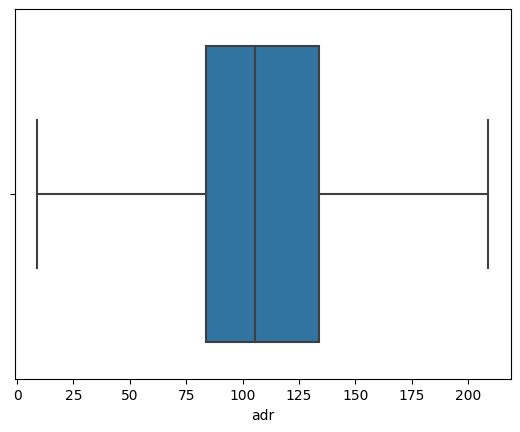

In [ ]:
sns.boxplot(data = df_cl,x='adr',showfliers=False)

<Axes: xlabel='lead_time'>

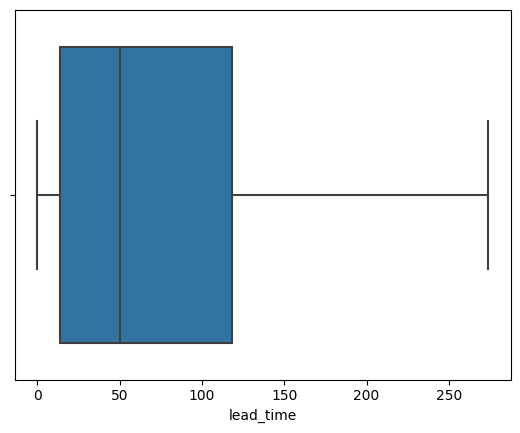

In [ ]:
sns.boxplot(data = df_cl, x = 'lead_time',showfliers=False)

<Axes: xlabel='days_in_waiting_list'>

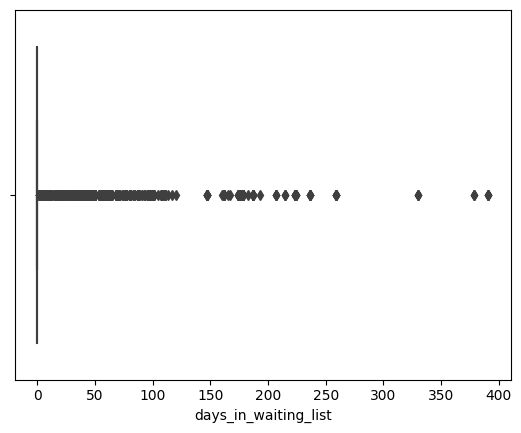

In [ ]:
sns.boxplot(data = df_cl, x = 'days_in_waiting_list',showfliers=True)

##GROUPING RESERVATION STATUS DATE

In [ ]:
#group arrival date by year
df_cl['reservation_year'] = df_cl['reservation_status_date'].dt.year
df_cl

<ipython-input-110-7c5d7a3bdc77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl['reservation_year'] = df_cl['reservation_status_date'].dt.year


hotel  is_canceled  lead_time  stays_in_weekend_nights  \
40060   City Hotel            0          6                        0   
40061   City Hotel            1         88                        0   
40062   City Hotel            1         65                        0   
40063   City Hotel            1         92                        2   
40064   City Hotel            1        100                        0   
...            ...          ...        ...                      ...   
119385  City Hotel            0         23                        2   
119386  City Hotel            0        102                        2   
119387  City Hotel            0         34                        2   
119388  City Hotel            0        109                        2   
119389  City Hotel            0        205                        2   

        stays_in_week_nights  adults  children  babies meal country  ...  \
40060                      2       1         0       0   HB     PRT  ...   
40061                      4       2         0       0   BB     PRT  ...   
40062                      4       1         0       0   BB     PRT  ...   
40063                      4       2         0       0   BB     PRT  ...   
40064                      2       2         0       0   BB     PRT  ...   
...                      ...     ...       ...     ...  ...     ...  ...   
119385                     5       2         0       0   BB     BEL  ...   
119386                     5       3         0       0   BB     FRA  ...   
119387                     5       2         0       0   BB     DEU  ...   
119388                     5       2         0       0   BB     GBR  ...   
119389                     7       2         0       0   HB     DEU  ...   

       agent days_in_waiting_list  customer_type     adr  \
40060      6                    0      Transient   0.000   
40061      9                    0      Transient  76.500   
40062      9                    0      Transient  68.000   
40063      9                    0      Transient  76.500   
40064      9                    0      Transient  76.500   
...      ...                  ...            ...     ...   
119385   394                    0      Transient  96.140   
119386     9                    0      Transient 225.430   
119387     9                    0      Transient 157.710   
119388    89                    0      Transient 104.400   
119389     9                    0      Transient 151.200   

        required_car_parking_spaces total_of_special_requests  \
40060                             0                         0   
40061                             0                         1   
40062                             0                         1   
40063                             0                         2   
40064                             0                         1   
...                             ...                       ...   
119385                            0                         0   
119386                            0                         2   
119387                            0                         4   
119388                            0                         0   
119389                            0                         2   

       reservation_status  reservation_status_date arrival_date  \
40060           Check-Out               2015-07-03   2015-07-01   
40061            Canceled               2015-07-01   2015-07-01   
40062            Canceled               2015-04-30   2015-07-01   
40063            Canceled               2015-06-23   2015-07-01   
40064            Canceled               2015-04-02   2015-07-02   
...                   ...                      ...          ...   
119385          Check-Out               2017-09-06   2017-08-30   
119386          Check-Out               2017-09-07   2017-08-31   
119387          Check-Out               2017-09-07   2017-08-31   
119388          Check-Out               2017-09-07   2017-08-31   
119389  

In [ ]:
df_cl['reservation_year'].value_counts()

2016    27903
2017    18837
2015     6674
2014       11
Name: reservation_year, dtype: int64

In [ ]:
#group reservation date by month
df_cl['reservation_month'] = df_cl['reservation_status_date'].dt.month
df_cl

<ipython-input-112-e03f4a9236a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl['reservation_month'] = df_cl['reservation_status_date'].dt.month


hotel  is_canceled  lead_time  stays_in_weekend_nights  \
40060   City Hotel            0          6                        0   
40061   City Hotel            1         88                        0   
40062   City Hotel            1         65                        0   
40063   City Hotel            1         92                        2   
40064   City Hotel            1        100                        0   
...            ...          ...        ...                      ...   
119385  City Hotel            0         23                        2   
119386  City Hotel            0        102                        2   
119387  City Hotel            0         34                        2   
119388  City Hotel            0        109                        2   
119389  City Hotel            0        205                        2   

        stays_in_week_nights  adults  children  babies meal country  ...  \
40060                      2       1         0       0   HB     PRT  ...   
40061                      4       2         0       0   BB     PRT  ...   
40062                      4       1         0       0   BB     PRT  ...   
40063                      4       2         0       0   BB     PRT  ...   
40064                      2       2         0       0   BB     PRT  ...   
...                      ...     ...       ...     ...  ...     ...  ...   
119385                     5       2         0       0   BB     BEL  ...   
119386                     5       3         0       0   BB     FRA  ...   
119387                     5       2         0       0   BB     DEU  ...   
119388                     5       2         0       0   BB     GBR  ...   
119389                     7       2         0       0   HB     DEU  ...   

       days_in_waiting_list customer_type     adr  \
40060                     0     Transient   0.000   
40061                     0     Transient  76.500   
40062                     0     Transient  68.000   
40063                     0     Transient  76.500   
40064                     0     Transient  76.500   
...                     ...           ...     ...   
119385                    0     Transient  96.140   
119386                    0     Transient 225.430   
119387                    0     Transient 157.710   
119388                    0     Transient 104.400   
119389                    0     Transient 151.200   

        required_car_parking_spaces  total_of_special_requests  \
40060                             0                          0   
40061                             0                          1   
40062                             0                          1   
40063                             0                          2   
40064                             0                          1   
...                             ...                        ...   
119385                            0                          0   
119386                            0                          2   
119387                            0                          4   
119388                            0                          0   
119389                            0                          2   

       reservation_status reservation_status_date  arrival_date  \
40060           Check-Out              2015-07-03    2015-07-01   
40061            Canceled              2015-07-01    2015-07-01   
40062            Canceled              2015-04-30    2015-07-01   
40063            Canceled              2015-06-23    2015-07-01   
40064            Canceled              2015-04-02    2015-07-02   
...                   ...                     ...           ...   
119385          Check-Out              2017-09-06    2017-08-30   
119386          Check-Out              2017-09-07    2017-08-31   
119387          Check-Out              2017-09-07    2017-08-31   
119388          Check-Out              2017-09-07    2017-08-31   
119389          Check-Out              2017-09-07    2017-08-29   

       reser

In [ ]:
df_cl['reservation_month'].value_counts()

8     5489
5     5247
3     5184
7     5131
4     4930
6     4606
9     4425
2     4276
10    4082
1     3902
11    3331
12    2822
Name: reservation_month, dtype: int64

In [ ]:
#create bar/pie chart

##CREATE LEAD TIME CANCEL

In [ ]:
#create booking date
from datetime import timedelta
def subtract_lead_time(row):
    return row['arrival_date'] - timedelta(days=row['lead_time'])

df_cl['booking_date'] = df_cl.apply(subtract_lead_time, axis=1)

<ipython-input-115-312b040dc4a4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl['booking_date'] = df_cl.apply(subtract_lead_time, axis=1)


In [ ]:
df_cl

hotel  is_canceled  lead_time  stays_in_weekend_nights  \
40060   City Hotel            0          6                        0   
40061   City Hotel            1         88                        0   
40062   City Hotel            1         65                        0   
40063   City Hotel            1         92                        2   
40064   City Hotel            1        100                        0   
...            ...          ...        ...                      ...   
119385  City Hotel            0         23                        2   
119386  City Hotel            0        102                        2   
119387  City Hotel            0         34                        2   
119388  City Hotel            0        109                        2   
119389  City Hotel            0        205                        2   

        stays_in_week_nights  adults  children  babies meal country  ...  \
40060                      2       1         0       0   HB     PRT  ...   
40061                      4       2         0       0   BB     PRT  ...   
40062                      4       1         0       0   BB     PRT  ...   
40063                      4       2         0       0   BB     PRT  ...   
40064                      2       2         0       0   BB     PRT  ...   
...                      ...     ...       ...     ...  ...     ...  ...   
119385                     5       2         0       0   BB     BEL  ...   
119386                     5       3         0       0   BB     FRA  ...   
119387                     5       2         0       0   BB     DEU  ...   
119388                     5       2         0       0   BB     GBR  ...   
119389                     7       2         0       0   HB     DEU  ...   

       customer_type     adr  required_car_parking_spaces  \
40060      Transient   0.000                            0   
40061      Transient  76.500                            0   
40062      Transient  68.000                            0   
40063      Transient  76.500                            0   
40064      Transient  76.500                            0   
...              ...     ...                          ...   
119385     Transient  96.140                            0   
119386     Transient 225.430                            0   
119387     Transient 157.710                            0   
119388     Transient 104.400                            0   
119389     Transient 151.200                            0   

        total_of_special_requests  reservation_status reservation_status_date  \
40060                           0           Check-Out              2015-07-03   
40061                           1            Canceled              2015-07-01   
40062                           1            Canceled              2015-04-30   
40063                           2            Canceled              2015-06-23   
40064                           1            Canceled              2015-04-02   
...                           ...                 ...                     ...   
119385                          0           Check-Out              2017-09-06   
119386                          2           Check-Out              2017-09-07   
119387                          4           Check-Out              2017-09-07   
119388                          0           Check-Out              2017-09-07   
119389                          2           Check-Out              2017-09-07   

       arrival_date  reservation_year reservation_month  booking_date  
40060    2015-07-01              2015                 7    2015-06-25  
40061    2015-07-01              2015                 7    2015-04-04  
40062    2015-07-01              2015                 4    2015-04-27  
40063    2015-07-01              2015                 6    2015-03-31  
40064    2015-07-02              2015                 4    2015-03-24  
...             ...               ...               ...           ...  
119385   2017-08-30              2017

In [ ]:
#create cancel lead time
def calculate_cancel_lead_time(row):
    return (row['reservation_status_date'] - row['booking_date']).days

df_cl['cancel_lead_time'] = df_cl.apply(calculate_cancel_lead_time, axis=1)
df_cl

<ipython-input-117-2c30a37d37c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl['cancel_lead_time'] = df_cl.apply(calculate_cancel_lead_time, axis=1)


hotel  is_canceled  lead_time  stays_in_weekend_nights  \
40060   City Hotel            0          6                        0   
40061   City Hotel            1         88                        0   
40062   City Hotel            1         65                        0   
40063   City Hotel            1         92                        2   
40064   City Hotel            1        100                        0   
...            ...          ...        ...                      ...   
119385  City Hotel            0         23                        2   
119386  City Hotel            0        102                        2   
119387  City Hotel            0         34                        2   
119388  City Hotel            0        109                        2   
119389  City Hotel            0        205                        2   

        stays_in_week_nights  adults  children  babies meal country  ...  \
40060                      2       1         0       0   HB     PRT  ...   
40061                      4       2         0       0   BB     PRT  ...   
40062                      4       1         0       0   BB     PRT  ...   
40063                      4       2         0       0   BB     PRT  ...   
40064                      2       2         0       0   BB     PRT  ...   
...                      ...     ...       ...     ...  ...     ...  ...   
119385                     5       2         0       0   BB     BEL  ...   
119386                     5       3         0       0   BB     FRA  ...   
119387                     5       2         0       0   BB     DEU  ...   
119388                     5       2         0       0   BB     GBR  ...   
119389                     7       2         0       0   HB     DEU  ...   

           adr required_car_parking_spaces  total_of_special_requests  \
40060    0.000                           0                          0   
40061   76.500                           0                          1   
40062   68.000                           0                          1   
40063   76.500                           0                          2   
40064   76.500                           0                          1   
...        ...                         ...                        ...   
119385  96.140                           0                          0   
119386 225.430                           0                          2   
119387 157.710                           0                          4   
119388 104.400                           0                          0   
119389 151.200                           0                          2   

        reservation_status  reservation_status_date arrival_date  \
40060            Check-Out               2015-07-03   2015-07-01   
40061             Canceled               2015-07-01   2015-07-01   
40062             Canceled               2015-04-30   2015-07-01   
40063             Canceled               2015-06-23   2015-07-01   
40064             Canceled               2015-04-02   2015-07-02   
...                    ...                      ...          ...   
119385           Check-Out               2017-09-06   2017-08-30   
119386           Check-Out               2017-09-07   2017-08-31   
119387           Check-Out               2017-09-07   2017-08-31   
119388           Check-Out               2017-09-07   2017-08-31   
119389           Check-Out               2017-09-07   2017-08-29   

       reservation_year  reservation_month booking_date  cancel_lead_time  
40060              2015                  7   2015-06-25                 8  
40061              2015                  7   2015-04-04                88  
40062              2015                  4   2015-04-27                 3  
40063              2015                  6   2015-03-31                84  
40064              2015                  4   2015-03-24                 9  
...                 ...                ...          ...               ...  
119385             20

##GROUPING GUESTS TYPE

In [ ]:
a = df_cl['adults']   #To make it easier to assign the data into the bin / category we assign the column into a variable
b = df_cl['children']
c = df_cl['babies']

In [ ]:
#Here we also decided to assign it into different column
#loc[row,column]
df_cl.loc[(a == 1) | (b == 0) | (c== 0), 'guests_type'] = 'business'
df_cl.loc[(a == 2) | (b == 0) | (c== 0), 'guests_type'] = 'couple'
df_cl.loc[(b != 0) | (c!= 0), 'guests_type'] = 'family'

<ipython-input-119-757fd0dac198>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl.loc[(a == 1) | (b == 0) | (c== 0), 'guests_type'] = 'business'


In [ ]:
df_cl['guests_type'].value_counts()

couple    48191
family     5234
Name: guests_type, dtype: int64

In [ ]:
guest_type = df_cl.groupby('guests_type')['is_canceled'].count() #Count the id as users and group it by the loan status
guest_type = guest_type.reset_index()   #Reset the index to make it into a pandas dataframe
guest_type

guests_type  is_canceled
0      couple        48191
1      family         5234

In [ ]:
#Create a pie chart, autopct='%.2f%%' to show percent and 2 decimal


##GROUPING LEAD TIME & WAITING LIST

In [ ]:
#count max & min waiting list (days needed to confirm booking)
late = df_cl['days_in_waiting_list'].max() #391
instant = df_cl['days_in_waiting_list'].min() #0
avg_waitlist = df_cl['days_in_waiting_list'].mean() #1
print(late, instant, avg_waitlist)

391 0 1.0202901263453439


In [ ]:
#count max & min lead time (days from booking to arrival date)
late = df_cl['lead_time'].max() #629
instant = df_cl['lead_time'].min() #0
avg_leadtime = df_cl['lead_time'].mean() #77.7
print(late, instant, avg_leadtime)

629 0 77.68151614412729


In [ ]:
#group for waiting list (days until booking approved)
bins = [0,1,7,30,700]

labels = ['0-1', '2-7', '8-30','30+']

df_cl['grp_waiting_list'] = pd.cut(df_cl['days_in_waiting_list'], bins=bins, labels=labels, right=False)

<ipython-input-125-1e0591da1c2d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl['grp_waiting_list'] = pd.cut(df_cl['days_in_waiting_list'], bins=bins, labels=labels, right=False)


In [ ]:
df_cl

hotel  is_canceled  lead_time  stays_in_weekend_nights  \
40060   City Hotel            0          6                        0   
40061   City Hotel            1         88                        0   
40062   City Hotel            1         65                        0   
40063   City Hotel            1         92                        2   
40064   City Hotel            1        100                        0   
...            ...          ...        ...                      ...   
119385  City Hotel            0         23                        2   
119386  City Hotel            0        102                        2   
119387  City Hotel            0         34                        2   
119388  City Hotel            0        109                        2   
119389  City Hotel            0        205                        2   

        stays_in_week_nights  adults  children  babies meal country  ...  \
40060                      2       1         0       0   HB     PRT  ...   
40061                      4       2         0       0   BB     PRT  ...   
40062                      4       1         0       0   BB     PRT  ...   
40063                      4       2         0       0   BB     PRT  ...   
40064                      2       2         0       0   BB     PRT  ...   
...                      ...     ...       ...     ...  ...     ...  ...   
119385                     5       2         0       0   BB     BEL  ...   
119386                     5       3         0       0   BB     FRA  ...   
119387                     5       2         0       0   BB     DEU  ...   
119388                     5       2         0       0   BB     GBR  ...   
119389                     7       2         0       0   HB     DEU  ...   

       total_of_special_requests reservation_status  reservation_status_date  \
40060                          0          Check-Out               2015-07-03   
40061                          1           Canceled               2015-07-01   
40062                          1           Canceled               2015-04-30   
40063                          2           Canceled               2015-06-23   
40064                          1           Canceled               2015-04-02   
...                          ...                ...                      ...   
119385                         0          Check-Out               2017-09-06   
119386                         2          Check-Out               2017-09-07   
119387                         4          Check-Out               2017-09-07   
119388                         0          Check-Out               2017-09-07   
119389                         2          Check-Out               2017-09-07   

        arrival_date  reservation_year reservation_month booking_date  \
40060     2015-07-01              2015                 7   2015-06-25   
40061     2015-07-01              2015                 7   2015-04-04   
40062     2015-07-01              2015                 4   2015-04-27   
40063     2015-07-01              2015                 6   2015-03-31   
40064     2015-07-02              2015                 4   2015-03-24   
...              ...               ...               ...          ...   
119385    2017-08-30              2017                 9   2017-08-07   
119386    2017-08-31              2017                 9   2017-05-21   
119387    2017-08-31              2017                 9   2017-07-28   
119388    2017-08-31              2017                 9   2017-05-14   
119389    2017-08-29              2017                 9   2017-02-05   

        cancel_lead_time guests_type  grp_waiting_list  
40060                  8      couple               0-1  
40061                 88      couple               0-1  
40062                  3      couple               0-1  
40063                 84      couple               0-1  
40064                  9      couple               0-1  
...                  ...         ...               ...  
119385    

In [ ]:
#group for lead time (days to arrival date from booking date)
bins = [0, 1, 7, 30, 90, 400]

# Define the labels for each bin
labels = ['0-1', '2-7', '8-30', '31-90', '90+']

# Create the 'grp_lead_time' column using pd.cut()
df_cl['grp_lead_time'] = pd.cut(df_cl['lead_time'], bins=bins, labels=labels, right=False)

<ipython-input-127-92339ae8f6b0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl['grp_lead_time'] = pd.cut(df_cl['lead_time'], bins=bins, labels=labels, right=False)


In [ ]:
df_cl

hotel  is_canceled  lead_time  stays_in_weekend_nights  \
40060   City Hotel            0          6                        0   
40061   City Hotel            1         88                        0   
40062   City Hotel            1         65                        0   
40063   City Hotel            1         92                        2   
40064   City Hotel            1        100                        0   
...            ...          ...        ...                      ...   
119385  City Hotel            0         23                        2   
119386  City Hotel            0        102                        2   
119387  City Hotel            0         34                        2   
119388  City Hotel            0        109                        2   
119389  City Hotel            0        205                        2   

        stays_in_week_nights  adults  children  babies meal country  ...  \
40060                      2       1         0       0   HB     PRT  ...   
40061                      4       2         0       0   BB     PRT  ...   
40062                      4       1         0       0   BB     PRT  ...   
40063                      4       2         0       0   BB     PRT  ...   
40064                      2       2         0       0   BB     PRT  ...   
...                      ...     ...       ...     ...  ...     ...  ...   
119385                     5       2         0       0   BB     BEL  ...   
119386                     5       3         0       0   BB     FRA  ...   
119387                     5       2         0       0   BB     DEU  ...   
119388                     5       2         0       0   BB     GBR  ...   
119389                     7       2         0       0   HB     DEU  ...   

       reservation_status reservation_status_date  arrival_date  \
40060           Check-Out              2015-07-03    2015-07-01   
40061            Canceled              2015-07-01    2015-07-01   
40062            Canceled              2015-04-30    2015-07-01   
40063            Canceled              2015-06-23    2015-07-01   
40064            Canceled              2015-04-02    2015-07-02   
...                   ...                     ...           ...   
119385          Check-Out              2017-09-06    2017-08-30   
119386          Check-Out              2017-09-07    2017-08-31   
119387          Check-Out              2017-09-07    2017-08-31   
119388          Check-Out              2017-09-07    2017-08-31   
119389          Check-Out              2017-09-07    2017-08-29   

        reservation_year  reservation_month booking_date cancel_lead_time  \
40060               2015                  7   2015-06-25                8   
40061               2015                  7   2015-04-04               88   
40062               2015                  4   2015-04-27                3   
40063               2015                  6   2015-03-31               84   
40064               2015                  4   2015-03-24                9   
...                  ...                ...          ...              ...   
119385              2017                  9   2017-08-07               30   
119386              2017                  9   2017-05-21              109   
119387              2017                  9   2017-07-28               41   
119388              2017                  9   2017-05-14              116   
119389              2017                  9   2017-02-05              214   

        guests_type grp_waiting_list  grp_lead_time  
40060        couple              0-1            2-7  
40061        couple              0-1          31-90  
40062        couple              0-1          31-90  
40063        couple              0-1            90+  
40064        couple              0-1            90+  
...             ...              ...            ...  
119385       couple              0-1           8-30  
119386       couple              0-1            90+  
119387       couple            

In [ ]:
df_cl['grp_waiting_list'].value_counts()

0-1     52707
30+       555
8-30      129
2-7        34
Name: grp_waiting_list, dtype: int64

In [ ]:
df_cl['grp_lead_time'].value_counts()

90+      17718
31-90    15347
8-30     10882
2-7       6291
0-1       2901
Name: grp_lead_time, dtype: int64

In [ ]:
#cleaned data frame final
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53425 entries, 40060 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           53425 non-null  object        
 1   is_canceled                     53425 non-null  int64         
 2   lead_time                       53425 non-null  int64         
 3   stays_in_weekend_nights         53425 non-null  int64         
 4   stays_in_week_nights            53425 non-null  int64         
 5   adults                          53425 non-null  int64         
 6   children                        53425 non-null  int64         
 7   babies                          53425 non-null  int64         
 8   meal                            53425 non-null  object        
 9   country                         53425 non-null  object        
 10  market_segment                  53425 non-null  object        
 1

###SUMMARY & INSIGHTS:
1. we replace the null data in children and agent into median of the dataset
2. we drop the data of company and arrival date week number because it's a lot of null and not irrelevant into the data
3. we drop the duplicate datas. From 79.330 to 53.426 rows
5. check for outliers from: adr, lead time and days in waiting list. we find many outliers from this 3 columns. we decide to keep the outliers from lead time and days in waiting list, because we need the datas to analys cancellation rate.
6. we drop the max ADR = 5.400 euro, and keep the rest of the datas, because the value is the only value and on the far outside from the other outliers. From 53.426 to 53.425 rows
7. Grouping the arrival date into year, then into months.
8. Grouping the guests type into: business (adult, single), couple (adult, 2 pax), family (2 adults + children + babies).
9. grouping by lead time and waiting list, because we need to simplify the range days in lead time and waiting list columns.
10. Cancellation rate before data cleaning: 42% (as written on the problem statement)

In [ ]:
#export df_cl to csv
#from google.colab import drive
#drive.mount('/content/drive')

#df_cl.to_csv('/content/drive/My Drive/GFP_GROUP E/mydata.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## FEATURE  CREATION

In [ ]:
df_subset = df_cl.copy()

In [ ]:
# Create [total_staying_nights] column
df_subset['total_staying_nights'] = df_subset[
    'stays_in_week_nights'] + df_subset['stays_in_weekend_nights']

# drop rows where total_staying_nights below 1
df_subset.drop(df_subset[df_subset['total_staying_nights'] < 1].index,
               inplace=True)

df_subset.reset_index(drop=True)

hotel  is_canceled  lead_time  stays_in_weekend_nights  \
0      City Hotel            0          6                        0   
1      City Hotel            1         88                        0   
2      City Hotel            1         65                        0   
3      City Hotel            1         92                        2   
4      City Hotel            1        100                        0   
...           ...          ...        ...                      ...   
53132  City Hotel            0         23                        2   
53133  City Hotel            0        102                        2   
53134  City Hotel            0         34                        2   
53135  City Hotel            0        109                        2   
53136  City Hotel            0        205                        2   

       stays_in_week_nights  adults  children  babies meal country  ...  \
0                         2       1         0       0   HB     PRT  ...   
1                         4       2         0       0   BB     PRT  ...   
2                         4       1         0       0   BB     PRT  ...   
3                         4       2         0       0   BB     PRT  ...   
4                         2       2         0       0   BB     PRT  ...   
...                     ...     ...       ...     ...  ...     ...  ...   
53132                     5       2         0       0   BB     BEL  ...   
53133                     5       3         0       0   BB     FRA  ...   
53134                     5       2         0       0   BB     DEU  ...   
53135                     5       2         0       0   BB     GBR  ...   
53136                     7       2         0       0   HB     DEU  ...   

      reservation_status_date arrival_date  reservation_year  \
0                  2015-07-03   2015-07-01              2015   
1                  2015-07-01   2015-07-01              2015   
2                  2015-04-30   2015-07-01              2015   
3                  2015-06-23   2015-07-01              2015   
4                  2015-04-02   2015-07-02              2015   
...                       ...          ...               ...   
53132              2017-09-06   2017-08-30              2017   
53133              2017-09-07   2017-08-31              2017   
53134              2017-09-07   2017-08-31              2017   
53135              2017-09-07   2017-08-31              2017   
53136              2017-09-07   2017-08-29              2017   

       reservation_month  booking_date cancel_lead_time guests_type  \
0                      7    2015-06-25                8      couple   
1                      7    2015-04-04               88      couple   
2                      4    2015-04-27                3      couple   
3                      6    2015-03-31               84      couple   
4                      4    2015-03-24                9      couple   
...                  ...           ...              ...         ...   
53132                  9    2017-08-07               30      couple   
53133                  9    2017-05-21              109      couple   
53134                  9    2017-07-28               41      couple   
53135                  9    2017-05-14              116      couple   
53136                  9    2017-02-05              214      couple   

       grp_waiting_list grp_lead_time  total_staying_nights  
0                   0-1           2-7                     2  
1                   0-1         31-90                     4  
2                   0-1         31-90                     4  
3                   0-1           90+                     6  
4                   0-1           90+                     2  
...                 ...           ...                   ...  
53132               0-1          8-30                     7  
53133               0-1           90+                     7  
53134               0-1         31-90                     7  
53135               0-1     

The creation of the total_staying_nights column helps consolidate information about the length of a guest's stay in a more interpretable way. After creating the total_staying_nights column, it's possible that some values might be incorrectly entered, resulting in a value less than 1. Such cases could be considered erroneous or irrelevant, as it's not possible for a stay to be less than one night. By dropping these rows, we just want to ensure data quality and accuracy.

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53137 entries, 40060 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           53137 non-null  object        
 1   is_canceled                     53137 non-null  int64         
 2   lead_time                       53137 non-null  int64         
 3   stays_in_weekend_nights         53137 non-null  int64         
 4   stays_in_week_nights            53137 non-null  int64         
 5   adults                          53137 non-null  int64         
 6   children                        53137 non-null  int64         
 7   babies                          53137 non-null  int64         
 8   meal                            53137 non-null  object        
 9   country                         53137 non-null  object        
 10  market_segment                  53137 non-null  object        
 1

In [ ]:
# Create [room] column
# if assigned room is the same, then 1, else 0
df_subset['room'] = 0
df_subset.loc[df_subset['reserved_room_type'] ==
              df_subset['assigned_room_type'], 'room'] = 1

The purpose of creating the room column seems to be to indicate whether the assigned room is the same as the reserved room for each reservation entry. When the two room types are the same, the room column will have a value of 1; otherwise, it will have a value of 0.

In [ ]:
# Create [more_canceled] column
# if the cancellation is higher, then 1, else 0
df_subset['more_canceled'] = 0
df_subset.loc[df_subset['previous_cancellations'] >
              df_subset['previous_bookings_not_canceled'], 'more_canceled'] = 1

It indicates whether a reservation has a higher number of previous cancellations compared to the number of previous bookings that were not canceled. If the count of previous cancellations (previous_cancellations) is greater than the count of previous bookings that were not canceled (previous_bookings_not_canceled) for a reservation, then the value in the more_canceled column is set to 1 for that row.

In [ ]:
# Seperate year/month/date from reservation_status_date column
df_subset['reservation_status_date'] = pd.to_datetime(df_subset['reservation_status_date'])

df_subset['reservation_year'] = df_subset['reservation_status_date'].dt.year
df_subset['reservation_month'] = df_subset['reservation_status_date'].dt.month
df_subset['reservation_day'] = df_subset['reservation_status_date'].dt.day

When the reservation_status = Canceled, we have arrival date values; So in this case, the dates are assumed to be the expected arrival dates => we remove them from the dataset as they do not add any value for our cancellation prediction. Or, it's like when a reservation is canceled, any associated arrival date values are considered to be the initially expected arrival dates for those canceled reservations. However, since these reservations have been canceled, the actual arrival won't occur, and the arrival date values become irrelevant for predicting cancellations.

In [ ]:
df_subset.drop(df_subset.loc[:, df_subset.columns.str.contains('arrival')],
               axis=1,
               inplace=True)

In [ ]:
# remove unnecessary columns
# drop 'reservation_status' as we will use 'is_canceled': canceled (1) or not (0)

df_subset = df_subset.drop([
    'reservation_status', 'booking_changes', 'assigned_room_type',
    'reservation_status_date', 'distribution_channel'
],
                           axis=1)

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53137 entries, 40060 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           53137 non-null  object        
 1   is_canceled                     53137 non-null  int64         
 2   lead_time                       53137 non-null  int64         
 3   stays_in_weekend_nights         53137 non-null  int64         
 4   stays_in_week_nights            53137 non-null  int64         
 5   adults                          53137 non-null  int64         
 6   children                        53137 non-null  int64         
 7   babies                          53137 non-null  int64         
 8   meal                            53137 non-null  object        
 9   country                         53137 non-null  object        
 10  market_segment                  53137 non-null  object        
 1

In [ ]:
display(df_subset)

hotel  is_canceled  lead_time  stays_in_weekend_nights  \
40060   City Hotel            0          6                        0   
40061   City Hotel            1         88                        0   
40062   City Hotel            1         65                        0   
40063   City Hotel            1         92                        2   
40064   City Hotel            1        100                        0   
...            ...          ...        ...                      ...   
119385  City Hotel            0         23                        2   
119386  City Hotel            0        102                        2   
119387  City Hotel            0         34                        2   
119388  City Hotel            0        109                        2   
119389  City Hotel            0        205                        2   

        stays_in_week_nights  adults  children  babies meal country  ...  \
40060                      2       1         0       0   HB     PRT  ...   
40061                      4       2         0       0   BB     PRT  ...   
40062                      4       1         0       0   BB     PRT  ...   
40063                      4       2         0       0   BB     PRT  ...   
40064                      2       2         0       0   BB     PRT  ...   
...                      ...     ...       ...     ...  ...     ...  ...   
119385                     5       2         0       0   BB     BEL  ...   
119386                     5       3         0       0   BB     FRA  ...   
119387                     5       2         0       0   BB     DEU  ...   
119388                     5       2         0       0   BB     GBR  ...   
119389                     7       2         0       0   HB     DEU  ...   

       reservation_month  booking_date  cancel_lead_time  guests_type  \
40060                  7    2015-06-25                 8       couple   
40061                  7    2015-04-04                88       couple   
40062                  4    2015-04-27                 3       couple   
40063                  6    2015-03-31                84       couple   
40064                  4    2015-03-24                 9       couple   
...                  ...           ...               ...          ...   
119385                 9    2017-08-07                30       couple   
119386                 9    2017-05-21               109       couple   
119387                 9    2017-07-28                41       couple   
119388                 9    2017-05-14               116       couple   
119389                 9    2017-02-05               214       couple   

       grp_waiting_list grp_lead_time  total_staying_nights  room  \
40060               0-1           2-7                     2     1   
40061               0-1         31-90                     4     1   
40062               0-1         31-90                     4     1   
40063               0-1           90+                     6     1   
40064               0-1           90+                     2     1   
...                 ...           ...                   ...   ...   
119385              0-1          8-30                     7     1   
119386              0-1           90+                     7     1   
119387              0-1         31-90                     7     1   
119388              0-1           90+                     7     1   
119389              0-1           90+                     9     1   

       more_canceled  reservation_day  
40060              0                3  
40061              0                1  
40062              0               30  
40063              0               23  
40064              0                2  
...              ...              ...  
119385             0                6  
119386             0                7  
119387             0                7  
119388             0                7  
119389             0                7  

[53137 rows x 33 columns]

#EDA CITY HOTEL


In [ ]:
df_eda=df_cl.copy()

In [ ]:
import matplotlib

In [ ]:
pip install ggpy

  Preparing metadata (setup.py) ... done
  Created wheel for ggpy: filename=ggpy-0.1.2-py3-none-any.whl size=4146 sha256=174471da55f2a4df92e41a689e3b3625d01104fa6ff3db24844f4e096e98d9d8
  Stored in directory: /root/.cache/pip/wheels/85/c6/c7/dc7d0551a62bb92cc3dd3464c468549a368c141f880e676f6f
Successfully built ggpy


In [ ]:
#df_eda['is_canceled'].replace({1 : 'Cancelled',
                            # 0 : 'Not Cancelled'}, inplace = True)
df_eda

hotel  is_canceled  lead_time  stays_in_weekend_nights  \
40060   City Hotel            0          6                        0   
40061   City Hotel            1         88                        0   
40062   City Hotel            1         65                        0   
40063   City Hotel            1         92                        2   
40064   City Hotel            1        100                        0   
...            ...          ...        ...                      ...   
119385  City Hotel            0         23                        2   
119386  City Hotel            0        102                        2   
119387  City Hotel            0         34                        2   
119388  City Hotel            0        109                        2   
119389  City Hotel            0        205                        2   

        stays_in_week_nights  adults  children  babies meal country  ...  \
40060                      2       1         0       0   HB     PRT  ...   
40061                      4       2         0       0   BB     PRT  ...   
40062                      4       1         0       0   BB     PRT  ...   
40063                      4       2         0       0   BB     PRT  ...   
40064                      2       2         0       0   BB     PRT  ...   
...                      ...     ...       ...     ...  ...     ...  ...   
119385                     5       2         0       0   BB     BEL  ...   
119386                     5       3         0       0   BB     FRA  ...   
119387                     5       2         0       0   BB     DEU  ...   
119388                     5       2         0       0   BB     GBR  ...   
119389                     7       2         0       0   HB     DEU  ...   

       reservation_status reservation_status_date  arrival_date  \
40060           Check-Out              2015-07-03    2015-07-01   
40061            Canceled              2015-07-01    2015-07-01   
40062            Canceled              2015-04-30    2015-07-01   
40063            Canceled              2015-06-23    2015-07-01   
40064            Canceled              2015-04-02    2015-07-02   
...                   ...                     ...           ...   
119385          Check-Out              2017-09-06    2017-08-30   
119386          Check-Out              2017-09-07    2017-08-31   
119387          Check-Out              2017-09-07    2017-08-31   
119388          Check-Out              2017-09-07    2017-08-31   
119389          Check-Out              2017-09-07    2017-08-29   

        reservation_year  reservation_month booking_date cancel_lead_time  \
40060               2015                  7   2015-06-25                8   
40061               2015                  7   2015-04-04               88   
40062               2015                  4   2015-04-27                3   
40063               2015                  6   2015-03-31               84   
40064               2015                  4   2015-03-24                9   
...                  ...                ...          ...              ...   
119385              2017                  9   2017-08-07               30   
119386              2017                  9   2017-05-21              109   
119387              2017                  9   2017-07-28               41   
119388              2017                  9   2017-05-14              116   
119389              2017                  9   2017-02-05              214   

        guests_type grp_waiting_list  grp_lead_time  
40060        couple              0-1            2-7  
40061        couple              0-1          31-90  
40062        couple              0-1          31-90  
40063        couple              0-1            90+  
40064        couple              0-1            90+  
...             ...              ...            ...  
119385       couple              0-1           8-30  
119386       couple              0-1            90+  
119387       couple            

In [ ]:
df_cl['hotel'].unique()

array(['City Hotel'], dtype=object)

In [ ]:
df_cl.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 53425 entries, 40060 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           53425 non-null  object        
 1   is_canceled                     53425 non-null  int64         
 2   lead_time                       53425 non-null  int64         
 3   stays_in_weekend_nights         53425 non-null  int64         
 4   stays_in_week_nights            53425 non-null  int64         
 5   adults                          53425 non-null  int64         
 6   children                        53425 non-null  int64         
 7   babies                          53425 non-null  int64         
 8   meal                            53425 non-null  object        
 9   country                         53425 non-null  object        
 10  market_segment                  53425 non-null  object        
 1

* Check canceled




##DESCRIPTIVE

In [ ]:
#Descriptive analysis after treating the outlier
pd.set_option('display.float_format', lambda x: '%.3f' % x)

numeric = ['adr','days_in_waiting_list','lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies']

desc_eda = df_eda[numeric].describe()
desc_eda.loc['kurtosis'] = df_eda[numeric].kurt() #show kurtosis statistic
desc_eda.loc['skewness'] = df_eda[numeric].skew() #show Skewness statistic
desc_eda.loc['variance'] = df_eda[numeric].var() #show variance statistic
desc_eda.round(2)

adr  days_in_waiting_list  lead_time  stays_in_weekend_nights  \
count    53425.000             53425.000  53425.000                53425.000   
mean       110.890                 1.020     77.680                    0.870   
std         42.270                11.900     82.110                    0.910   
min          0.000                 0.000      0.000                    0.000   
25%         84.000                 0.000     14.000                    0.000   
50%        105.300                 0.000     50.000                    1.000   
75%        134.000                 0.000    118.000                    2.000   
max        510.000               391.000    629.000                   16.000   
kurtosis     2.060               375.630      3.110                    6.340   
skewness     0.640                17.280      1.580                    1.200   
variance  1786.480               141.660   6742.820                    0.830   

          stays_in_week_nights    adults  children    babies  
count                53425.000 53425.000 53425.000 53425.000  
mean                     2.270     1.880     0.130     0.010  
std                      1.620     0.540     0.440     0.100  
min                      0.000     0.000     0.000     0.000  
25%                      1.000     2.000     0.000     0.000  
50%                      2.000     2.000     0.000     0.000  
75%                      3.000     2.000     0.000     0.000  
max                     41.000     4.000     3.000    10.000  
kurtosis                29.790     0.990    11.610  2853.840  
skewness                 2.950    -0.310     3.490    36.770  
variance                 2.620     0.300     0.200     0.010

In [ ]:
#describe string type data
objects = ['country',
 'guests_type',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'deposit_type']
df_eda[objects].describe()

country guests_type market_segment distribution_channel  \
count    53425       53425          53425                53425   
unique     166           2              8                    5   
top        PRT      couple      Online TA                TA/TO   
freq     13220       48191          34992                44546   

       reserved_room_type assigned_room_type customer_type deposit_type  
count               53425              53425         53425        53425  
unique                  8                  9             4            3  
top                     A                  A     Transient   No Deposit  
freq                37939              33402         44640        52566

In [ ]:
#describe date type data
df_eda['reservation_status_date'].describe()

<ipython-input-151-c166b88e519f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_eda['reservation_status_date'].describe()


count                   53425
unique                    864
top       2015-10-21 00:00:00
freq                      158
first     2014-10-17 00:00:00
last      2017-09-07 00:00:00
Name: reservation_status_date, dtype: object

In [ ]:
df_eda['arrival_date'].describe()

<ipython-input-152-0f501aa1bd6c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_eda['arrival_date'].describe()


count                   53425
unique                    793
top       2016-06-26 00:00:00
freq                      164
first     2015-07-01 00:00:00
last      2017-08-31 00:00:00
Name: arrival_date, dtype: object

###INSIGHTS:
1. AVG daily rate: 110,89 euro, with max of 510 euro, and min 0 euro (probably compliment)
2. AVG of days in waiting list (booking time before the arrival date) is 1 day, with the max of 391 days before the arrival date.
3. AVG of lead time in days (booking is approved after get into the system): 78 days. with the max of 629 days.
4. AVG of guests stay in the weekend nights: 1 night, with the max of 16 weekend nights.
5. AVG of guests stay during week nights: 2 days, with the max of 41 nights.
the average of adults guests are 2 pax, with max of 4 pax.
the average of children are 1 pax, with the max of 3 pax.
the average of babies are 1 pax, with the max of 10 pax.
6. City hotel has total booking of: 53.425
7. guests are mostly COUPLE= 48.191 (90%)
8. guests are mostly from PRT (Portugal): 13.220 (24,74%)
9. Market Segment booked from Online Travel Agent= 34.992 (65,49%)
10. distribution channel are from Travel Agent / Tour Operator = 44.546 (83,38%)
11. The most room to get reserved is room type A = 37.939 (71%), and mostly guests got assigned into room type A too = 33.402 (62,52%)
12. Mostly customers type are Transient = 44.640 (83,55%)
13. Mostly our guests has no deposit while booking.
14. FIRST BOOKING MADE: 17/10/2014, LAST BOOKING MADE: 07/09/2017
15. FIRST ARRIVAL DATE: 01/07/2015, LAST ARRIVAL DATE: 31/08/2017

##BOOKING VS CANCELLATION

In [ ]:
#count cancellation grouped by year, 1= canceled
total_cancellation = df_eda.groupby(['reservation_year','reservation_month','is_canceled']).agg({
    'is_canceled' : ['count']

})
total_cancellation

is_canceled
                                                     count
reservation_year reservation_month is_canceled            
2014             10                1                    11
2015             1                 1                    45
                 2                 1                     4
                 3                 1                    10
                 4                 1                    24
                 5                 1                    53
                 6                 1                   110
                 7                 0                   146
                                   1                   195
                 8                 0                   828
                                   1                   215
                 9                 0                  1347
                                   1                   304
                 10                0                  1265
                                   1                   323
                 11                0                   716
                                   1                   192
                 12                0                   654
                                   1                   243
2016             1                 0                   931
                                   1                   660
                 2                 0                  1235
                                   1                   850
                 3                 0                  1653
                                   1                   902
                 4                 0                  1660
                                   1                   770
                 5                 0                  1705
                                   1                   717
                 6                 0                  1648
                                   1                   605
                 7                 0                  1869
                                   1                   682
                 8                 0                  1847
                                   1                   718
                 9                 0                  1876
                                   1                   744
                 10                0                  1750
                                   1                   733
                 11                0                  1641
                                   1                   782
                 12                0                  1147
                                   1                   778
2017             1                 0                  1237
                                   1                  1029
                 2                 0                  1270
                                   1                   917
                 3                 0                  1749
                                   1                   870
                 4                 0                  1680
                                   1                   796
                 5                 0                  1969
                                   1                   803
                 6                 0                  1797
                                   1                   446
                 7                 0                  1866
                                   1                   373
                 8                 0                  1737
                                   1                   144
                 9                 0                   154

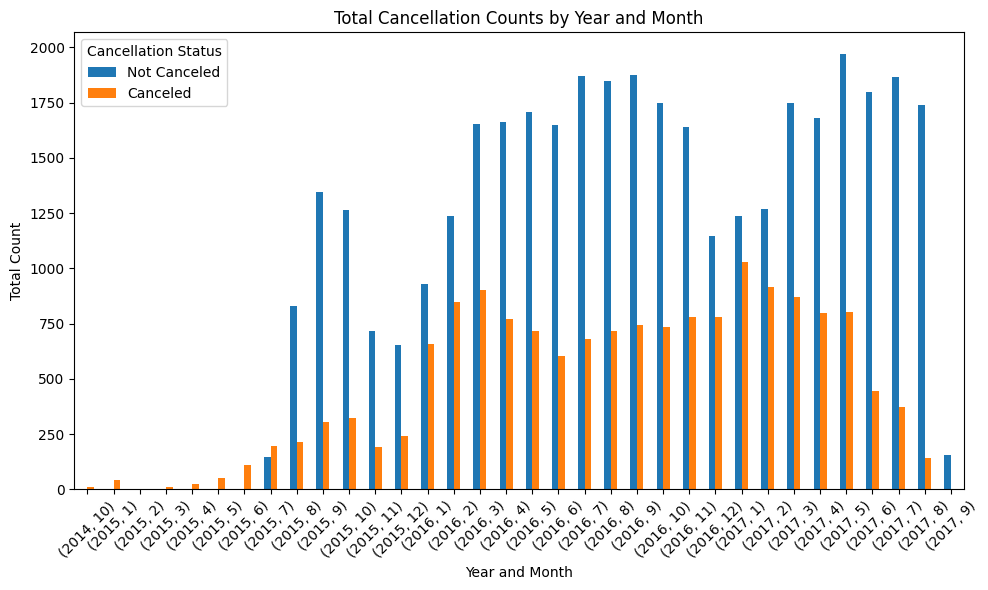

In [ ]:
total_cancellation = df_eda.groupby(['reservation_year', 'reservation_month', 'is_canceled']).agg({
    'is_canceled': 'count'
}).rename(columns={'is_canceled': 'count'}).reset_index()

# Pivot the DataFrame for creating a stacked bar chart
pivot_table = total_cancellation.pivot_table(index=['reservation_year', 'reservation_month'], columns='is_canceled', values='count', fill_value=0)

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=False, ax=ax)

ax.set_xlabel('Year and Month')
ax.set_ylabel('Total Count')
ax.set_title('Total Cancellation Counts by Year and Month')
ax.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


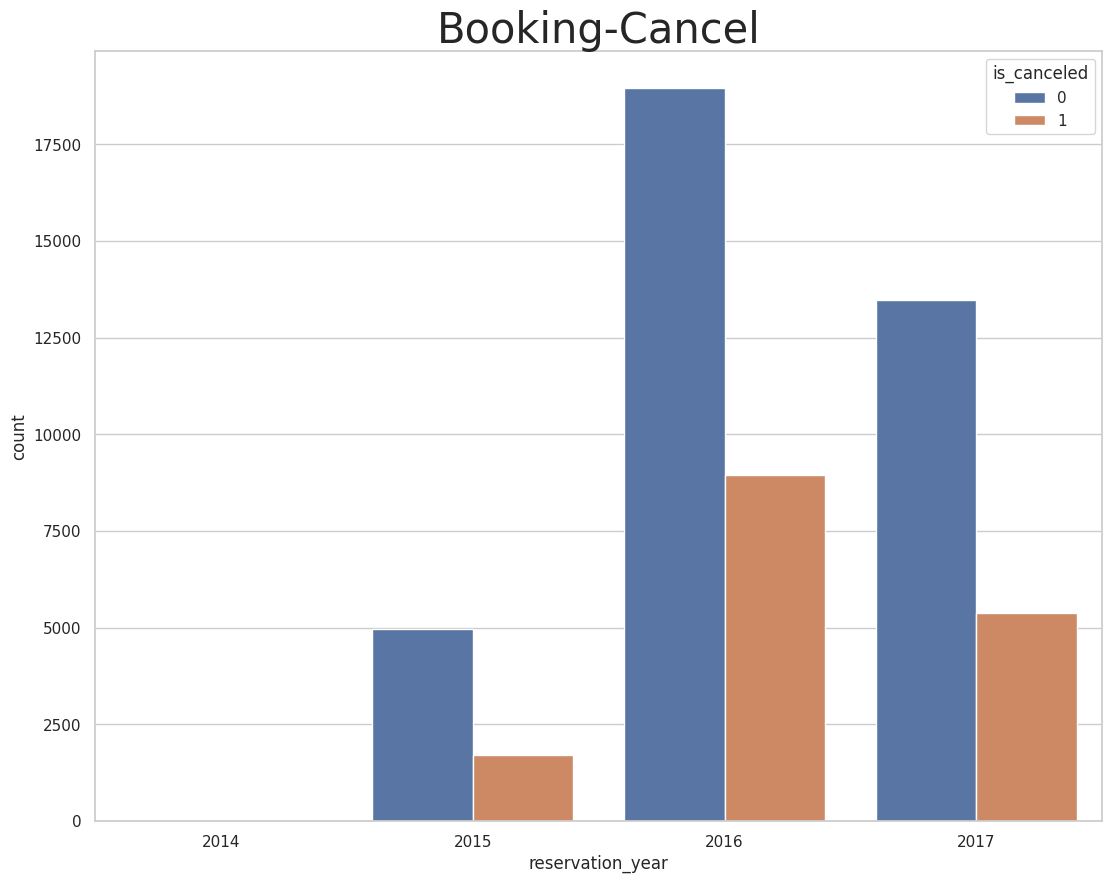

In [ ]:
plt.figure(figsize=(13,10))
sns.set(style = "whitegrid")
plt.title("Booking-Cancel", fontdict = {'fontsize': 30})
canceled = sns.countplot(x ='reservation_year', hue = 'is_canceled',data = df_eda)

In [ ]:
#total cancellation after data cleaning
total_booking = df_eda.shape[0]
total_cancel = df_eda.loc[df_eda['is_canceled'] == 1].shape[0]

print('Total Cancellation Percentage = ', round((total_cancel / total_booking) * 100))

Total Cancellation Percentage =  30


In [ ]:
df_eda.head(10)

hotel  is_canceled  lead_time  stays_in_weekend_nights  \
40060  City Hotel            0          6                        0   
40061  City Hotel            1         88                        0   
40062  City Hotel            1         65                        0   
40063  City Hotel            1         92                        2   
40064  City Hotel            1        100                        0   
40065  City Hotel            1         79                        0   
40066  City Hotel            0          3                        0   
40067  City Hotel            1         63                        1   
40068  City Hotel            1         62                        2   
40070  City Hotel            0         43                        0   

       stays_in_week_nights  adults  children  babies meal country  ...  \
40060                     2       1         0       0   HB     PRT  ...   
40061                     4       2         0       0   BB     PRT  ...   
40062                     4       1         0       0   BB     PRT  ...   
40063                     4       2         0       0   BB     PRT  ...   
40064                     2       2         0       0   BB     PRT  ...   
40065                     3       2         0       0   BB     PRT  ...   
40066                     3       1         0       0   HB     PRT  ...   
40067                     3       1         0       0   BB     PRT  ...   
40068                     3       2         0       0   BB     PRT  ...   
40070                     2       2         0       0   HB     PRT  ...   

      reservation_status reservation_status_date  arrival_date  \
40060          Check-Out              2015-07-03    2015-07-01   
40061           Canceled              2015-07-01    2015-07-01   
40062           Canceled              2015-04-30    2015-07-01   
40063           Canceled              2015-06-23    2015-07-01   
40064           Canceled              2015-04-02    2015-07-02   
40065           Canceled              2015-06-25    2015-07-02   
40066          Check-Out              2015-07-05    2015-07-02   
40067           Canceled              2015-06-25    2015-07-02   
40068            No-Show              2015-07-02    2015-07-02   
40070          Check-Out              2015-07-05    2015-07-03   

       reservation_year  reservation_month booking_date cancel_lead_time  \
40060              2015                  7   2015-06-25                8   
40061              2015                  7   2015-04-04               88   
40062              2015                  4   2015-04-27                3   
40063              2015                  6   2015-03-31               84   
40064              2015                  4   2015-03-24                9   
40065              2015                  6   2015-04-14               72   
40066              2015                  7   2015-06-29                6   
40067              2015                  6   2015-04-30               56   
40068              2015                  7   2015-05-01               62   
40070              2015                  7   2015-05-21               45   

       guests_type grp_waiting_list  grp_lead_time  
40060       couple              0-1            2-7  
40061       couple              0-1          31-90  
40062       couple              0-1          31-90  
40063       couple              0-1            90+  
40064       couple              0-1            90+  
40065       couple              0-1          31-90  
40066       couple              0-1            2-7  
40067       couple              0-1          31-90  
40068       couple              0-1          31-90  
40070       couple              0-1          31-90  

[10 rows x 35 columns]

##TOP 10 COUNTRY

In [ ]:
df_eda2 = df_eda.copy()


In [ ]:
df_eda2.country.nunique()

166

In [ ]:
top_countries_with_codes =df_eda2.country.value_counts().head(10)
top_countries_with_codes

PRT    13220
FRA     7412
GBR     4528
DEU     4467
ESP     3784
ITA     2647
BEL     1690
BRA     1589
NLD     1431
USA     1417
Name: country, dtype: int64

<Axes: title={'center': 'GUESTS TOP 10 COUNTRY'}, ylabel='country'>

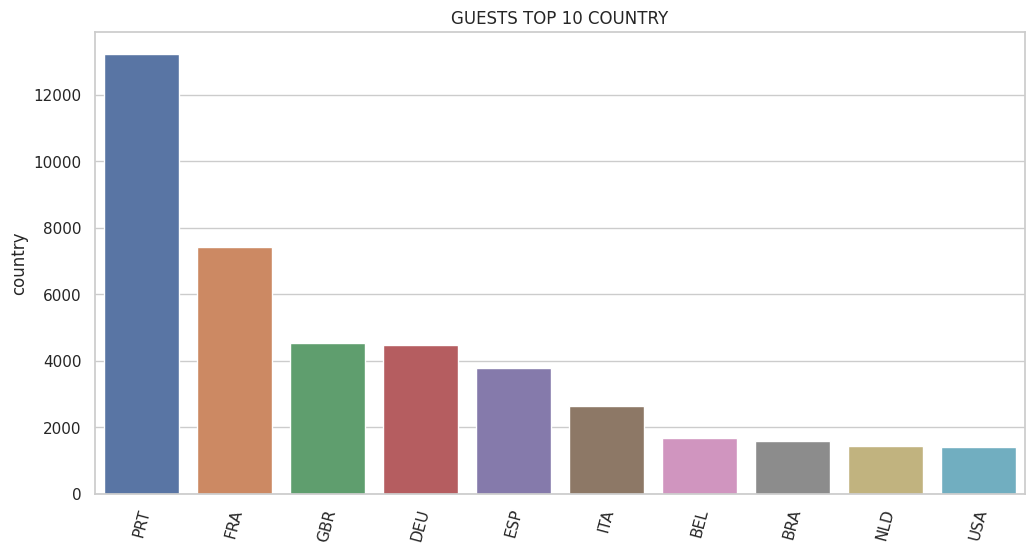

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('GUESTS TOP 10 COUNTRY')
sns.barplot(x=top_countries_with_codes.index, y=top_countries_with_codes)

##GUESTS DEMOGRAPHIC

In [ ]:
#booking count guest type by year
guest_type = df_eda.groupby(['reservation_year', 'guests_type']).agg({
    'is_canceled' : ['count']

})
guest_type

is_canceled
                                   count
reservation_year guests_type            
2014             couple               11
2015             couple             6293
                 family              381
2016             couple            24962
                 family             2941
2017             couple            16925
                 family             1912

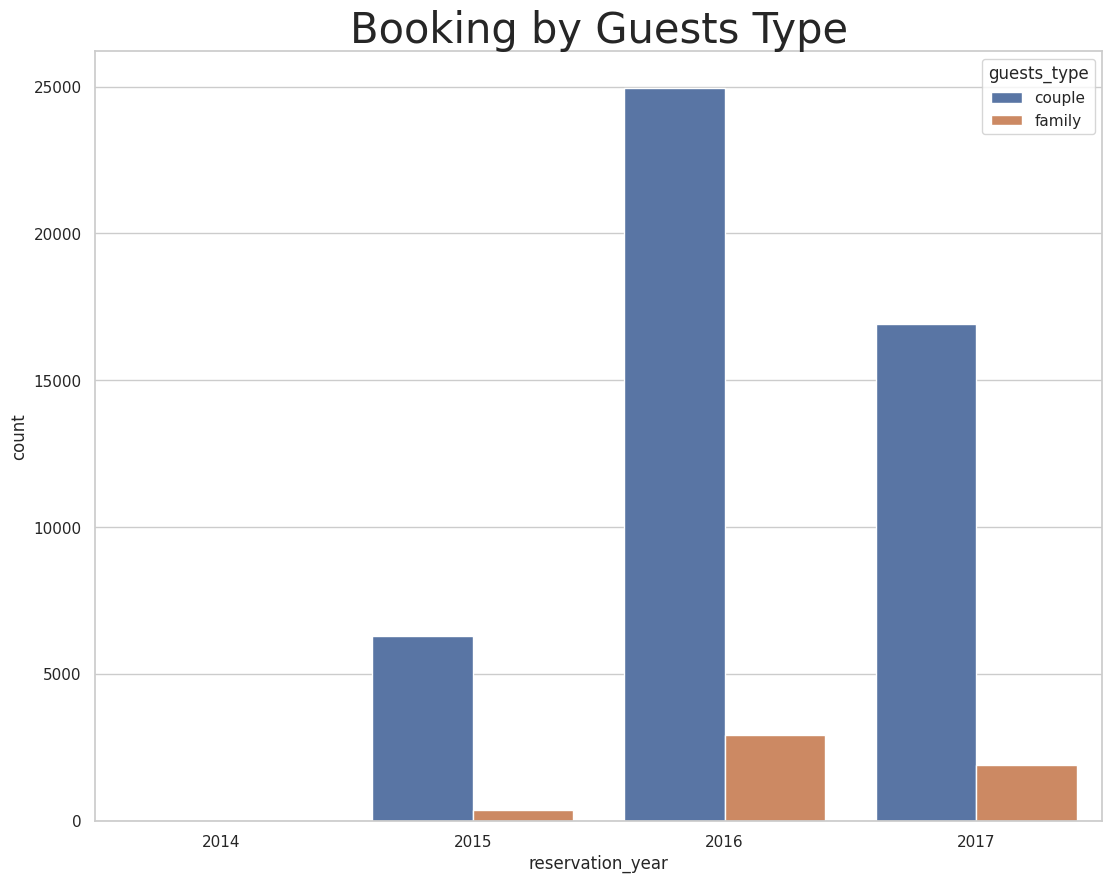

In [ ]:
plt.figure(figsize=(13,10))
sns.set(style = "whitegrid")
plt.title("Booking by Guests Type", fontdict = {'fontsize': 30})
guest_type = sns.countplot(x ='reservation_year', hue = 'guests_type',data = df_eda)

In [ ]:
#users/guests demographic
market_segment = df_eda.groupby(['reservation_year', 'guests_type']).agg({
    'is_canceled' : ['count'],
    'adr' : ['mean'],
    'stays_in_weekend_nights' : ['mean'],
    'stays_in_week_nights' : ['mean']
})
market_segment

is_canceled     adr stays_in_weekend_nights  \
                                   count    mean                    mean   
reservation_year guests_type                                               
2014             couple               11  62.800                   0.000   
2015             couple             6293  87.217                   0.816   
                 family              381 118.129                   0.840   
2016             couple            24962 103.680                   0.872   
                 family             2941 144.231                   0.929   
2017             couple            16925 118.256                   0.875   
                 family             1912 165.171                   0.964   

                             stays_in_week_nights  
                                             mean  
reservation_year guests_type                       
2014             couple                     2.000  
2015             couple                     2.110  
                 family                     2.189  
2016             couple                     2.261  
                 family                     2.394  
2017             couple                     2.316  
                 family                     2.469

In [ ]:
#booking count market segment by year
market_segment = df_eda.groupby(['reservation_year', 'market_segment']).agg({
    'is_canceled' : ['count']

})
market_segment

is_canceled
                                      count
reservation_year market_segment            
2014             Groups                  11
2015             Complementary          118
                 Corporate              388
                 Direct                 837
                 Groups                1120
                 Offline TA/TO         1371
                 Online TA             2838
                 Undefined                2
2016             Aviation               121
                 Complementary          253
                 Corporate             1271
                 Direct                2525
                 Groups                 791
                 Offline TA/TO         3977
                 Online TA            18965
2017             Aviation               106
                 Complementary          142
                 Corporate              568
                 Direct                2197
                 Groups                 713
                 Offline TA/TO         1922
                 Online TA            13189

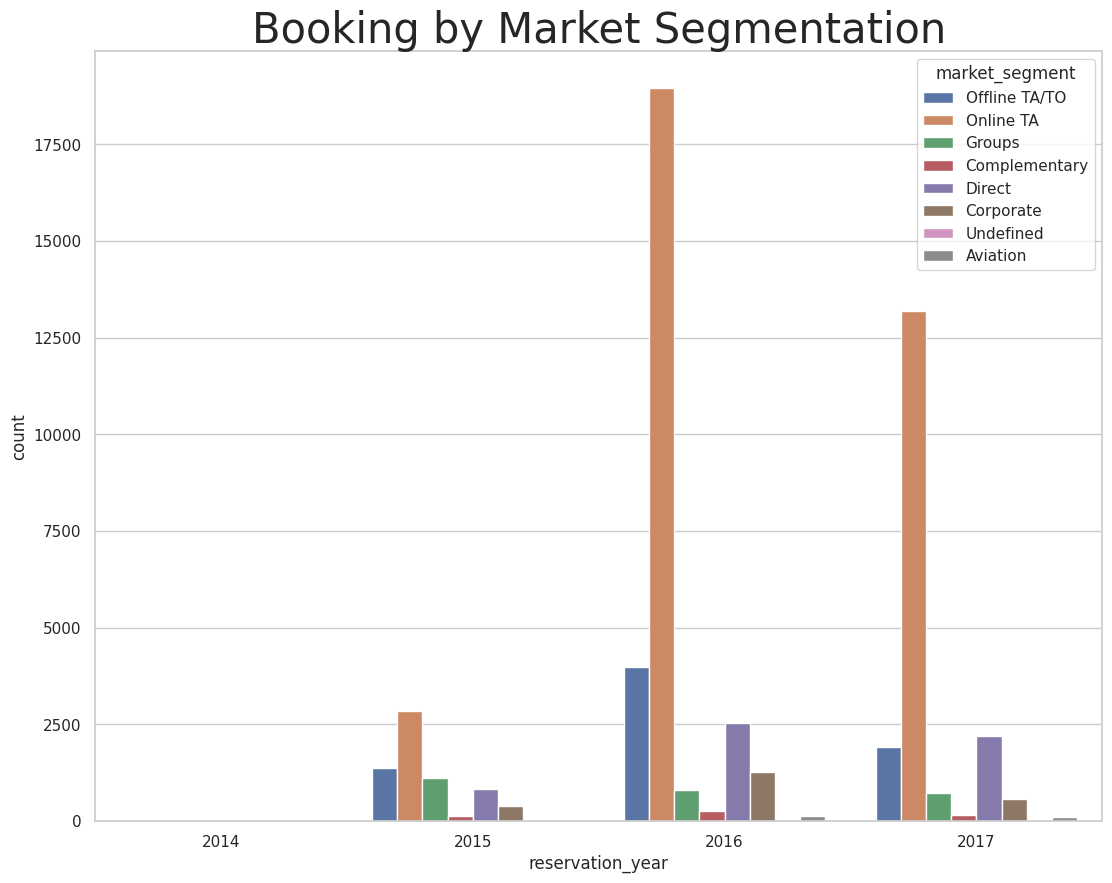

In [ ]:
plt.figure(figsize=(13,10))
sns.set(style = "whitegrid")
plt.title("Booking by Market Segmentation", fontdict = {'fontsize': 30})
market = sns.countplot(x ='reservation_year', hue = 'market_segment',data = df_eda)

In [ ]:
#booking count distribution channel by year
distribution_channel = df_eda.groupby(['reservation_year', 'distribution_channel']).agg({
    'is_canceled' : ['count']

})
distribution_channel

is_canceled
                                            count
reservation_year distribution_channel            
2014             TA/TO                         11
2015             Corporate                    390
                 Direct                       967
                 GDS                            1
                 TA/TO                       5312
                 Undefined                      4
2016             Corporate                   1492
                 Direct                      2792
                 GDS                           99
                 TA/TO                      23520
2017             Corporate                    725
                 Direct                      2328
                 GDS                           81
                 TA/TO                      15703

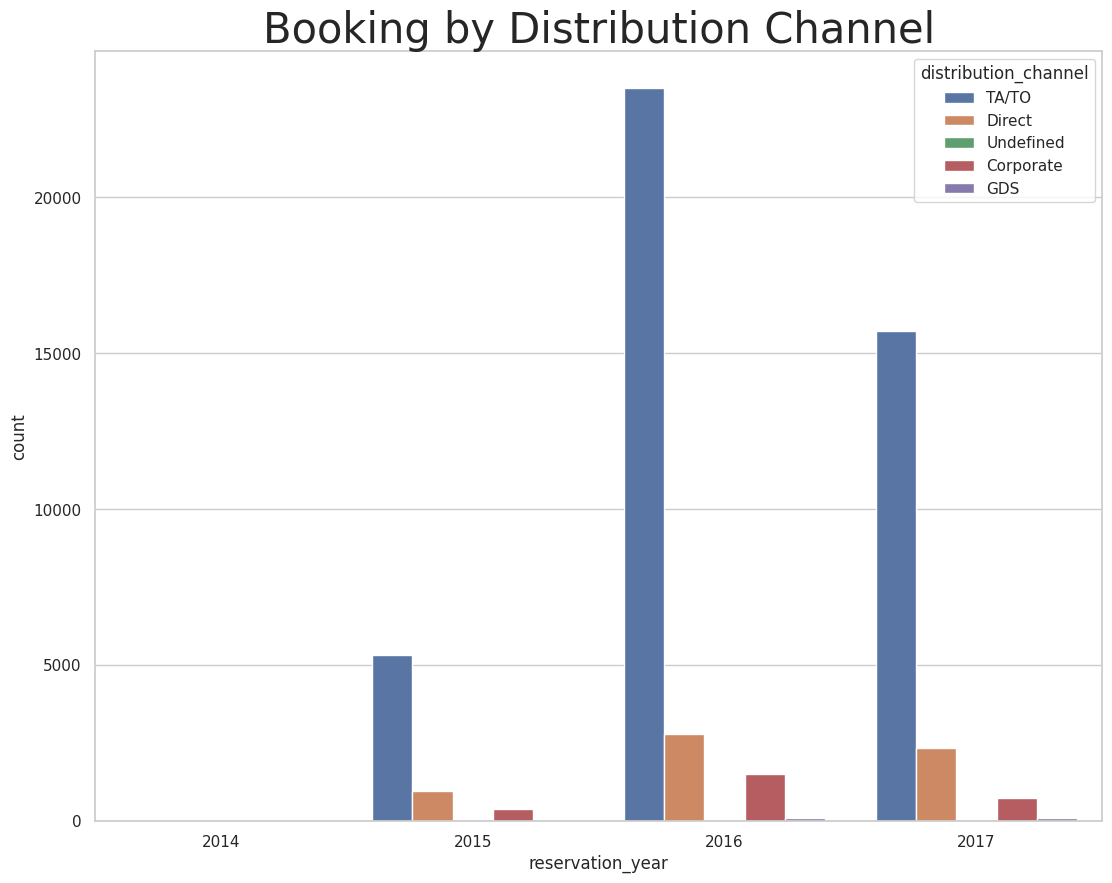

In [ ]:
plt.figure(figsize=(13,10))
sns.set(style = "whitegrid")
plt.title("Booking by Distribution Channel", fontdict = {'fontsize': 30})
distribution = sns.countplot(x ='reservation_year', hue = 'distribution_channel',data = df_eda)

##ADR

In [ ]:
#ADR by year
average_daily_rate = df_eda.groupby(['reservation_year', 'reservation_month']).agg({
    'adr' : ['mean'],

})
average_daily_rate

adr
                                      mean
reservation_year reservation_month        
2014             10                 62.800
2015             1                  62.402
                 2                  80.750
                 3                  72.559
                 4                  77.876
                 5                  71.847
                 6                  74.780
                 7                  66.734
                 8                  85.407
                 9                 106.390
                 10                 94.079
                 11                 76.257
                 12                 78.014
2016             1                  83.362
                 2                  89.991
                 3                  96.160
                 4                 105.456
                 5                 116.569
                 6                 112.941
                 7                 119.665
                 8                 123.340
                 9                 123.300
                 10                113.704
                 11                 98.750
                 12                 97.135
2017             1                 103.753
                 2                 104.053
                 3                 105.238
                 4                 130.704
                 5                 137.308
                 6                 132.561
                 7                 131.045
                 8                 140.681
                 9                 125.948

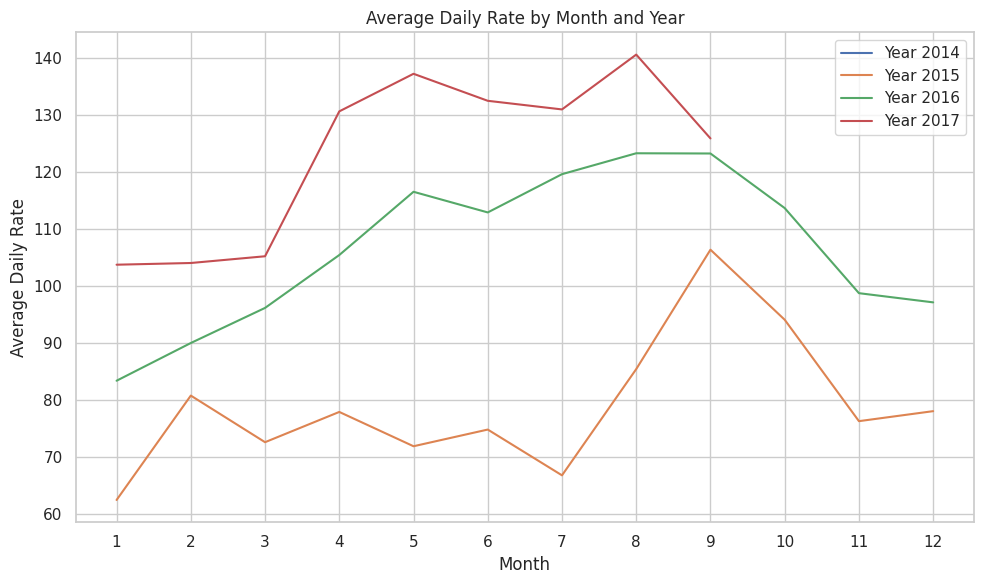

In [ ]:
average_daily_rate = df_eda.groupby(['reservation_year', 'reservation_month']).agg({
    'adr': 'mean'
}).reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))
for year in average_daily_rate['reservation_year'].unique():
    year_data = average_daily_rate[average_daily_rate['reservation_year'] == year]
    plt.plot(year_data['reservation_month'], year_data['adr'], label=f'Year {year}')

plt.xlabel('Month')
plt.ylabel('Average Daily Rate')
plt.title('Average Daily Rate by Month and Year')
plt.legend()
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


##SUMMARY & INSIGHTS:
1. Cancellation rate after final cleaned data= 30% from the total booking (53.425 booking).
2. Cancellation Ratio are high in months: November - Feruary.
3. Booking by top 10 countries: Portugal, France, Great Britain, Germany, SPain, Italy, Belgium, Brasil, Netherland, USA.
4. Guests type: couple and families, with mostly are couple, and stay in average 1 night in weekend, and 2-3 nights during weekdays.
5. ADR for family room is more expensive than double rooms (maybe because it has extra bed, extra meal ecc)
6. Booking are made mostly by: Travel Agent/Tour Operator.
7. Booking by Market Segment dominate by Offline TO/TA and Online TA. follow by direct and corporate in the year 2016 & 2017.
8. ADR is increasing by year.
9. ADR in every year is increasing between APRIL-SEPTEMBER (this is the high season for the hotel)

 # EDA Based on Feature Creation

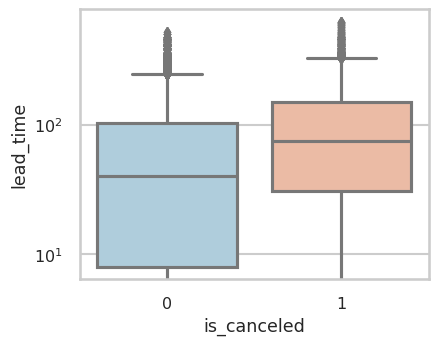

In [ ]:
# Set the figure size using matplotlib
plt.rcParams['figure.figsize'] = (4.5, 3.5)
sns.set_context('talk', font_scale=0.7)
sns.boxplot(y='lead_time',
            x="is_canceled",
            data=df_eda,
            palette='RdBu_r')
plt.yscale('log')
plt.show()

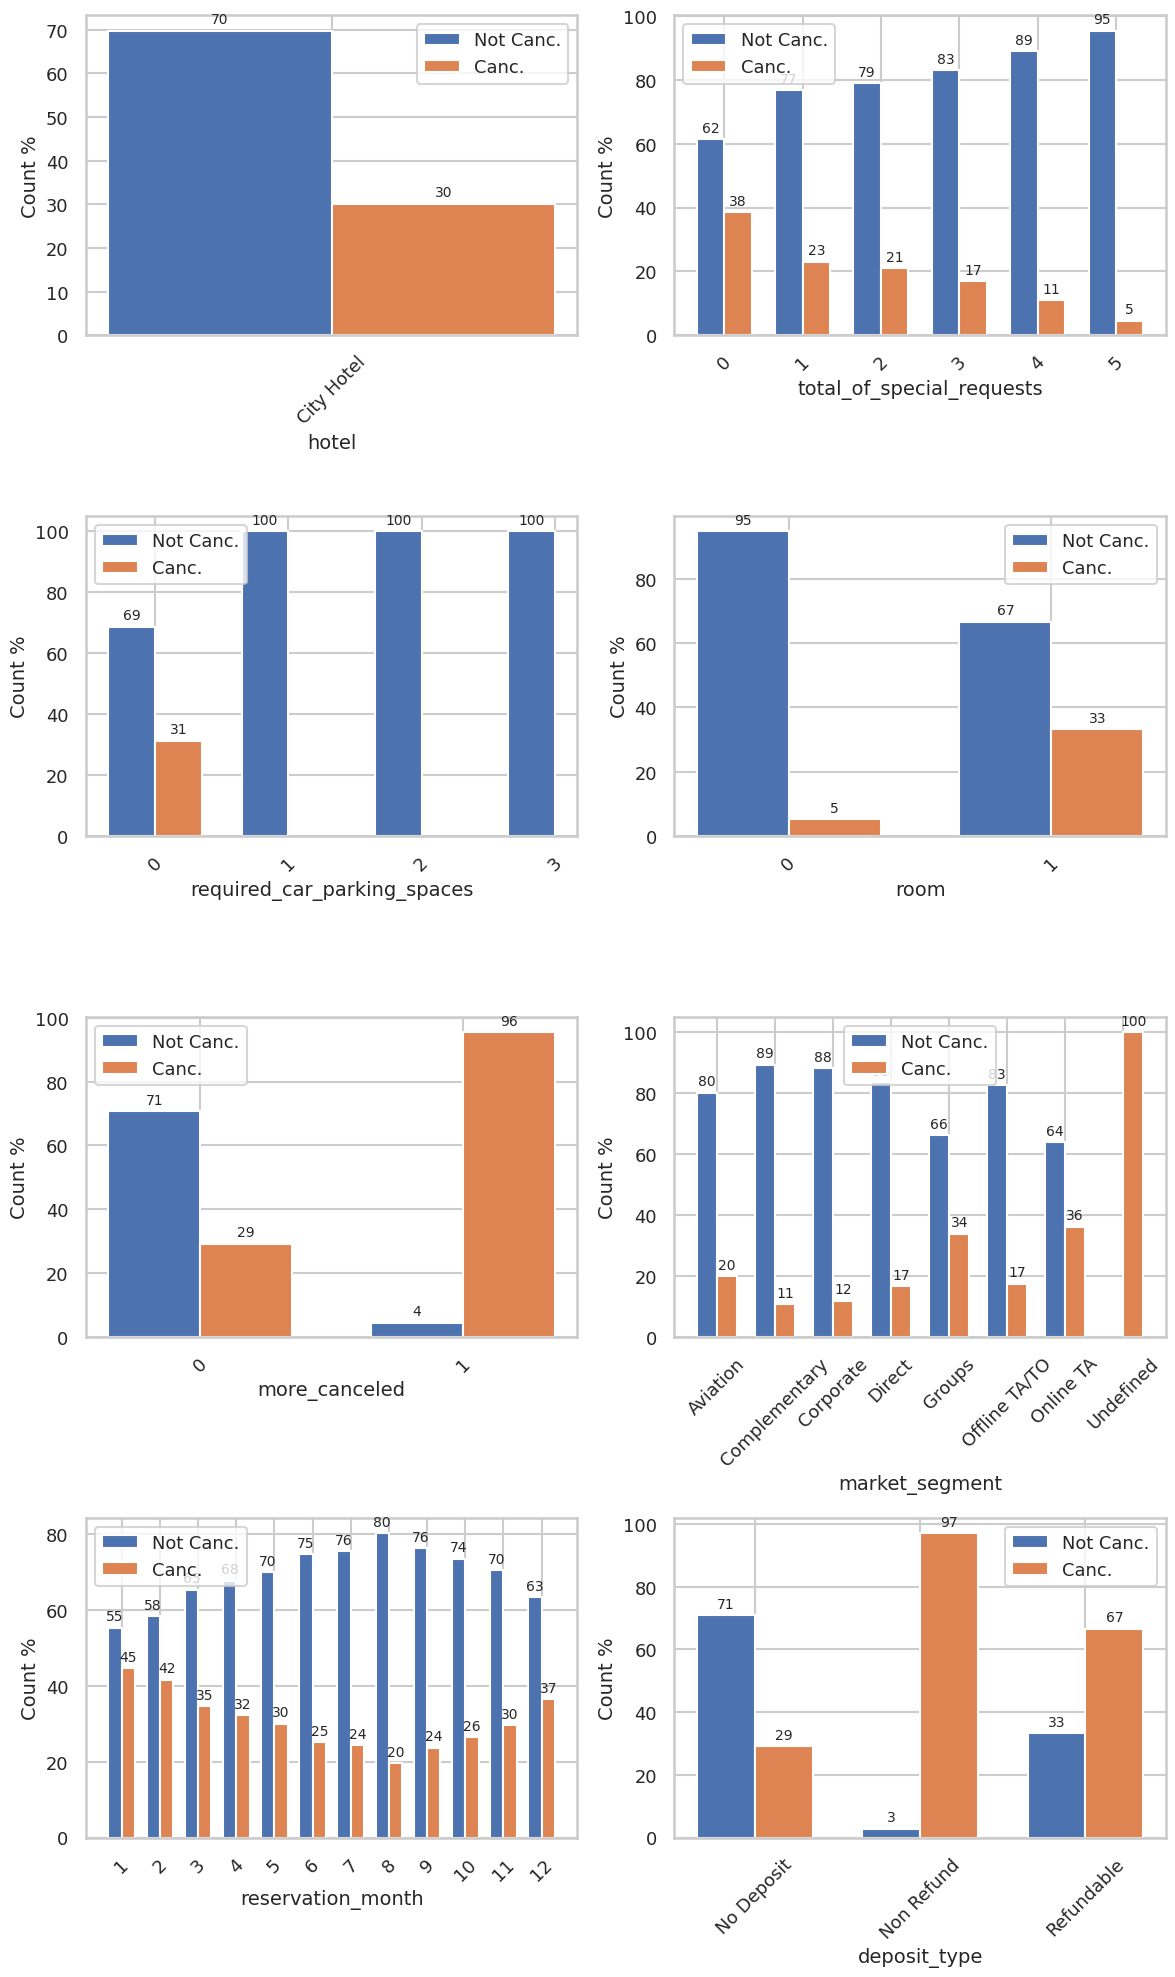

In [ ]:
# Set the figure size
plt.rcParams['figure.figsize'] = (12, 20)
sns.set_context('talk', font_scale=.78)

cols = [
    'hotel', 'total_of_special_requests', 'required_car_parking_spaces',
    'room', 'more_canceled', 'market_segment', 'reservation_month',
    'deposit_type'
]
col_index = 0
nrows = 4
ncols = 2
fig, ax = plt.subplots(nrows, ncols)

for i in range(nrows):
    for j in range(ncols):
        ggg = pd.DataFrame(
            df_subset.groupby([cols[col_index], 'is_canceled'
                               ])['is_canceled'].count() /
            df_subset.groupby([cols[col_index]])['is_canceled'].count() *
            100.0).unstack()

        # Grouped bar chart
        labels = list(ggg.index)
        x = np.arange(len(ggg.index))  # the label locations
        width = 0.35  # the width of the bars

        rects1 = ax[i, j].bar(x - width/2, ggg['is_canceled'][0], width, label='Not Canc.')
        rects2 = ax[i, j].bar(x + width/2, ggg['is_canceled'][1], width, label='Canc.')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax[i, j].set_ylabel('Count %')
        ax[i, j].set_xlabel(cols[col_index])
        ax[i, j].tick_params(axis='x', rotation=45)
        ax[i, j].set_xticks(x)
        ax[i, j].set_xticklabels(labels)
        ax[i, j].legend(loc='best')

        # data labels
        ax[i, j].bar_label(rects1, padding=3, fmt='%.0f', fontsize=10)
        ax[i, j].bar_label(rects2, padding=3, fmt='%.0f', fontsize=10)

        # going to the next column name in cols list
        col_index = col_index + 1

fig.tight_layout()
plt.show()

EDA Summary (boxplots, pairwise scatter plots, and count plots):

Hotel Type: City Hotel has 40% cancellation rate

Deposit type: "Non Refund" type is associated with cancellations 97% of the times, followed with "Refundable" that have 67% cancellations, whereas "No Deposit" have only 22% cancellations.

Lead time: Cancellations tend to have longer times between booking and arrival dates (median of 113 days for canceled bookings vs 46 days for non-canceled cases).

Car Parking Space Request: No cancellations when there is a parking space request, while 31% of bookings with no parking request were canceled.

Special Requests: Fewer cancellations (< 23%) when there is a special request (number of special requests > 0). This finding suggests that when guests make special requests and the number of such requests is more than 0, the likelihood of cancellations is lower than cases where there are no special requests. In other words, having special requests seems to contribute to reducing the risk of booking cancellations.

Room: Fewer cancellations when the assigned room is NOT the same as the reserved room type (5% vs 33%).

More Canceled: 96% cancellation was observed when prior cancellations > prior bookings, while only 29% of bookings were canceled for the opposite case (prior cancellations < prior bookings). It reveals a pattern in the relationship between previous cancellations and previous bookings. When there's a history of more cancellations compared to actual bookings, there's a higher risk of cancellations in the future (96% cancellation rate). Conversely, when there have been fewer cancellations than actual bookings, the risk of cancellation is lower (29% cancellation rate), indicating a more stable booking situation.

Market Segment: "Online TA" and "Groups" segment have similar number of cancellations with 36% and 34% more that number of stays (besides "Undefined" that shows 100% canceled)

Seasonal Trends: The months of Aug. show the lowest cancellation rates (20%), whereas the months of Jan., Feb. and Dec. exhibit the highest cancellation rates (45, 42, and 37%, respectively).

In [ ]:
df_subset.describe()

is_canceled  lead_time  stays_in_weekend_nights  stays_in_week_nights  \
count    53137.000  53137.000                53137.000             53137.000   
mean         0.302     78.008                    0.877                 2.287   
std          0.459     82.144                    0.914                 1.614   
min          0.000      0.000                    0.000                 0.000   
25%          0.000     14.000                    0.000                 1.000   
50%          0.000     51.000                    1.000                 2.000   
75%          1.000    118.000                    2.000                 3.000   
max          1.000    629.000                   16.000                41.000   

         adults  children    babies  is_repeated_guest  \
count 53137.000 53137.000 53137.000          53137.000   
mean      1.879     0.132     0.007              0.029   
std       0.541     0.443     0.103              0.168   
min       0.000     0.000     0.000              0.000   
25%       2.000     0.000     0.000              0.000   
50%       2.000     0.000     0.000              0.000   
75%       2.000     0.000     0.000              0.000   
max       4.000     3.000    10.000              1.000   

       previous_cancellations  previous_bookings_not_canceled  ...       adr  \
count               53137.000                       53137.000  ... 53137.000   
mean                    0.036                           0.192  ...   111.487   
std                     0.374                           2.044  ...    41.583   
min                     0.000                           0.000  ...     0.000   
25%                     0.000                           0.000  ...    84.600   
50%                     0.000                           0.000  ...   105.400   
75%                     0.000                           0.000  ...   134.100   
max                    21.000                          72.000  ...   510.000   

       required_car_parking_spaces  total_of_special_requests  \
count                    53137.000                  53137.000   
mean                         0.036                      0.712   
std                          0.187                      0.834   
min                          0.000                      0.000   
25%                          0.000                      0.000   
50%                          0.000                      1.000   
75%                          0.000                      1.000   
max                          3.000                      5.000   

       reservation_year  reservation_month  cancel_lead_time  \
count         53137.000          53137.000         53137.000   
mean           2016.228              6.222            61.874   
std               0.653              3.211            73.696   
min            2014.000              1.000             0.000   
25%            2016.000              4.000             7.000   
50%            2016.000              6.000            33.000   
75%            2017.000              9.000            93.000   
max            2017.000             12.000           584.000   

       total_staying_nights      room  more_canceled  reservation_day  
count             53137.000 53137.000      53137.000        53137.000  
mean                  3.164     0.888          0.015           15.712  
std                   2.082     0.315          0.121            8.752  
min                   1.000     0.000          0.000            1.000  
25%                   2.000     1.000          0.000            8.000  
50%                   3.000     1.000          0.000           16.000  
75%                   4.000     1.000          0.000           23.000  
max                  57.000     1.000          1.000           31.000  

[8 rows x 22 columns]

#EDA CANCELLATION



In [ ]:
df_cancel=df_cl.copy()

drop not canceled

df_cl = df_cl[df_cl['hotel'] != 'Resort Hotel']
df_cl

df_canceled = df_canceled[df_canceled['is_canceled'] != 0]

In [ ]:
df_cancel = df_cancel[df_cancel['is_canceled']!= 0]
df_cancel

hotel  is_canceled  lead_time  stays_in_weekend_nights  \
40061   City Hotel            1         88                        0   
40062   City Hotel            1         65                        0   
40063   City Hotel            1         92                        2   
40064   City Hotel            1        100                        0   
40065   City Hotel            1         79                        0   
...            ...          ...        ...                      ...   
110280  City Hotel            1        132                        0   
111355  City Hotel            1          4                        1   
111924  City Hotel            1          7                        0   
111925  City Hotel            1          6                        1   
117295  City Hotel            1          0                        0   

        stays_in_week_nights  adults  children  babies meal country  ...  \
40061                      4       2         0       0   BB     PRT  ...   
40062                      4       1         0       0   BB     PRT  ...   
40063                      4       2         0       0   BB     PRT  ...   
40064                      2       2         0       0   BB     PRT  ...   
40065                      3       2         0       0   BB     PRT  ...   
...                      ...     ...       ...     ...  ...     ...  ...   
110280                     0       0         0       0   BB     FRA  ...   
111355                     0       1         0       0   BB     PRT  ...   
111924                     1       1         0       0   BB     PRT  ...   
111925                     0       1         0       0   BB     PRT  ...   
117295                     2       1         0       0   BB     PRT  ...   

       reservation_status reservation_status_date  arrival_date  \
40061            Canceled              2015-07-01    2015-07-01   
40062            Canceled              2015-04-30    2015-07-01   
40063            Canceled              2015-06-23    2015-07-01   
40064            Canceled              2015-04-02    2015-07-02   
40065            Canceled              2015-06-25    2015-07-02   
...                   ...                     ...           ...   
110280           Canceled              2017-04-25    2017-04-25   
111355           Canceled              2017-06-05    2017-06-05   
111924           Canceled              2017-05-31    2017-05-31   
111925            No-Show              2017-07-17    2017-07-17   
117295            No-Show              2017-08-02    2017-08-02   

        reservation_year  reservation_month booking_date cancel_lead_time  \
40061               2015                  7   2015-04-04               88   
40062               2015                  4   2015-04-27                3   
40063               2015                  6   2015-03-31               84   
40064               2015                  4   2015-03-24                9   
40065               2015                  6   2015-04-14               72   
...                  ...                ...          ...              ...   
110280              2017                  4   2016-12-14              132   
111355              2017                  6   2017-06-01                4   
111924              2017                  5   2017-05-24                7   
111925              2017                  7   2017-07-11                6   
117295              2017                  8   2017-08-02                0   

        guests_type grp_waiting_list  grp_lead_time  
40061        couple              0-1          31-90  
40062        couple              0-1          31-90  
40063        couple              0-1            90+  
40064        couple              0-1            90+  
40065        couple              0-1          31-90  
...             ...              ...            ...  
110280       couple              0-1            90+  
111355       couple              0-1            2-7  
111924       couple            

In [ ]:
df_cancel['is_canceled'].unique()

array([1])

In [ ]:
df_cancel['is_canceled'].value_counts()

1    16048
Name: is_canceled, dtype: int64

In [ ]:
total_count=df_cancel['is_canceled'].count()
total_count

16048

##DESCRIPTIVE

In [ ]:
#Descriptive analysis for cancellation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

numeric = ['adr','days_in_waiting_list','lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies']

desc_eda = df_cancel[numeric].describe()
desc_eda.loc['kurtosis'] = df_eda[numeric].kurt() #show kurtosis statistic
desc_eda.loc['skewness'] = df_eda[numeric].skew() #show Skewness statistic
desc_eda.loc['variance'] = df_eda[numeric].var() #show variance statistic
desc_eda.round(2)

adr  days_in_waiting_list  lead_time  stays_in_weekend_nights  \
count    16048.000             16048.000  16048.000                16048.000   
mean       116.950                 1.170    101.650                    0.960   
std         40.820                12.870     91.300                    1.000   
min          0.000                 0.000      0.000                    0.000   
25%         89.100                 0.000     31.000                    0.000   
50%        110.500                 0.000     75.000                    1.000   
75%        139.180                 0.000    150.000                    2.000   
max        352.500               391.000    629.000                   10.000   
kurtosis     2.060               375.630      3.110                    6.340   
skewness     0.640                17.280      1.580                    1.200   
variance  1786.480               141.660   6742.820                    0.830   

          stays_in_week_nights    adults  children    babies  
count                16048.000 16048.000 16048.000 16048.000  
mean                     2.550     1.950     0.160     0.000  
std                      1.900     0.520     0.480     0.060  
min                      0.000     0.000     0.000     0.000  
25%                      1.000     2.000     0.000     0.000  
50%                      2.000     2.000     0.000     0.000  
75%                      3.000     2.000     0.000     0.000  
max                     24.000     4.000     3.000     1.000  
kurtosis                29.790     0.990    11.610  2853.840  
skewness                 2.950    -0.310     3.490    36.770  
variance                 2.620     0.300     0.200     0.010

In [ ]:
#describe string type data
objects = ['country',
 'guests_type',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'deposit_type']
df_cancel[objects].describe()

country guests_type market_segment distribution_channel  \
count    16048       16048          16048                16048   
unique     125           2              8                    5   
top        PRT      couple      Online TA                TA/TO   
freq      4888       14294          12618                14703   

       reserved_room_type assigned_room_type customer_type deposit_type  
count               16048              16048         16048        16048  
unique                  8                  9             4            3  
top                     A                  A     Transient   No Deposit  
freq                10794              10546         14473        15218

In [ ]:
#describe date type data
df_cancel['reservation_status_date'].describe()

<ipython-input-181-2100853324aa>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_cancel['reservation_status_date'].describe()


count                   16048
unique                    840
top       2015-10-21 00:00:00
freq                      114
first     2014-10-17 00:00:00
last      2017-08-29 00:00:00
Name: reservation_status_date, dtype: object

In [ ]:
df_cancel['arrival_date'].describe()

<ipython-input-182-fbc3325072e8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_cancel['arrival_date'].describe()


count                   16048
unique                    789
top       2017-08-16 00:00:00
freq                       67
first     2015-07-01 00:00:00
last      2017-08-31 00:00:00
Name: arrival_date, dtype: object

###INSIGHTS & SUMMARY
1. Cancel only data: 16.408 data, with the:
- Average Daily Rate: 116.95 Euro, min= 0 (probably compliments), max = 352 Euro
- Days in waiting list: average= 2, min = 0, max = 391 days
- Lead time: average= 101 days, min=0, max=629 days.
- Stay in weekend nights: avg= 1, min= 0, max= 10
- Stay in weekdays nights: avg= 3, min= 0, max= 24
- Adults: avg= 2, min=0, max= 4
- Children: avg= 1, min= 0, max= 3
- Babies: avg= 0, min= 0, max= 1
- THere are 125 country, with the most is Portugal, with 4.888 cancel
- Guests Type: couple and family, with the most is Family = 14.294 cancel
- 8 market segments, with the most is: ONline Travel Agent = 12,618 cancel
- 5 Distribution Channel, with the most is: Travel Agent/Tour Operator = 14.703 cancel.
- Reserved and Assigned room type is A.
- Deposit Type is No Deposit = 15.218 cancel
- 4 customer type, the most is Transient = 14.473 cancel
2. Reservation Status:
- first reservation: 17/10/2014
- last reservation: 29/08/2017
- the most reservation was made on: 21/10/2015.
- there are 840 day-date of reservation
3. Arrival Date:
- first reservation: 01/07/2015
- last reservation: 31/08/2017
- the most reservation was made on: 16/08/2017
- there are 789 day-date of arrival date

##CANCELLATION BY COUNTRY, TOP 10

In [ ]:
# Calculate the sum of cancellations for each country= PRT by 30,5%
cancellation_by_country = df_cancel.groupby('country').agg({
    'is_canceled': 'sum'
})

total_count_by_country = df_cancel.groupby('country').size().reset_index(name='total_count')

cancellation_by_country['percentage'] = round((cancellation_by_country['is_canceled'] /total_count) * 100, 2)

cancellation_by_country = cancellation_by_country.sort_values(by='is_canceled', ascending=False)

# Display the top 10 countries with the highest cancellation counts
top_10_countries = cancellation_by_country.head(10)
print(top_10_countries)

         is_canceled  percentage
country                         
PRT             4888      30.460
FRA             1546       9.630
GBR             1299       8.090
ESP             1118       6.970
ITA             1003       6.250
DEU              931       5.800
BRA              636       3.960
USA              394       2.460
CHN              383       2.390
BEL              367       2.290


##CANCEL BY DISTRIBUTION & MARKET SEGMENT

In [ ]:
# cancellation by distribution channel=TO/TA
cancellation_by_distribution = df_cancel.groupby(['reservation_year','distribution_channel']).agg({
    'is_canceled': 'sum'
})

total_count_by_distribution = df_cancel.groupby('distribution_channel').size().reset_index(name='total_count')

cancellation_by_distribution['percentage'] = round((cancellation_by_distribution['is_canceled'] /total_count) * 100, 2)

print(cancellation_by_distribution)

                                       is_canceled  percentage
reservation_year distribution_channel                         
2014             TA/TO                          11       0.070
2015             Corporate                      64       0.400
                 Direct                        150       0.930
                 TA/TO                        1500       9.350
                 Undefined                       4       0.020
2016             Corporate                     181       1.130
                 Direct                        498       3.100
                 GDS                            24       0.150
                 TA/TO                        8238      51.330
2017             Corporate                      87       0.540
                 Direct                        325       2.030
                 GDS                            12       0.070
                 TA/TO                        4954      30.870


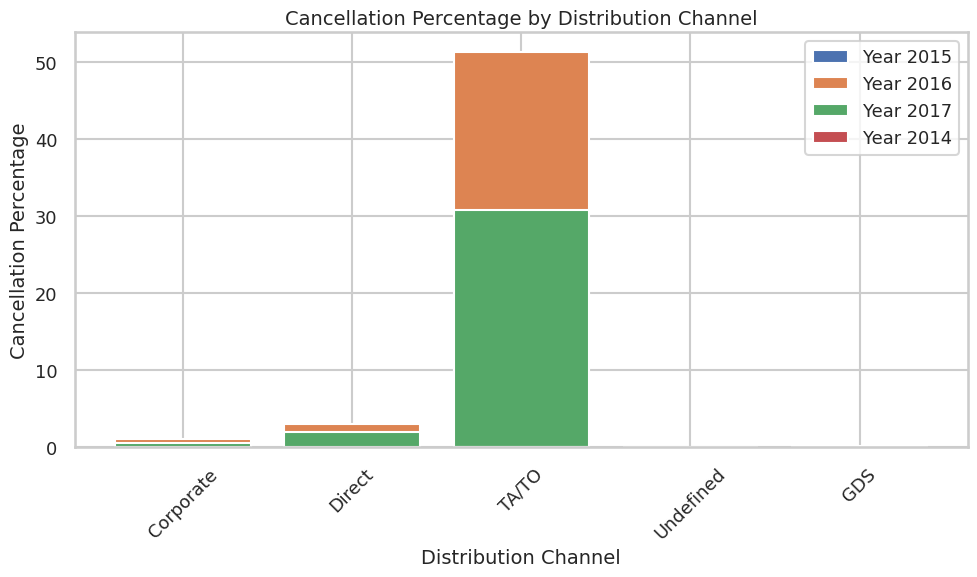

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
for year in df_cancel['reservation_year'].unique():
    data_year = cancellation_by_distribution.loc[year]
    plt.bar(data_year.index, data_year['percentage'], label=f'Year {year}')

plt.xlabel('Distribution Channel')
plt.ylabel('Cancellation Percentage')
plt.title('Cancellation Percentage by Distribution Channel')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# cancellation by market segment= ONLINE TA
cancellation_by_market = df_cancel.groupby(['reservation_year','market_segment']).agg({
    'is_canceled': 'sum'
})

total_count_by_market = df_cancel.groupby('market_segment').size().reset_index(name='total_count')

cancellation_by_market['percentage'] = round((cancellation_by_market['is_canceled'] / total_count) * 100, 2)

print(cancellation_by_market)

                                 is_canceled  percentage
reservation_year market_segment                         
2014             Groups                   11       0.070
2015             Complementary            13       0.080
                 Corporate                57       0.360
                 Direct                  137       0.850
                 Groups                  436       2.720
                 Offline TA/TO           282       1.760
                 Online TA               791       4.930
                 Undefined                 2       0.010
2016             Aviation                 24       0.150
                 Complementary            27       0.170
                 Corporate               149       0.930
                 Direct                  463       2.890
                 Groups                  260       1.620
                 Offline TA/TO           654       4.080
                 Online TA              7364      45.890
2017             Aviation      

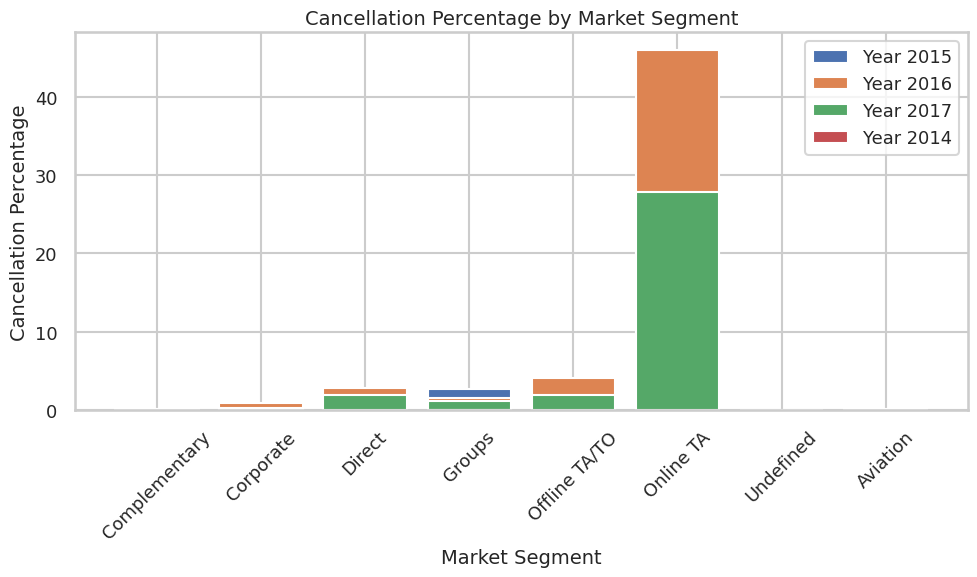

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
for year in df_cancel['reservation_year'].unique():
    data_year = cancellation_by_market.loc[year]
    plt.bar(data_year.index, data_year['percentage'], label=f'Year {year}')

plt.xlabel('Market Segment')
plt.ylabel('Cancellation Percentage')
plt.title('Cancellation Percentage by Market Segment')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###INSIGHTS & SUMMARY
1. Cancellation by Market Segment the highest are in the year of 2016 (45,89%) & 2017 (27,81%) made by Online TA
2. Cancellation by DIstribution Channel: the highest are in the year of 2016 (51,33%) and 2017 (30,87%), made by Travel Agent / Tour Operator

##CANCEL BY GUESTS DEMOGRAPHIC

In [ ]:
# cancellation by guests type = COUPLE
cancellation_by_guests = df_cancel.groupby(['reservation_year','guests_type']).agg({
    'is_canceled': 'sum'
})

total_count_by_guests = df_cancel.groupby('guests_type').size().reset_index(name='total_count')

cancellation_by_guests['percentage'] = round((cancellation_by_guests['is_canceled'] / total_count) * 100, 2)

print(cancellation_by_guests)

                              is_canceled  percentage
reservation_year guests_type                         
2014             couple                11       0.070
2015             couple              1635      10.190
                 family                83       0.520
2016             couple              7830      48.790
                 family              1111       6.920
2017             couple              4818      30.020
                 family               560       3.490


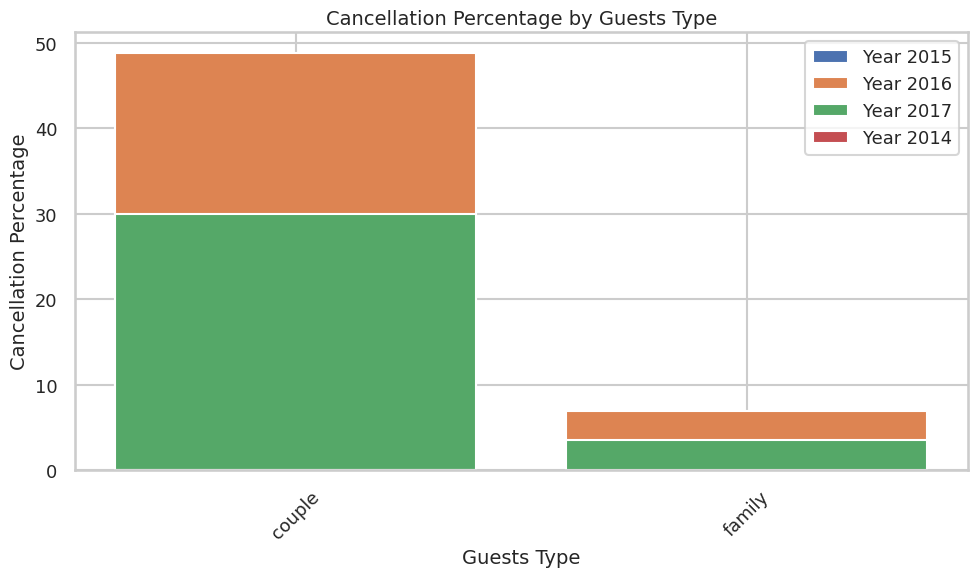

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
for year in df_cancel['reservation_year'].unique():
    data_year = cancellation_by_guests.loc[year]
    plt.bar(data_year.index, data_year['percentage'], label=f'Year {year}')

plt.xlabel('Guests Type')
plt.ylabel('Cancellation Percentage')
plt.title('Cancellation Percentage by Guests Type')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# cancellation by demographic stay weekend
cancellation_by_weekend = df_cancel.groupby(['reservation_year','stays_in_weekend_nights']).agg({
    'is_canceled': 'sum'
})

total_count_by_weekend = df_cancel.groupby('stays_in_weekend_nights').size().reset_index(name='total_count')

cancellation_by_weekend['percentage'] = round((cancellation_by_weekend['is_canceled'] / total_count) * 100, 2)

print(cancellation_by_weekend)

                                          is_canceled  percentage
reservation_year stays_in_weekend_nights                         
2014             0                                 11       0.070
2015             0                                817       5.090
                 1                                444       2.770
                 2                                421       2.620
                 3                                 16       0.100
                 4                                 10       0.060
                 5                                  5       0.030
                 6                                  1       0.010
                 8                                  3       0.020
                 9                                  1       0.010
2016             0                               3555      22.150
                 1                               2528      15.750
                 2                               2599      16.200
          

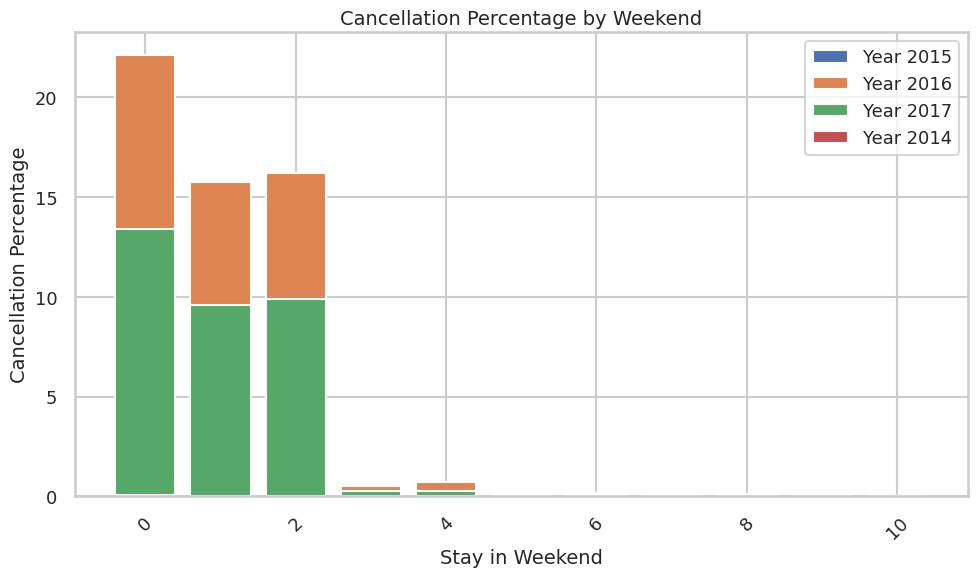

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
for year in df_cancel['reservation_year'].unique():
    data_year = cancellation_by_weekend.loc[year]
    plt.bar(data_year.index, data_year['percentage'], label=f'Year {year}')

plt.xlabel('Stay in Weekend')
plt.ylabel('Cancellation Percentage')
plt.title('Cancellation Percentage by Weekend')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# cancellation by demographic stay weeknights
cancellation_by_weeknights = df_cancel.groupby(['reservation_year','stays_in_week_nights']).agg({
    'is_canceled': 'sum'
})

total_count_by_weeknights = df_cancel.groupby('stays_in_week_nights').size().reset_index(name='total_count')

cancellation_by_weeknights['percentage'] = round((cancellation_by_weeknights['is_canceled'] / total_count) * 100, 2)

print(cancellation_by_weeknights)

                                       is_canceled  percentage
reservation_year stays_in_week_nights                         
2014             2                              11       0.070
2015             0                              89       0.550
                 1                             501       3.120
                 2                             534       3.330
                 3                             289       1.800
...                                            ...         ...
2017             15                              4       0.020
                 19                              1       0.010
                 20                              1       0.010
                 21                              1       0.010
                 22                              1       0.010

[64 rows x 2 columns]


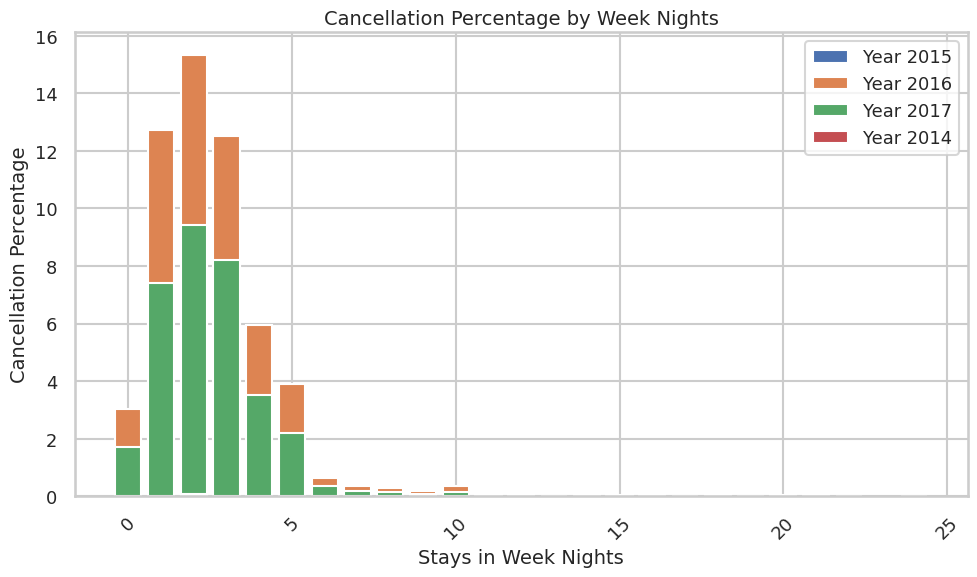

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
for year in df_cancel['reservation_year'].unique():
    data_year = cancellation_by_weeknights.loc[year]
    plt.bar(data_year.index, data_year['percentage'], label=f'Year {year}')

plt.xlabel('Stays in Week Nights')
plt.ylabel('Cancellation Percentage')
plt.title('Cancellation Percentage by Week Nights')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# cancellation by demographic special request
cancellation_by_request = df_cancel.groupby(['reservation_year','total_of_special_requests']).agg({
    'is_canceled': 'sum'
})

total_count_by_request = df_cancel.groupby('total_of_special_requests').size().reset_index(name='total_count')

cancellation_by_request['percentage'] = round((cancellation_by_request['is_canceled'] / total_count) * 100, 2)

print(cancellation_by_request)

                                            is_canceled  percentage
reservation_year total_of_special_requests                         
2014             0                                   11       0.070
2015             0                                 1088       6.780
                 1                                  402       2.500
                 2                                  206       1.280
                 3                                   22       0.140
2016             0                                 5862      36.530
                 1                                 2140      13.330
                 2                                  788       4.910
                 3                                  139       0.870
                 4                                   12       0.070
2017             0                                 3130      19.500
                 1                                 1612      10.040
                 2                              

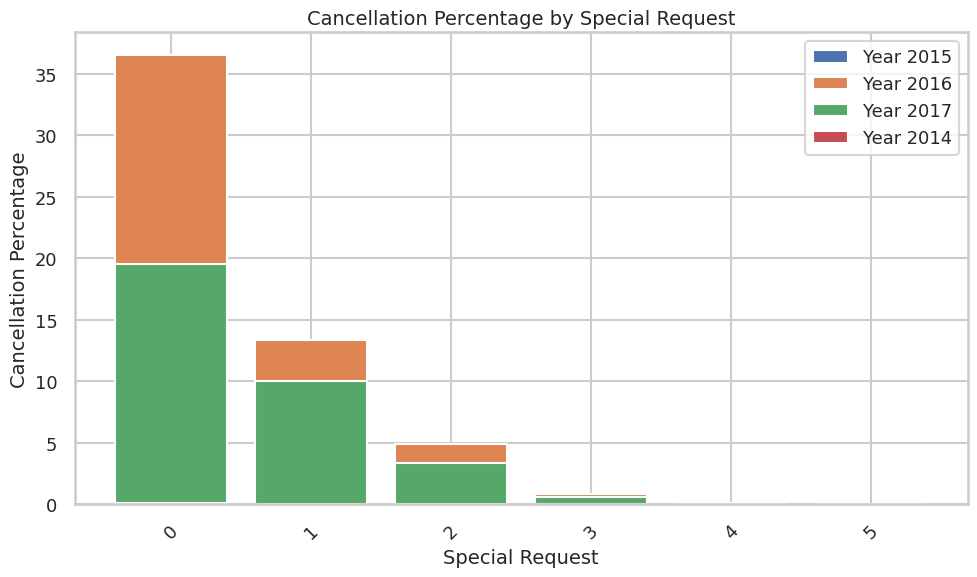

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
for year in df_cancel['reservation_year'].unique():
    data_year = cancellation_by_request.loc[year]
    plt.bar(data_year.index, data_year['percentage'], label=f'Year {year}')

plt.xlabel('Special Request')
plt.ylabel('Cancellation Percentage')
plt.title('Cancellation Percentage by Special Request')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# cancellation by demographic meal
cancellation_by_meal = df_cancel.groupby(['reservation_year','meal']).agg({
    'is_canceled': 'sum'
})

total_count_by_meal = df_cancel.groupby('meal').size().reset_index(name='total_count')

cancellation_by_meal['percentage'] = round((cancellation_by_meal['is_canceled'] / total_count) * 100, 2)

print(cancellation_by_meal)

                       is_canceled  percentage
reservation_year meal                         
2014             BB             11       0.070
2015             BB           1531       9.540
                 FB              2       0.010
                 HB            142       0.880
                 SC             43       0.270
2016             BB           6619      41.250
                 HB            412       2.570
                 SC           1910      11.900
2017             BB           3709      23.110
                 HB            278       1.730
                 SC           1391       8.670


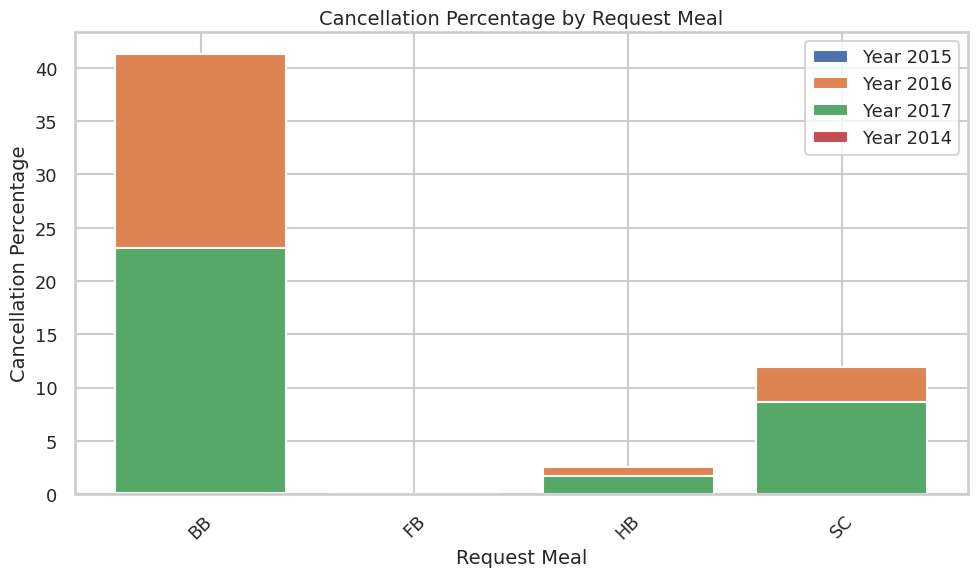

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
for year in df_cancel['reservation_year'].unique():
    data_year = cancellation_by_meal.loc[year]
    plt.bar(data_year.index, data_year['percentage'], label=f'Year {year}')

plt.xlabel('Request Meal')
plt.ylabel('Cancellation Percentage')
plt.title('Cancellation Percentage by Request Meal')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# cancellation by demographic repeated guest
cancellation_by_rguest = df_cancel.groupby(['reservation_year','is_repeated_guest']).agg({
    'is_canceled': 'sum'
})

total_count_by_rguest = df_cancel.groupby('is_repeated_guest').size().reset_index(name='total_count')

cancellation_by_rguest['percentage'] = round((cancellation_by_rguest['is_canceled'] / total_count) * 100, 2)

print(cancellation_by_rguest)

                                    is_canceled  percentage
reservation_year is_repeated_guest                         
2014             1                           11       0.070
2015             0                         1628      10.140
                 1                           90       0.560
2016             0                         8890      55.400
                 1                           51       0.320
2017             0                         5341      33.280
                 1                           37       0.230


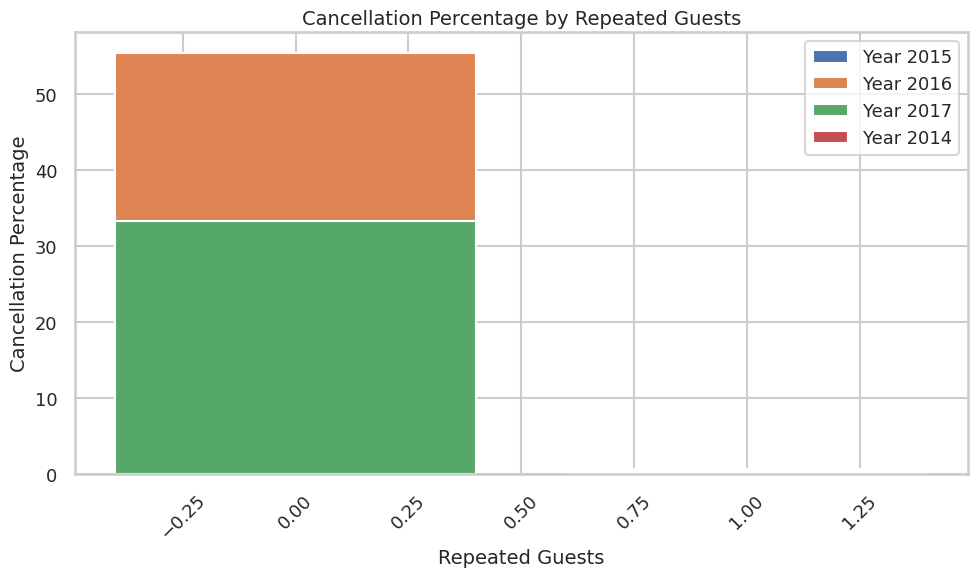

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
for year in df_cancel['reservation_year'].unique():
    data_year = cancellation_by_rguest.loc[year]
    plt.bar(data_year.index, data_year['percentage'], label=f'Year {year}')

plt.xlabel('Repeated Guests')
plt.ylabel('Cancellation Percentage')
plt.title('Cancellation Percentage by Repeated Guests')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# cancellation by demographic previous cancellation
cancellation_by_prevcancel = df_cancel.groupby(['reservation_year','previous_cancellations']).agg({
    'is_canceled': 'sum'
})

total_count_by_prevcancel = df_cancel.groupby('previous_cancellations').size().reset_index(name='total_count')

cancellation_by_prevcancel['percentage'] = round((cancellation_by_prevcancel['is_canceled'] / total_count) * 100, 2)

print(cancellation_by_prevcancel)

                                         is_canceled  percentage
reservation_year previous_cancellations                         
2014             1                                 9       0.060
                 2                                 1       0.010
                 21                                1       0.010
2015             0                               992       6.180
                 1                               715       4.460
                 2                                 2       0.010
                 3                                 3       0.020
                 6                                 1       0.010
                 11                                2       0.010
                 13                                3       0.020
2016             0                              8892      55.410
                 1                                37       0.230
                 2                                 7       0.040
                 3       

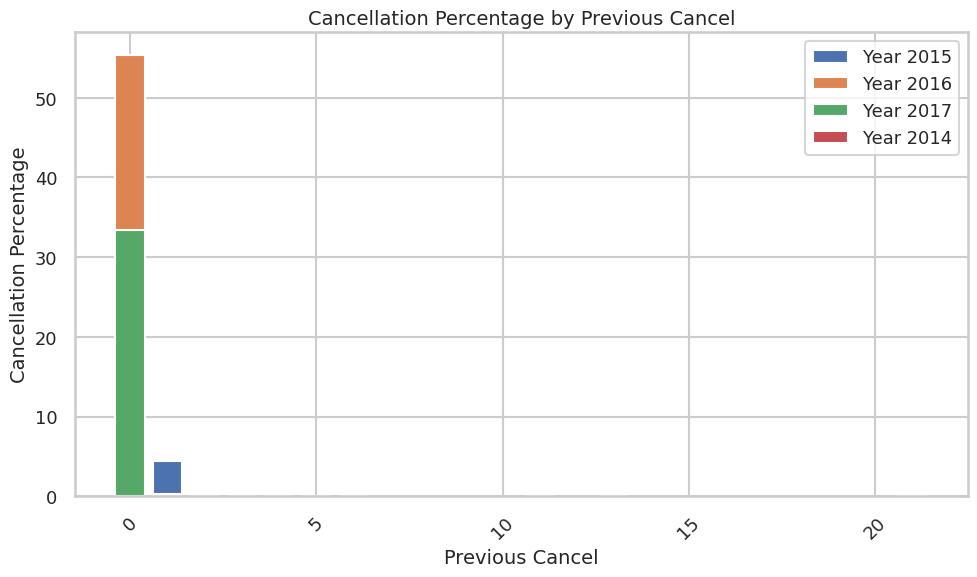

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
for year in df_cancel['reservation_year'].unique():
    data_year = cancellation_by_prevcancel.loc[year]
    plt.bar(data_year.index, data_year['percentage'], label=f'Year {year}')

plt.xlabel('Previous Cancel')
plt.ylabel('Cancellation Percentage')
plt.title('Cancellation Percentage by Previous Cancel')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# cancellation by demographic deposit type
cancellation_by_deptype = df_cancel.groupby(['reservation_year','deposit_type']).agg({
    'is_canceled': 'sum'
})

total_count_by_deptype = df_cancel.groupby('deposit_type').size().reset_index(name='total_count')

cancellation_by_deptype['percentage'] = round((cancellation_by_deptype['is_canceled'] / total_count) * 100, 2)

print(cancellation_by_deptype)

                               is_canceled  percentage
reservation_year deposit_type                         
2014             No Deposit             11       0.070
2015             No Deposit           1357       8.460
                 Non Refund            361       2.250
2016             No Deposit           8627      53.760
                 Non Refund            313       1.950
                 Refundable              1       0.010
2017             No Deposit           5223      32.550
                 Non Refund            146       0.910
                 Refundable              9       0.060


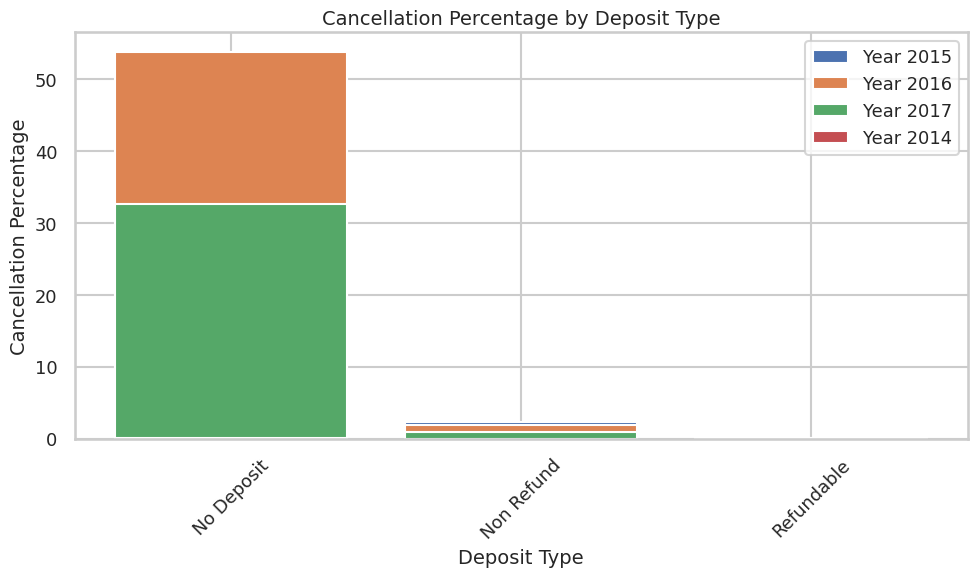

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
for year in df_cancel['reservation_year'].unique():
    data_year = cancellation_by_deptype.loc[year]
    plt.bar(data_year.index, data_year['percentage'], label=f'Year {year}')

plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Percentage')
plt.title('Cancellation Percentage by Deposit Type')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###INSIGHTS & SUMMARY
1. Cancellation by Guest Type: in 2015 - 2016 - 2017
- Couple = 10,19% - 48,79% - 30,02%
- Family = 0,52% - 6,92% - 3,49%

2. Cancellation by Stay time Period: 2015 - 2016 - 1=2017
- Weekend nights
  - 0 nights = 5,09% - 22,15% - 13,4%
  - 1 night = 2,77% - 15,75% - 9,57%
  - 2 nights = 2,62% - 16,20% - 9,90%
- Week Nights:
  the majority cancellation action are made on the 2-4 nights stays during week nights.

3. Cancellation by Special Request: 2015 - 2016 - 2017
(the more request are made, the more unlikely to be canceled)
- 0 requests = 6,78% - 36,53% - 19,50%
- 1 requests = 2,50% - 13,33% - 10,04%
- 2 requests = 1,28% - 4,91% - 3,35%

4. Cancellation By Meal request: 2015 - 2016 - 2017
- BB = 9,45% - 41,25% - 23,4%
- FB = 0,01% - 0 - 0
- HB = 0,88% - 2,57% - 1,73%
- SC = 0,27% - 11,90% - 8,57%

5. By Repeated Guests: 2015 - 2016 - 2017
- 0 (not repeated) = 10,14% - 55,40% - 33,28%
- 1 (repeated) = 0,56% - 0,32% - 0,23%

6. Cancellation by Previous Cancellation: 2015 - 2016 - 2017
- 0 (no previous) = 6,18% - 55,41% - 33,37%
- 1 (previous cancel) = 4,46% - 0,23% - 0,09%

7. Cancellation by Deposit Type: 2015 - 2016 - 2017
- No Deposit = 8,46% - 53,96% - 32,55%
- No Refundable = 2,50% - 1,95% - 0,19%
- Refundable = 0 - 0 - 0,06%

Summary:
- the more requests are made, the more unlikely to be canceled.
- most of the deposit type is no deposit
- mosty guests are not repeated guests or guest that are made previous cancel
- the longer time between booking date made status to arrival date, the more likely to be canceled.
- time takes for booking confirmation doesn't have correlation with cancellation action (instant confirmation are the most to be canceled)

##CANCELLATION BY WAITLIST & LEAD TIME

In [ ]:
df_cancel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16048 entries, 40061 to 117295
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           16048 non-null  object        
 1   is_canceled                     16048 non-null  int64         
 2   lead_time                       16048 non-null  int64         
 3   stays_in_weekend_nights         16048 non-null  int64         
 4   stays_in_week_nights            16048 non-null  int64         
 5   adults                          16048 non-null  int64         
 6   children                        16048 non-null  int64         
 7   babies                          16048 non-null  int64         
 8   meal                            16048 non-null  object        
 9   country                         16048 non-null  object        
 10  market_segment                  16048 non-null  object        
 1

In [ ]:
# cancellation by waiting list
cancellation_by_waitlist = df_cancel.groupby(['reservation_year','grp_waiting_list']).agg({
    'is_canceled': 'sum'
})

total_count_by_waitlist = df_cancel.groupby('grp_waiting_list').size().reset_index(name='total_count')

cancellation_by_waitlist['percentage'] = round((cancellation_by_waitlist['is_canceled'] / total_count) * 100, 2)

print(cancellation_by_waitlist)

                                   is_canceled  percentage
reservation_year grp_waiting_list                         
2014             0-1                        11       0.070
                 2-7                         0       0.000
                 8-30                        0       0.000
                 30+                         0       0.000
2015             0-1                      1649      10.280
                 2-7                         0       0.000
                 8-30                       13       0.080
                 30+                        56       0.350
2016             0-1                      8781      54.720
                 2-7                         6       0.040
                 8-30                       36       0.220
                 30+                       118       0.740
2017             0-1                      5329      33.210
                 2-7                         4       0.020
                 8-30                       21       0.1

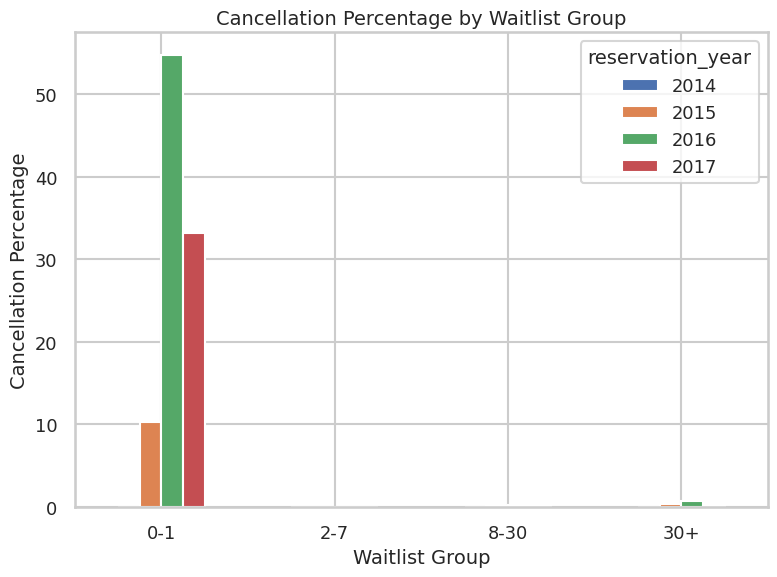

In [ ]:
pivot_table = cancellation_by_waitlist.pivot_table(index='grp_waiting_list', columns='reservation_year', values='percentage')

# Create a bar plot
ax = pivot_table.plot(kind='bar', figsize=(8, 6))
ax.set_xlabel('Waitlist Group')
ax.set_ylabel('Cancellation Percentage')
ax.set_title('Cancellation Percentage by Waitlist Group')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# cancellation by lead time
cancellation_by_leadtime = df_cancel.groupby(['reservation_year','grp_lead_time']).agg({
    'is_canceled': 'sum'
})

total_count_by_leadtime = df_cancel.groupby('grp_lead_time').size().reset_index(name='total_count')

cancellation_by_leadtime['percentage'] = round((cancellation_by_leadtime['is_canceled'] / total_count) * 100, 2)

print(cancellation_by_leadtime)

                                is_canceled  percentage
reservation_year grp_lead_time                         
2014             0-1                      0       0.000
                 2-7                      0       0.000
                 8-30                     0       0.000
                 31-90                    0       0.000
                 90+                     11       0.070
2015             0-1                     48       0.300
                 2-7                    157       0.980
                 8-30                   336       2.090
                 31-90                  431       2.690
                 90+                    674       4.200
2016             0-1                    110       0.690
                 2-7                    395       2.460
                 8-30                  1560       9.720
                 31-90                 2989      18.630
                 90+                   3865      24.080
2017             0-1                     60     

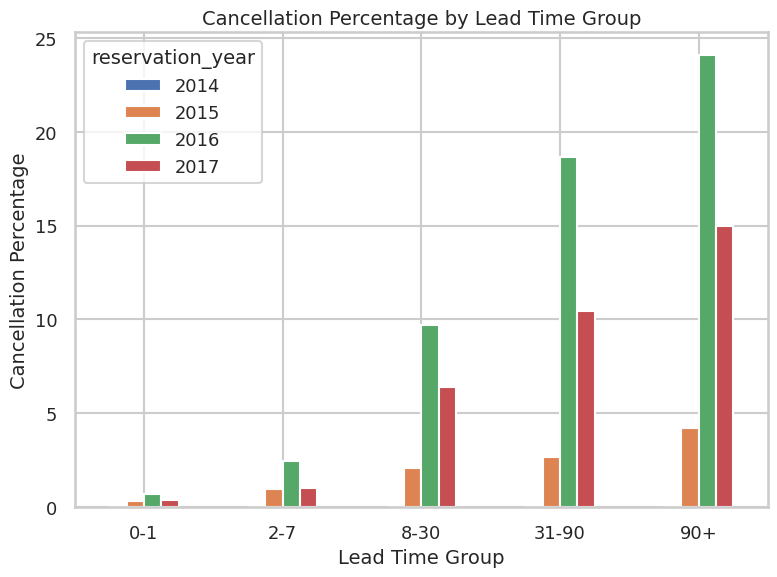

In [ ]:
pivot_table = cancellation_by_leadtime.pivot_table(index='grp_lead_time', columns='reservation_year', values='percentage')

# Create a bar plot
ax = pivot_table.plot(kind='bar', figsize=(8, 6))
ax.set_xlabel('Lead Time Group')
ax.set_ylabel('Cancellation Percentage')
ax.set_title('Cancellation Percentage by Lead Time Group')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

###INSIGHTS & SUMMARY
1. The longer days between booking date and arrival date (Lead Time), the more cancellation action are made.
- group (90-300 days) = 2015 (4,2%), 2016 (24%), 2017 (14,97%)
- group (30-90 days) = 2015 (2,69%), 2016 (18,63%), 2017 (10,46%)
- group (7-30 days) = 2015 (2%), 2016 (9,72%). 2017 (6,38%)
- group (1-7 days) = 2015 (0,98%), 2016 (2,46%). 2017 (1%)
- group (0-1 days) = 2015 (0,39%), 2016 (0,69%). 2017 (0,37%)
2. Instant Confirmation of booking status is the one which get the most Cancellation action:
- group (0-1 days) = 2015 (10,28%), 2016 (54,72%), 2017 (33,21%)
- group (1-7 days) = 2015 (0%), 2016 (0,04%), 2017 (0,02%)
- group (7-30 days) = 2015 (0%), 2016 (0,22%), 2017 (0,13%)
- group (30-700 days) = 2015 (0,35%), 2016 (0,74%), 2017 (0,15%)

##BY COMPARISSON VARIABLE

In [ ]:
#Comparison distribution channel - deposit type
distributin_deposit = df_cancel.groupby(['reservation_year','distribution_channel','deposit_type']).agg({
    'is_canceled' : ['sum'],

})
distributin_deposit

is_canceled
                                                           sum
reservation_year distribution_channel deposit_type            
2014             TA/TO                No Deposit            11
2015             Corporate            No Deposit            54
                                      Non Refund            10
                 Direct               No Deposit           149
                                      Non Refund             1
                 TA/TO                No Deposit          1150
                                      Non Refund           350
                 Undefined            No Deposit             4
2016             Corporate            No Deposit           151
                                      Non Refund            29
                                      Refundable             1
                 Direct               No Deposit           489
                                      Non Refund             9
                 GDS                  No Deposit            24
                 TA/TO                No Deposit          7963
                                      Non Refund           275
2017             Corporate            No Deposit            83
                                      Non Refund             4
                 Direct               No Deposit           320
                                      Non Refund             4
                                      Refundable             1
                 GDS                  No Deposit            12
                 TA/TO                No Deposit          4808
                                      Non Refund           138
                                      Refundable             8

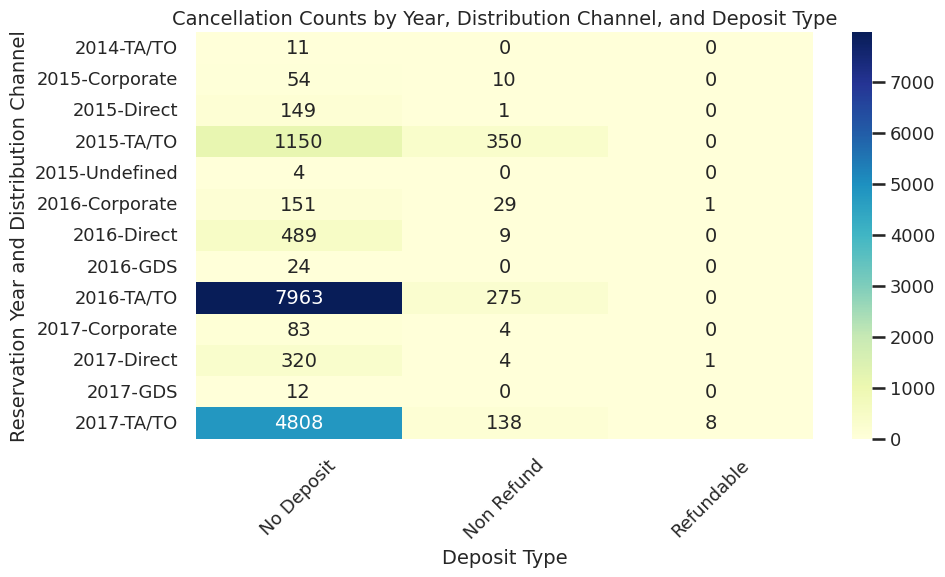

In [ ]:
distribution_deposit = df_cancel.groupby(['reservation_year', 'distribution_channel', 'deposit_type']).agg({
    'is_canceled': 'sum'
}).reset_index()

# Pivot the DataFrame for creating a heatmap
pivot_table = distribution_deposit.pivot_table(index=['reservation_year', 'distribution_channel'], columns='deposit_type', values='is_canceled', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Deposit Type')
plt.ylabel('Reservation Year and Distribution Channel')
plt.title('Cancellation Counts by Year, Distribution Channel, and Deposit Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Comparriosn distribution channel - deposit type
distributin_deposit = df_cancel.groupby(['distribution_channel','deposit_type']).agg({
    'is_canceled' : ['sum'],

})
distributin_deposit

is_canceled
                                          sum
distribution_channel deposit_type            
Corporate            No Deposit           288
                     Non Refund            43
                     Refundable             1
Direct               No Deposit           958
                     Non Refund            14
                     Refundable             1
GDS                  No Deposit            36
TA/TO                No Deposit         13932
                     Non Refund           763
                     Refundable             8
Undefined            No Deposit             4

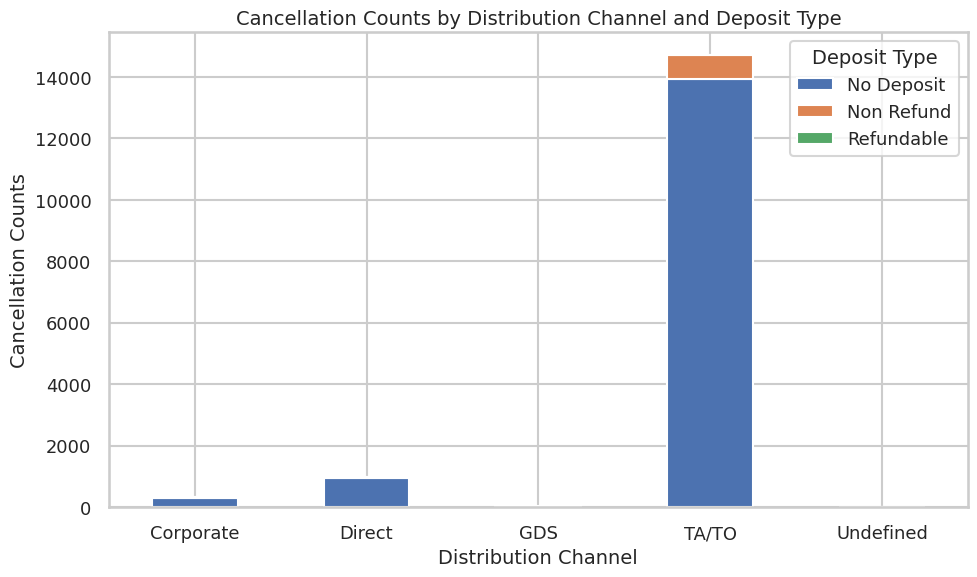

In [ ]:
distributin_deposit = df_cancel.groupby(['distribution_channel', 'deposit_type']).agg({
    'is_canceled': 'sum'
}).reset_index()

# Pivot the DataFrame for creating a stacked bar chart
pivot_table = distributin_deposit.pivot_table(index='distribution_channel', columns='deposit_type', values='is_canceled', fill_value=0)

# Create a stacked bar chart
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Distribution Channel')
ax.set_ylabel('Cancellation Counts')
ax.set_title('Cancellation Counts by Distribution Channel and Deposit Type')
ax.legend(title='Deposit Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#Comparriosn market segment - deposit type
market_deposit = df_cancel.groupby(['reservation_year','market_segment','deposit_type']).agg({
    'is_canceled' : ['sum'],

})
market_deposit

is_canceled
                                                     sum
reservation_year market_segment deposit_type            
2014             Groups         No Deposit            11
2015             Complementary  No Deposit            13
                 Corporate      No Deposit            50
                                Non Refund             7
                 Direct         No Deposit           137
                 Groups         No Deposit           161
                                Non Refund           275
                 Offline TA/TO  No Deposit           203
                                Non Refund            79
                 Online TA      No Deposit           791
                 Undefined      No Deposit             2
2016             Aviation       No Deposit            24
                 Complementary  No Deposit            27
                 Corporate      No Deposit           122
                                Non Refund            26
                                Refundable             1
                 Direct         No Deposit           460
                                Non Refund             3
                 Groups         No Deposit           113
                                Non Refund           147
                 Offline TA/TO  No Deposit           523
                                Non Refund           131
                 Online TA      No Deposit          7358
                                Non Refund             6
2017             Aviation       No Deposit            21
                 Complementary  No Deposit            17
                 Corporate      No Deposit            53
                                Non Refund             5
                 Direct         No Deposit           307
                                Non Refund             4
                                Refundable             1
                 Groups         No Deposit           106
                                Non Refund            77
                 Offline TA/TO  No Deposit           266
                                Non Refund            58
                 Online TA      No Deposit          4453
                                Non Refund             2
                                Refundable             8

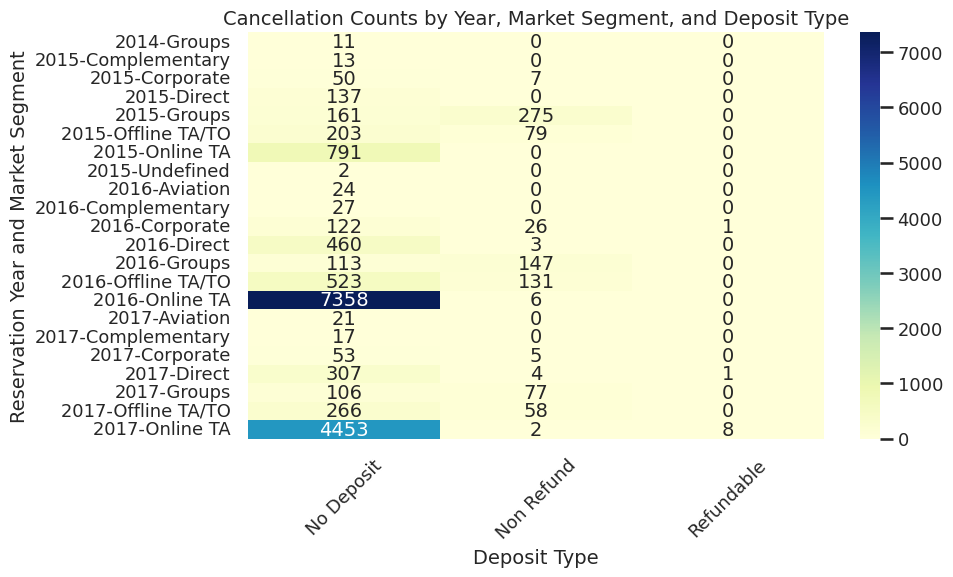

In [ ]:
market_deposit = df_cancel.groupby(['reservation_year', 'market_segment', 'deposit_type']).agg({
    'is_canceled': 'sum'
}).reset_index()

# Pivot the DataFrame for creating a heatmap
pivot_table = market_deposit.pivot_table(index=['reservation_year', 'market_segment'], columns='deposit_type', values='is_canceled', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Deposit Type')
plt.ylabel('Reservation Year and Market Segment')
plt.title('Cancellation Counts by Year, Market Segment, and Deposit Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Comparriosn market segment - deposit type
market_deposit = df_cancel.groupby(['market_segment','deposit_type']).agg({
    'is_canceled' : ['sum'],

})
market_deposit

is_canceled
                                    sum
market_segment deposit_type            
Aviation       No Deposit            45
Complementary  No Deposit            57
Corporate      No Deposit           225
               Non Refund            38
               Refundable             1
Direct         No Deposit           904
               Non Refund             7
               Refundable             1
Groups         No Deposit           391
               Non Refund           499
Offline TA/TO  No Deposit           992
               Non Refund           268
Online TA      No Deposit         12602
               Non Refund             8
               Refundable             8
Undefined      No Deposit             2

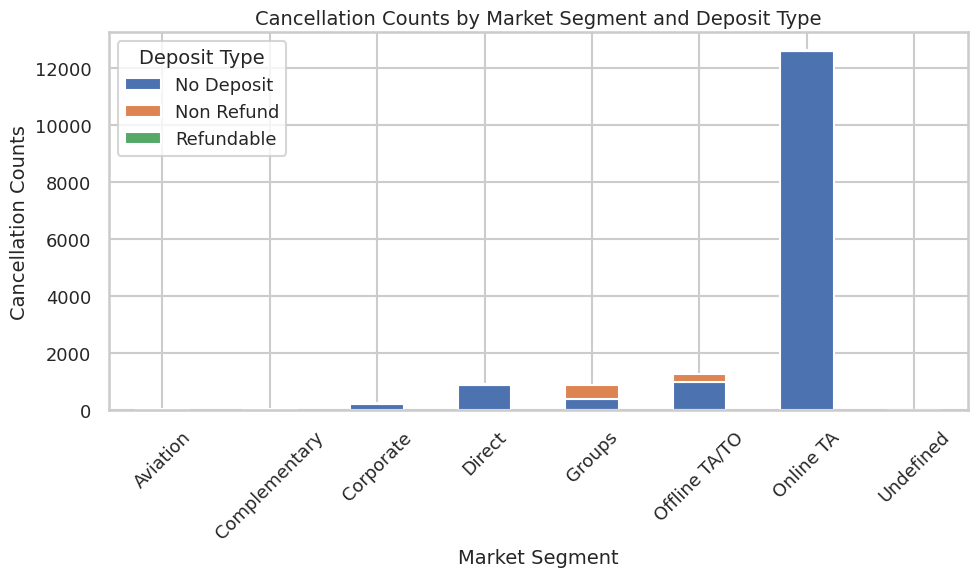

In [ ]:
market_deposit = df_cancel.groupby(['market_segment', 'deposit_type']).agg({
    'is_canceled': 'sum'
}).reset_index()

# Pivot the DataFrame for creating a stacked bar chart
pivot_table = market_deposit.pivot_table(index='market_segment', columns='deposit_type', values='is_canceled', fill_value=0)

# Create a stacked bar chart
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Market Segment')
ax.set_ylabel('Cancellation Counts')
ax.set_title('Cancellation Counts by Market Segment and Deposit Type')
ax.legend(title='Deposit Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Comparriosn distribution channel - market segment
market_distribution = df_cancel.groupby(['reservation_year','market_segment','distribution_channel']).agg({
    'is_canceled' : ['sum'],

})
market_distribution

is_canceled
                                                             sum
reservation_year market_segment distribution_channel            
2014             Groups         TA/TO                         11
2015             Complementary  Direct                        12
                                TA/TO                          1
                 Corporate      Corporate                     56
                                Direct                         1
                 Direct         Direct                       136
                                Undefined                      1
                 Groups         Corporate                      6
                                Direct                         1
                                TA/TO                        429
                 Offline TA/TO  TA/TO                        282
                 Online TA      Corporate                      2
                                TA/TO                        788
                                Undefined                      1
                 Undefined      Undefined                      2
2016             Aviation       Corporate                     24
                 Complementary  Corporate                      9
                                Direct                        18
                 Corporate      Corporate                    135
                                Direct                         2
                                TA/TO                         12
                 Direct         Direct                       462
                                TA/TO                          1
                 Groups         Corporate                      3
                                Direct                        13
                                TA/TO                        244
                 Offline TA/TO  Corporate                      6
                                Direct                         1
                                GDS                            6
                                TA/TO                        641
                 Online TA      Corporate                      4
                                Direct                         2
                                GDS                           18
                                TA/TO                       7340
2017             Aviation       Corporate                     20
                                TA/TO                          1
                 Complementary  Corporate                      3
                                Direct                        14
                 Corporate      Corporate                     54
                                TA/TO                          4
                 Direct         Corporate                      3
                                Direct                       309
                 Groups         Corporate                      7
                                Direct                         1
                                TA/TO                        175
                 Offline TA/TO  GDS                            2
                                TA/TO                        322
                 Online TA      Direct                         1
                                GDS                           10
                                TA/TO                       4452

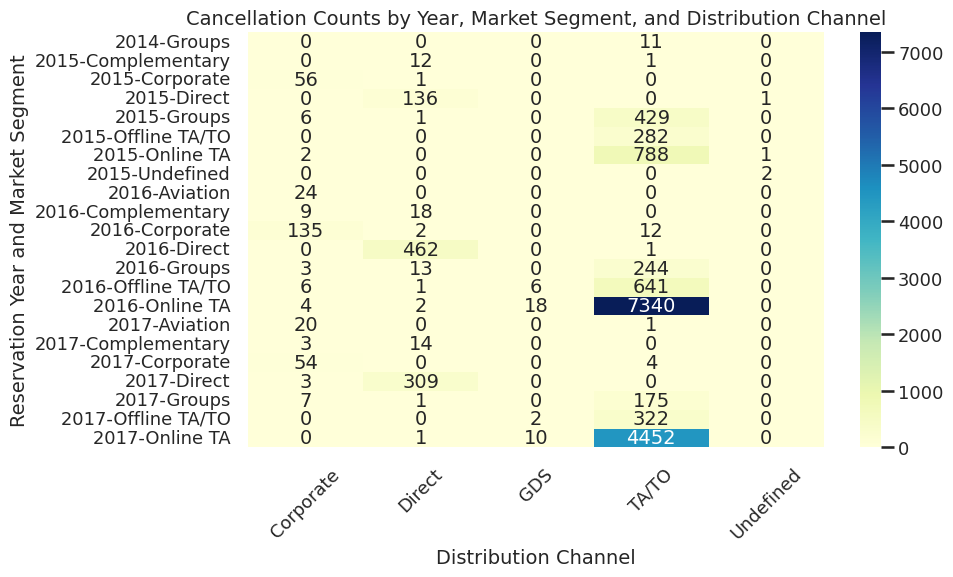

In [ ]:
market_distribution = df_cancel.groupby(['reservation_year', 'market_segment', 'distribution_channel']).agg({
    'is_canceled': 'sum'
}).reset_index()

# Pivot the DataFrame for creating a heatmap
pivot_table = market_distribution.pivot_table(index=['reservation_year', 'market_segment'], columns='distribution_channel', values='is_canceled', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Distribution Channel')
plt.ylabel('Reservation Year and Market Segment')
plt.title('Cancellation Counts by Year, Market Segment, and Distribution Channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Comparriosn market segment and distribution channel
market_distribution = df_cancel.groupby(['market_segment','distribution_channel']).agg({
    'is_canceled' : ['sum'],

})
market_distribution

is_canceled
                                            sum
market_segment distribution_channel            
Aviation       Corporate                     44
               TA/TO                          1
Complementary  Corporate                     12
               Direct                        44
               TA/TO                          1
Corporate      Corporate                    245
               Direct                         3
               TA/TO                         16
Direct         Corporate                      3
               Direct                       907
               TA/TO                          1
               Undefined                      1
Groups         Corporate                     16
               Direct                        15
               TA/TO                        859
Offline TA/TO  Corporate                      6
               Direct                         1
               GDS                            8
               TA/TO                       1245
Online TA      Corporate                      6
               Direct                         3
               GDS                           28
               TA/TO                      12580
               Undefined                      1
Undefined      Undefined                      2

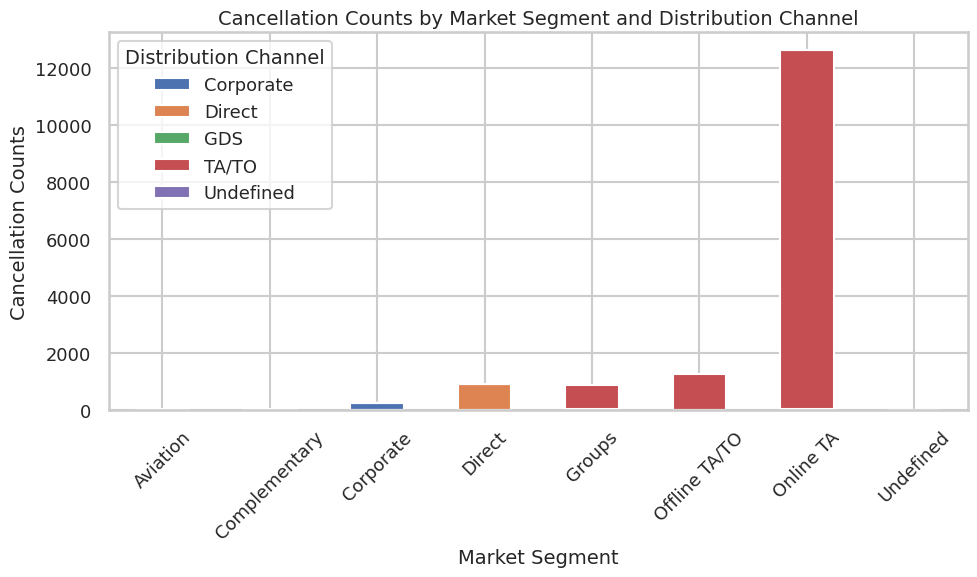

In [ ]:
market_distribution = df_cancel.groupby(['market_segment', 'distribution_channel']).agg({
    'is_canceled': 'sum'
}).reset_index()

# Pivot the DataFrame for creating a stacked bar chart
pivot_table = market_distribution.pivot_table(index='market_segment', columns='distribution_channel', values='is_canceled', fill_value=0)

# Create a stacked bar chart
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Market Segment')
ax.set_ylabel('Cancellation Counts')
ax.set_title('Cancellation Counts by Market Segment and Distribution Channel')
ax.legend(title='Distribution Channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Comparriosn guest type and distribution channel
guest_distribution = df_cancel.groupby(['reservation_year','guests_type','distribution_channel']).agg({
    'is_canceled' : ['sum'],

})
guest_distribution

is_canceled
                                                          sum
reservation_year guests_type distribution_channel            
2014             couple      TA/TO                         11
2015             couple      Corporate                     64
                             Direct                       135
                             TA/TO                       1432
                             Undefined                      4
                 family      Direct                        15
                             TA/TO                         68
2016             couple      Corporate                    180
                             Direct                       426
                             GDS                           24
                             TA/TO                       7200
                 family      Corporate                      1
                             Direct                        72
                             TA/TO                       1038
2017             couple      Corporate                     86
                             Direct                       287
                             GDS                           12
                             TA/TO                       4433
                 family      Corporate                      1
                             Direct                        38
                             TA/TO                        521

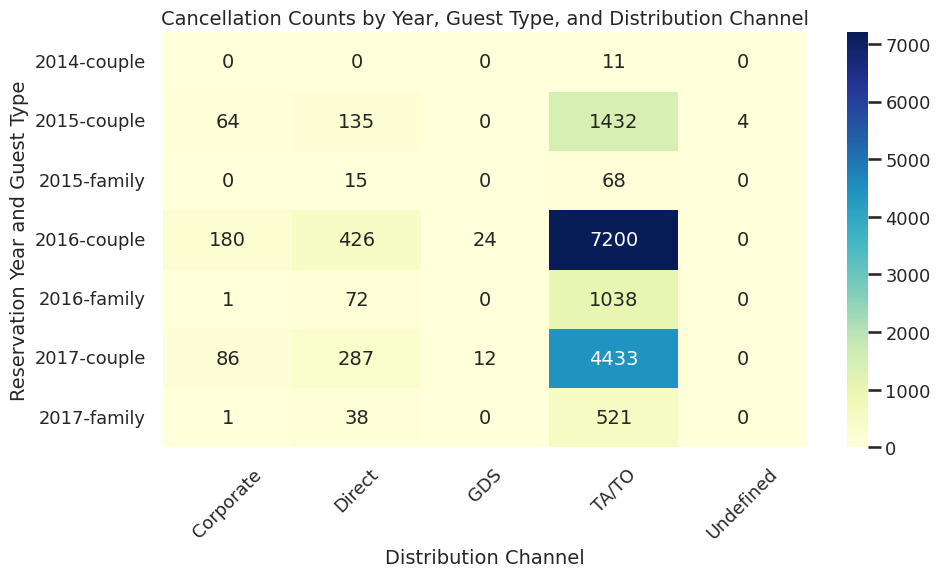

In [ ]:
guest_distribution = df_cancel.groupby(['reservation_year', 'guests_type', 'distribution_channel']).agg({
    'is_canceled': 'sum'
}).reset_index()

# Pivot the DataFrame for creating a heatmap
pivot_table = guest_distribution.pivot_table(index=['reservation_year', 'guests_type'], columns='distribution_channel', values='is_canceled', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Distribution Channel')
plt.ylabel('Reservation Year and Guest Type')
plt.title('Cancellation Counts by Year, Guest Type, and Distribution Channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Comparriosn guest type and distribution channel
guest_distribution = df_cancel.groupby(['guests_type','distribution_channel']).agg({
    'is_canceled' : ['sum'],

})
guest_distribution

is_canceled
                                         sum
guests_type distribution_channel            
couple      Corporate                    330
            Direct                       848
            GDS                           36
            TA/TO                      13076
            Undefined                      4
family      Corporate                      2
            Direct                       125
            TA/TO                       1627

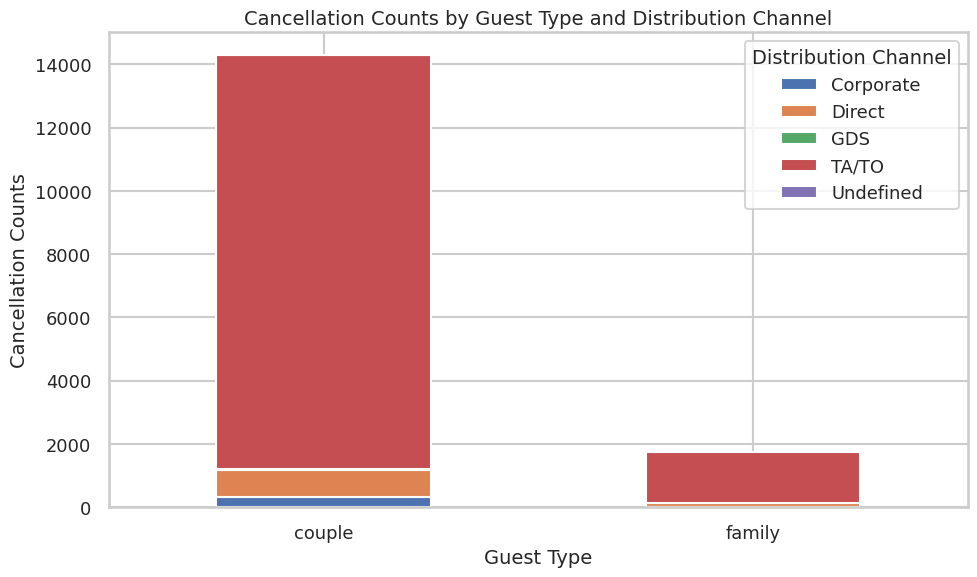

In [ ]:
guest_distribution = df_cancel.groupby(['guests_type', 'distribution_channel']).agg({
    'is_canceled': 'sum'
}).reset_index()

# Pivot the DataFrame for creating a stacked bar chart
pivot_table = guest_distribution.pivot_table(index='guests_type', columns='distribution_channel', values='is_canceled', fill_value=0)

# Create a stacked bar chart
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Guest Type')
ax.set_ylabel('Cancellation Counts')
ax.set_title('Cancellation Counts by Guest Type and Distribution Channel')
ax.legend(title='Distribution Channel')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#Comparrison by guest type - lead time
guest_leadtime = df_cancel.groupby(['reservation_year','guests_type','grp_lead_time']).agg({
    'is_canceled' : ['sum'],

})
guest_leadtime

is_canceled
                                                   sum
reservation_year guests_type grp_lead_time            
2014             couple      0-1                     0
                             2-7                     0
                             8-30                    0
                             31-90                   0
                             90+                    11
                 family      0-1                     0
                             2-7                     0
                             8-30                    0
                             31-90                   0
                             90+                     0
2015             couple      0-1                    47
                             2-7                   146
                             8-30                  306
                             31-90                 405
                             90+                   659
                 family      0-1                     1
                             2-7                    11
                             8-30                   30
                             31-90                  26
                             90+                    15
2016             couple      0-1                   102
                             2-7                   363
                             8-30                 1394
                             31-90                2593
                             90+                  3356
                 family      0-1                     8
                             2-7                    32
                             8-30                  166
                             31-90                 396
                             90+                   509
2017             couple      0-1                    58
                             2-7                   148
                             8-30                  938
                             31-90                1508
                             90+                  2113
                 family      0-1                     2
                             2-7                    12
                             8-30                   86
                             31-90                 171
                             90+                   289

In [ ]:
#Comparrison by guest type - lead time
guest_leadtime = df_cancel.groupby(['guests_type','grp_lead_time']).agg({
    'is_canceled' : ['sum'],

})
guest_leadtime

is_canceled
                                  sum
guests_type grp_lead_time            
couple      0-1                   207
            2-7                   657
            8-30                 2638
            31-90                4506
            90+                  6139
family      0-1                    11
            2-7                    55
            8-30                  282
            31-90                 593
            90+                   813

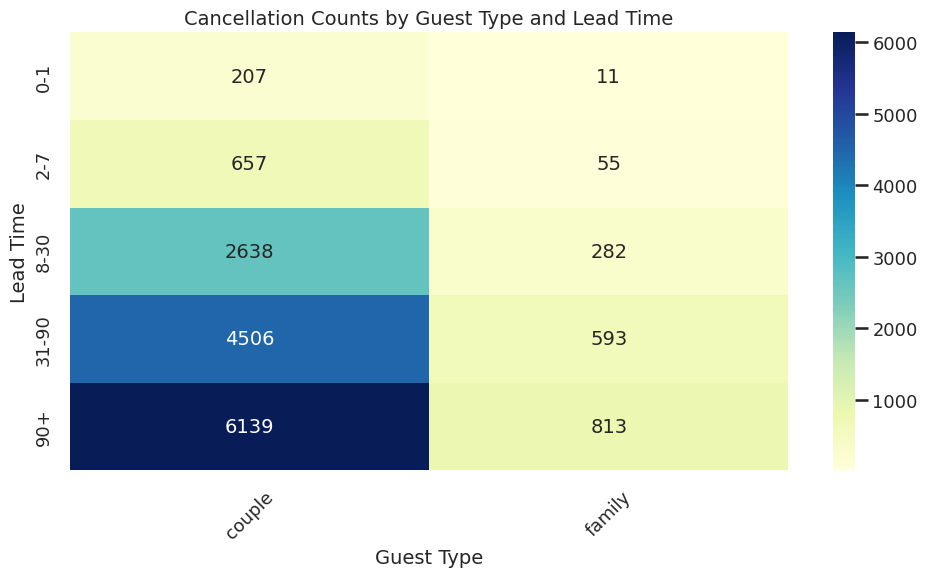

In [ ]:
guest_leadtime = df_cancel.groupby(['guests_type', 'grp_lead_time']).agg({
    'is_canceled': 'sum'
}).reset_index()

# Pivot the DataFrame for creating a heatmap
pivot_table = guest_leadtime.pivot_table(index='grp_lead_time', columns='guests_type', values='is_canceled', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Guest Type')
plt.ylabel('Lead Time')
plt.title('Cancellation Counts by Guest Type and Lead Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Comparrison by guest type - waiting list
guest_waitinglist = df_cancel.groupby(['reservation_year','guests_type','grp_waiting_list']).agg({
    'is_canceled' : ['sum'],

})
guest_waitinglist

is_canceled
                                                      sum
reservation_year guests_type grp_waiting_list            
2014             couple      0-1                       11
                             2-7                        0
                             8-30                       0
                             30+                        0
                 family      0-1                        0
                             2-7                        0
                             8-30                       0
                             30+                        0
2015             couple      0-1                     1567
                             2-7                        0
                             8-30                      13
                             30+                       55
                 family      0-1                       82
                             2-7                        0
                             8-30                       0
                             30+                        1
2016             couple      0-1                     7671
                             2-7                        5
                             8-30                      36
                             30+                      118
                 family      0-1                     1110
                             2-7                        1
                             8-30                       0
                             30+                        0
2017             couple      0-1                     4769
                             2-7                        4
                             8-30                      21
                             30+                       24
                 family      0-1                      560
                             2-7                        0
                             8-30                       0
                             30+                        0

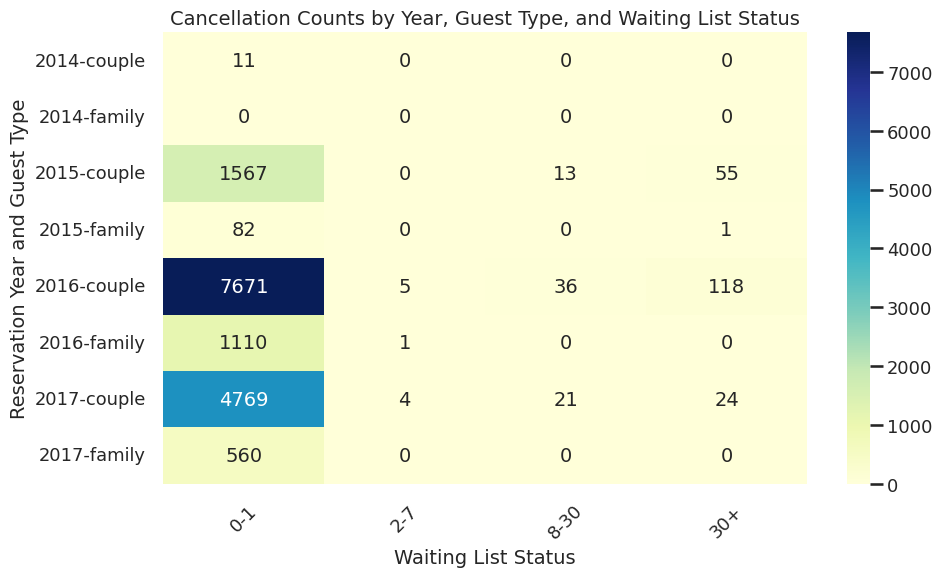

In [ ]:
guest_waitinglist = df_cancel.groupby(['reservation_year', 'guests_type', 'grp_waiting_list']).agg({
    'is_canceled': 'sum'
}).reset_index()

# Pivot the DataFrame for creating a heatmap
pivot_table = guest_waitinglist.pivot_table(index=['reservation_year', 'guests_type'], columns='grp_waiting_list', values='is_canceled', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Waiting List Status')
plt.ylabel('Reservation Year and Guest Type')
plt.title('Cancellation Counts by Year, Guest Type, and Waiting List Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Comparrison by guest type - waiting list
guest_waitinglist = df_cancel.groupby(['guests_type','grp_waiting_list']).agg({
    'is_canceled' : ['sum'],

})
guest_waitinglist

is_canceled
                                     sum
guests_type grp_waiting_list            
couple      0-1                    14018
            2-7                        9
            8-30                      70
            30+                      197
family      0-1                     1752
            2-7                        1
            8-30                       0
            30+                        1

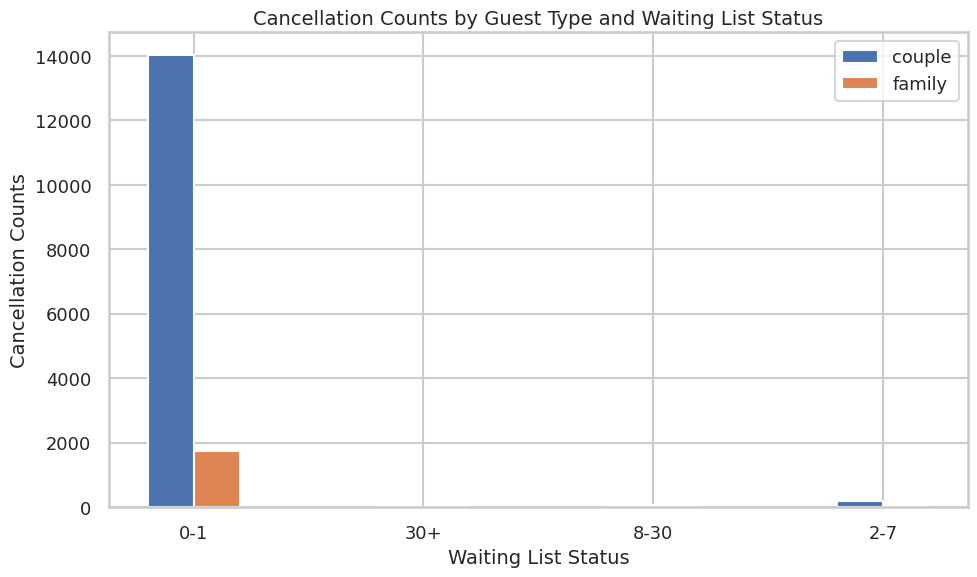

In [ ]:
guest_waitinglist = df_cancel.groupby(['guests_type', 'grp_waiting_list']).agg({
    'is_canceled': 'sum'
}).reset_index()

# Create a grouped bar chart
guest_types = df_cancel['guests_type'].unique()
waiting_list_statuses = df_cancel['grp_waiting_list'].unique()

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
x_positions = range(len(waiting_list_statuses))

for i, guest_type in enumerate(guest_types):
    guest_type_data = guest_waitinglist[guest_waitinglist['guests_type'] == guest_type]
    cancel_counts = guest_type_data['is_canceled']
    ax.bar(
        [pos + i * bar_width for pos in x_positions],
        cancel_counts,
        width=bar_width,
        label=guest_type
    )

ax.set_xlabel('Waiting List Status')
ax.set_ylabel('Cancellation Counts')
ax.set_title('Cancellation Counts by Guest Type and Waiting List Status')
ax.set_xticks([pos + 0.5 * (len(guest_types) - 1) * bar_width for pos in x_positions])
ax.set_xticklabels(waiting_list_statuses)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
#Comparrison by guest type - lead time -wait list
guest_leadtime_waitlist = df_cancel.groupby(['guests_type','grp_lead_time','grp_waiting_list']).agg({
    'is_canceled' : ['sum'],

})
guest_leadtime_waitlist

is_canceled
                                                   sum
guests_type grp_lead_time grp_waiting_list            
couple      0-1           0-1                      207
                          2-7                        0
                          8-30                       0
                          30+                        0
            2-7           0-1                      656
                          2-7                        1
                          8-30                       0
                          30+                        0
            8-30          0-1                     2632
                          2-7                        2
                          8-30                       4
                          30+                        0
            31-90         0-1                     4472
                          2-7                        5
                          8-30                      18
                          30+                       11
            90+           0-1                     5915
                          2-7                        1
                          8-30                      48
                          30+                      175
family      0-1           0-1                       11
                          2-7                        0
                          8-30                       0
                          30+                        0
            2-7           0-1                       55
                          2-7                        0
                          8-30                       0
                          30+                        0
            8-30          0-1                      282
                          2-7                        0
                          8-30                       0
                          30+                        0
            31-90         0-1                      592
                          2-7                        1
                          8-30                       0
                          30+                        0
            90+           0-1                      812
                          2-7                        0
                          8-30                       0
                          30+                        1

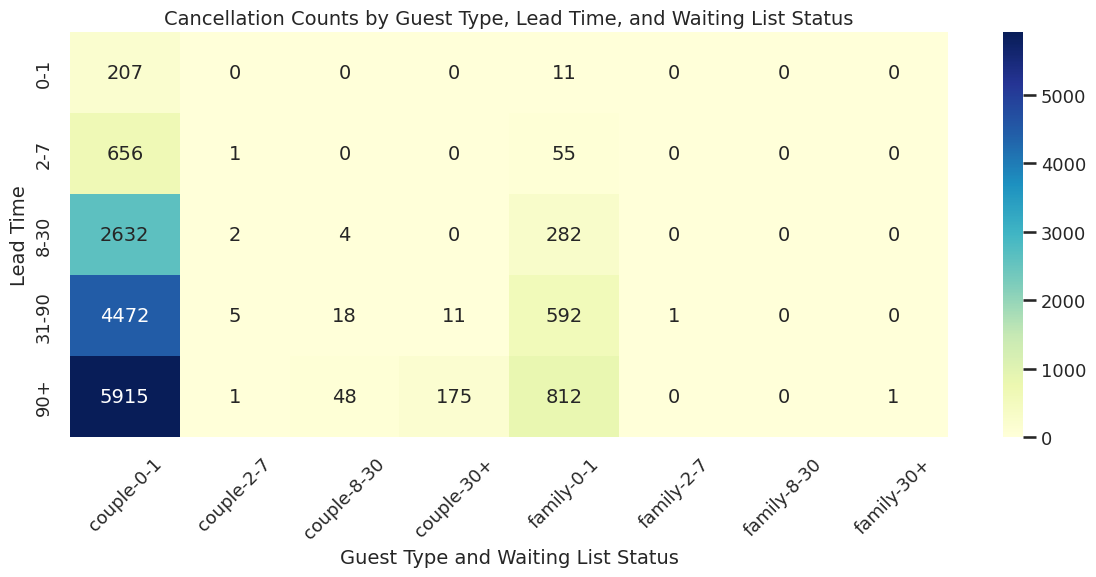

In [ ]:
guest_leadtime_waitlist = df_cancel.groupby(['guests_type', 'grp_lead_time', 'grp_waiting_list']).agg({
    'is_canceled': 'sum'
}).reset_index()

# Pivot the DataFrame for creating a heatmap
pivot_table = guest_leadtime_waitlist.pivot_table(index='grp_lead_time', columns=['guests_type', 'grp_waiting_list'], values='is_canceled', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Guest Type and Waiting List Status')
plt.ylabel('Lead Time')
plt.title('Cancellation Counts by Guest Type, Lead Time, and Waiting List Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Comparrison by lead time - waiting list
leadtime_waitlist = df_cancel.groupby(['grp_lead_time','grp_waiting_list']).agg({
    'is_canceled' : ['sum'],

})
leadtime_waitlist

is_canceled
                                       sum
grp_lead_time grp_waiting_list            
0-1           0-1                      218
              2-7                        0
              8-30                       0
              30+                        0
2-7           0-1                      711
              2-7                        1
              8-30                       0
              30+                        0
8-30          0-1                     2914
              2-7                        2
              8-30                       4
              30+                        0
31-90         0-1                     5064
              2-7                        6
              8-30                      18
              30+                       11
90+           0-1                     6727
              2-7                        1
              8-30                      48
              30+                      176

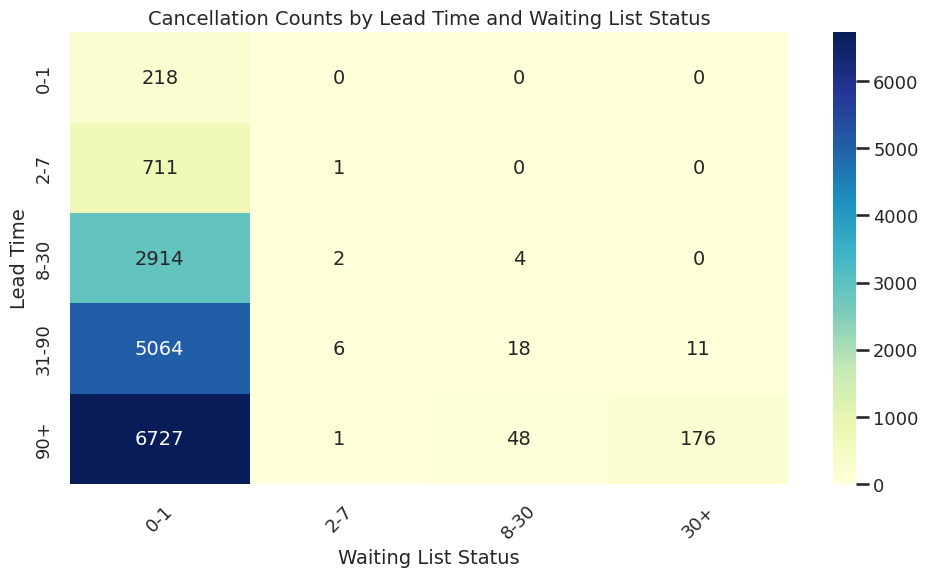

In [ ]:
leadtime_waitlist = df_cancel.groupby(['grp_lead_time', 'grp_waiting_list']).agg({
    'is_canceled': 'sum'
}).reset_index()

# Pivot the DataFrame for creating a heatmap
pivot_table = leadtime_waitlist.pivot_table(index='grp_lead_time', columns='grp_waiting_list', values='is_canceled', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Waiting List Status')
plt.ylabel('Lead Time')
plt.title('Cancellation Counts by Lead Time and Waiting List Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


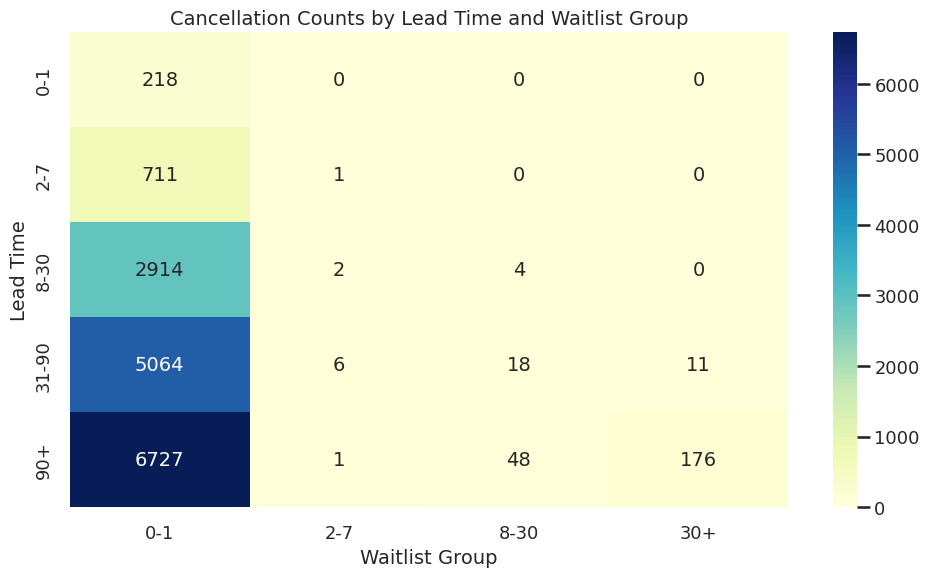

In [ ]:
leadtime_waitlist = df_cancel.groupby(['grp_lead_time', 'grp_waiting_list']).agg({
    'is_canceled': 'sum'
}).reset_index()

# Pivot the DataFrame for creating a heatmap
pivot_table = leadtime_waitlist.pivot_table(index='grp_lead_time', columns='grp_waiting_list', values='is_canceled', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Waitlist Group')
plt.ylabel('Lead Time')
plt.title('Cancellation Counts by Lead Time and Waitlist Group')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#Comparrison by guest type - distribution channel - lead time
guest_distribution_leadtime = df_cancel.groupby(['guests_type','distribution_channel','grp_lead_time']).agg({
    'is_canceled' : ['sum'],

})
guest_distribution_leadtime

is_canceled
                                                       sum
guests_type distribution_channel grp_lead_time            
couple      Corporate            0-1                    29
                                 2-7                   116
                                 8-30                  104
                                 31-90                  53
                                 90+                    28
            Direct               0-1                   102
                                 2-7                   123
                                 8-30                  199
                                 31-90                 217
                                 90+                   207
            GDS                  0-1                     0
                                 2-7                     7
                                 8-30                   15
                                 31-90                  11
                                 90+                     3
            TA/TO                0-1                    76
                                 2-7                   408
                                 8-30                 2319
                                 31-90                4225
                                 90+                  5901
            Undefined            0-1                     0
                                 2-7                     3
                                 8-30                    1
                                 31-90                   0
                                 90+                     0
family      Corporate            0-1                     0
                                 2-7                     0
                                 8-30                    1
                                 31-90                   1
                                 90+                     0
            Direct               0-1                     4
                                 2-7                    10
                                 8-30                   26
                                 31-90                  45
                                 90+                    40
            GDS                  0-1                     0
                                 2-7                     0
                                 8-30                    0
                                 31-90                   0
                                 90+                     0
            TA/TO                0-1                     7
                                 2-7                    45
                                 8-30                  255
                                 31-90                 547
                                 90+                   773
            Undefined            0-1                     0
                                 2-7                     0
                                 8-30                    0
                                 31-90                   0
                                 90+                     0

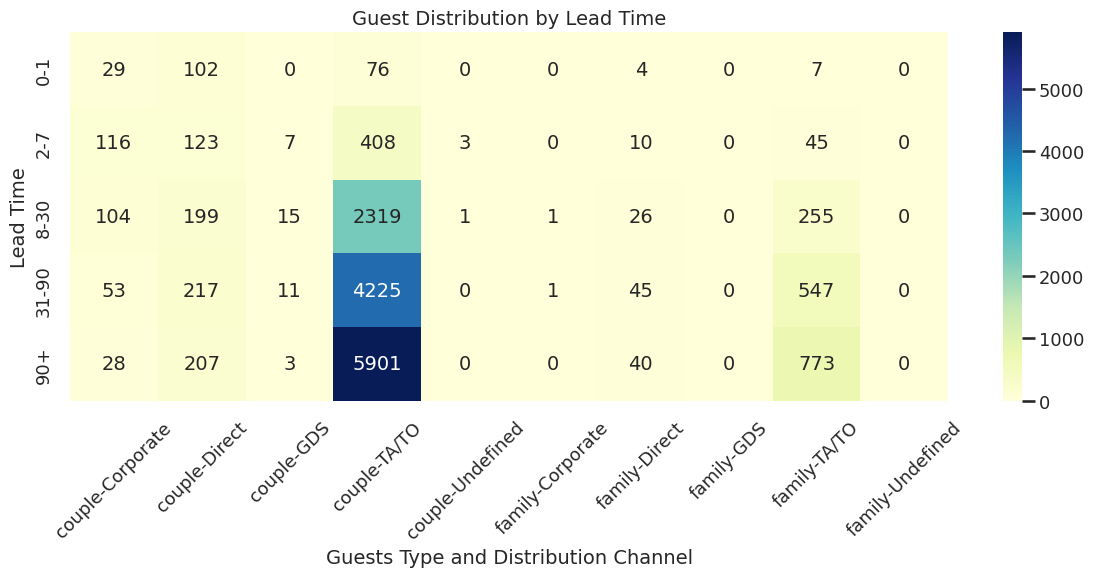

In [ ]:
guest_distribution_leadtime = df_cancel.groupby(['guests_type', 'distribution_channel', 'grp_lead_time']).agg({
    'is_canceled': 'sum'
}).reset_index()

# Pivot the DataFrame for creating a heatmap
pivot_table = guest_distribution_leadtime.pivot_table(index='grp_lead_time', columns=['guests_type', 'distribution_channel'], values='is_canceled', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('Guests Type and Distribution Channel')
plt.ylabel('Lead Time')
plt.title('Guest Distribution by Lead Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##ADR

In [ ]:
#ADR by year
average_daily_rate = df_cancel.groupby(['reservation_year','reservation_month']).agg({
    'adr' : ['mean'],

})
average_daily_rate

adr
                                      mean
reservation_year reservation_month        
2014             10                 62.800
2015             1                  62.402
                 2                  80.750
                 3                  72.559
                 4                  77.876
                 5                  71.847
                 6                  74.780
                 7                  71.903
                 8                  91.940
                 9                 108.325
                 10                 83.710
                 11                 82.721
                 12                 89.559
2016             1                  88.193
                 2                 100.587
                 3                 111.430
                 4                 119.743
                 5                 121.965
                 6                 124.234
                 7                 128.170
                 8                 121.245
                 9                 124.518
                 10                114.075
                 11                103.967
                 12                105.675
2017             1                 115.802
                 2                 120.439
                 3                 132.084
                 4                 144.999
                 5                 145.080
                 6                 139.763
                 7                 147.158
                 8                 138.811

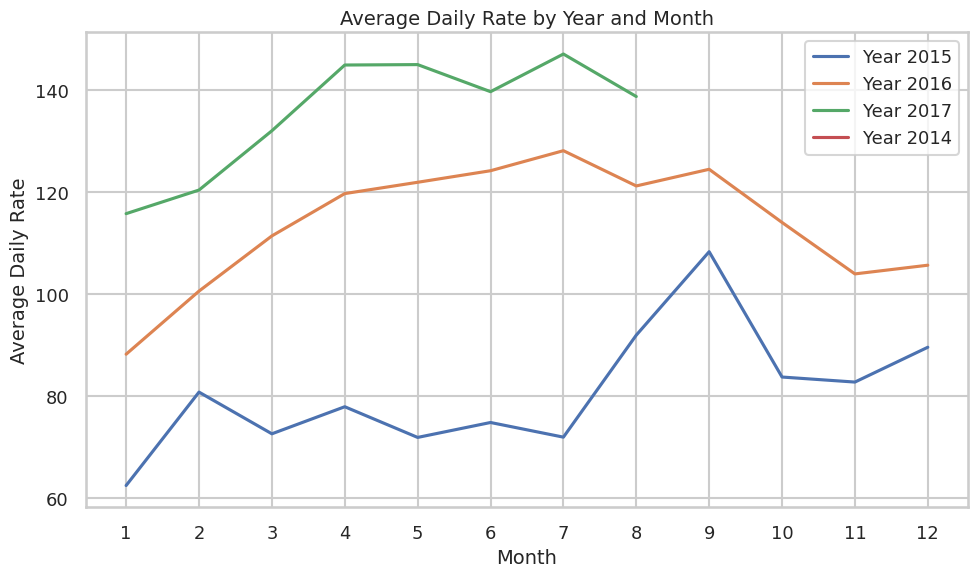

In [ ]:
# Create a line plot
average_daily_rate = df_cancel.groupby(['reservation_year','reservation_month']).agg({
    'adr' : ['mean'],

}).reset_index()
plt.figure(figsize=(10, 6))
for year in df_cancel['reservation_year'].unique():
    year_data = average_daily_rate[average_daily_rate['reservation_year'] == year]
    plt.plot(year_data['reservation_month'], year_data['adr'], label=f'Year {year}')

plt.xlabel('Month')
plt.ylabel('Average Daily Rate')
plt.title('Average Daily Rate by Year and Month')
plt.legend()
plt.xticks(range(1, 13))  # Assuming months are from 1 to 12
plt.tight_layout()
plt.show()

In [ ]:
#Comparison ADR - guest type
average_daily_rate = df_cancel.groupby(['reservation_year','guests_type']).agg({
    'adr' : ['mean'],

})
average_daily_rate

adr
                                mean
reservation_year guests_type        
2014             couple       62.800
2015             couple       84.874
                 family      125.217
2016             couple      108.366
                 family      148.306
2017             couple      127.746
                 family      175.299

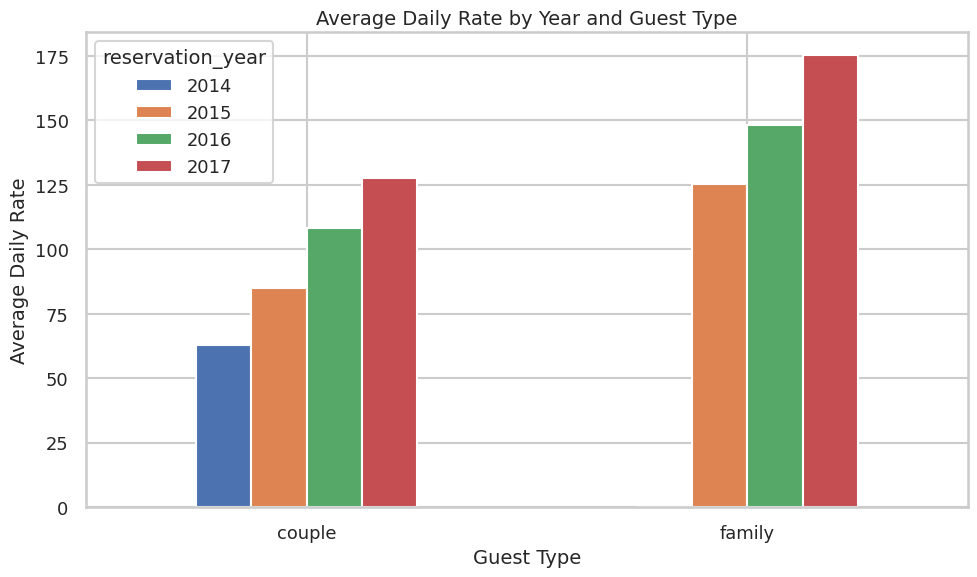

In [ ]:
average_daily_rate = df_cancel.groupby(['reservation_year', 'guests_type']).agg({
    'adr': 'mean'
}).reset_index()

# Pivot the DataFrame for easier plotting
pivot_table = average_daily_rate.pivot_table(index='guests_type', columns='reservation_year', values='adr')

# Create a bar plot
ax = pivot_table.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Guest Type')
ax.set_ylabel('Average Daily Rate')
ax.set_title('Average Daily Rate by Year and Guest Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


###SUMMARY & INSIGHTS:
1. Cancellation by top 10 countries: Portugal, France, Great Britain, SPain, Italy, Germany, Brasil, USA, CHina, Belgium
2. Cancellation happens mostly in the booking with lead time more than 1 month (30 days)
3. Cancellation happens mostly in the waiting list day: from group 0-1 (instant confirmation/approval)
4. Cancellation by market segment: made by Online TA, around 30% per year.
5. Cancellation by distribution channel: made by TO/TA, around 39-44% per year.
6. Cancellation by Distribution Channel - Deposit Type (No Deposit - No Refund - Renfundable):
 TO/TA = (13.932 - 763 -8)
 Direct = (950 - 14 - 1)
 Corporate = (288 - 43 - 1)
7. Cancellation by Market Segment - Deposit Type (No Deposit - No Refund - Renfundable):
  Online TA = (12.602 - 8 - 8)
  Offline TO/TA = (992 - 268 - 0)
  Direct = (904 - 7 - 1)
  Group = (391 - 499 - 0)
8.Cancellation by Market Segmenet - DIstribution Channel:
  most cancellation made by: Online TA, TO/TA, for market segment.
9. Cancellation by Guest Type and Distribution Channel:
- Couple: TA/TO (13.076), Direct (848), Corporate (330)
- Family: TA/TO (1.627), Direct (125)
10. Cancellation by GUest Type and Lead Time:
- Group (0-1) = couple (267), Family (11)
- Group (1-7) = couple (657), Family (55)
- Group (7-30) = Couple (2.635), Family (262)
- Group (30-90) = Coouple (4.506), Family (593)
- Group (90-400) = Couple (6.139), Family (813)
11. Cancellation by Guest Type - waiting List:
- Group (0-1)= Couple (14.018), Family (1.752)
- Group (1-7) = Couple (9), Family (1)
- Group (7-30)= COuple (70), Family (0)
- Group (30-700)= Couple (97), Family (1)
12. Cancellation by Distribution Channel and Guest Type:
Couple booking made by TA/TO =
- group 0-1 = 36
- group 1-7 = 408
- group 7-30 = 2.319
- group 30-90 = 4.225
- group 90-400 = 5.401
13. Cancellation by Average Daily Rate and Guest Type:
2014 = couple 62, fam -
2015 = couple 84, fam = 125
2016 = couple 108, fam = 148
2017 = couple 127, fam = 175
ADR for family is higher than for couple

In [ ]:
#export df_cancel to csv
df_cancel.to_csv('/content/drive/My Drive/GFP_GROUP E/mydata2.csv', index=False)

#TREND

In [ ]:
df_trend = df_cl.copy()
df_trend

hotel  is_canceled  lead_time  stays_in_weekend_nights  \
40060   City Hotel            0          6                        0   
40061   City Hotel            1         88                        0   
40062   City Hotel            1         65                        0   
40063   City Hotel            1         92                        2   
40064   City Hotel            1        100                        0   
...            ...          ...        ...                      ...   
119385  City Hotel            0         23                        2   
119386  City Hotel            0        102                        2   
119387  City Hotel            0         34                        2   
119388  City Hotel            0        109                        2   
119389  City Hotel            0        205                        2   

        stays_in_week_nights  adults  children  babies meal country  ...  \
40060                      2       1         0       0   HB     PRT  ...   
40061                      4       2         0       0   BB     PRT  ...   
40062                      4       1         0       0   BB     PRT  ...   
40063                      4       2         0       0   BB     PRT  ...   
40064                      2       2         0       0   BB     PRT  ...   
...                      ...     ...       ...     ...  ...     ...  ...   
119385                     5       2         0       0   BB     BEL  ...   
119386                     5       3         0       0   BB     FRA  ...   
119387                     5       2         0       0   BB     DEU  ...   
119388                     5       2         0       0   BB     GBR  ...   
119389                     7       2         0       0   HB     DEU  ...   

       required_car_parking_spaces total_of_special_requests  \
40060                            0                         0   
40061                            0                         1   
40062                            0                         1   
40063                            0                         2   
40064                            0                         1   
...                            ...                       ...   
119385                           0                         0   
119386                           0                         2   
119387                           0                         4   
119388                           0                         0   
119389                           0                         2   

        reservation_status  reservation_status_date  arrival_date  \
40060            Check-Out               2015-07-03    2015-07-01   
40061             Canceled               2015-07-01    2015-07-01   
40062             Canceled               2015-04-30    2015-07-01   
40063             Canceled               2015-06-23    2015-07-01   
40064             Canceled               2015-04-02    2015-07-02   
...                    ...                      ...           ...   
119385           Check-Out               2017-09-06    2017-08-30   
119386           Check-Out               2017-09-07    2017-08-31   
119387           Check-Out               2017-09-07    2017-08-31   
119388           Check-Out               2017-09-07    2017-08-31   
119389           Check-Out               2017-09-07    2017-08-29   

       reservation_year reservation_month  guests_type grp_waiting_list  \
40060              2015                 7       couple           [0, 1)   
40061              2015                 7       couple           [0, 1)   
40062              2015                 4       couple           [0, 1)   
40063              2015                 6       couple           [0, 1)   
40064              2015                 4       couple           [0, 1)   
...                 ...               ...          ...              ...   
119385             2017                 9       couple           [0, 1)   
119386             2017                 9       c

In [ ]:
# Select relevant columns and calculate year_month
booking_trend = df_trend[['reservation_status_date', 'is_canceled']]
booking_trend['year_month'] = booking_trend['reservation_status_date'].dt.strftime('%Y-%m')

# Group by year_month and calculate the sum of is_canceled
booking_trend = booking_trend.groupby('year_month')['is_canceled'].count().reset_index()

print(booking_trend.head())

  year_month  is_canceled
0    2014-10           11
1    2015-01           45
2    2015-02            4
3    2015-03           10
4    2015-04           24


<ipython-input-192-e46b2dd09b61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_trend['year_month'] = booking_trend['reservation_status_date'].dt.strftime('%Y-%m')


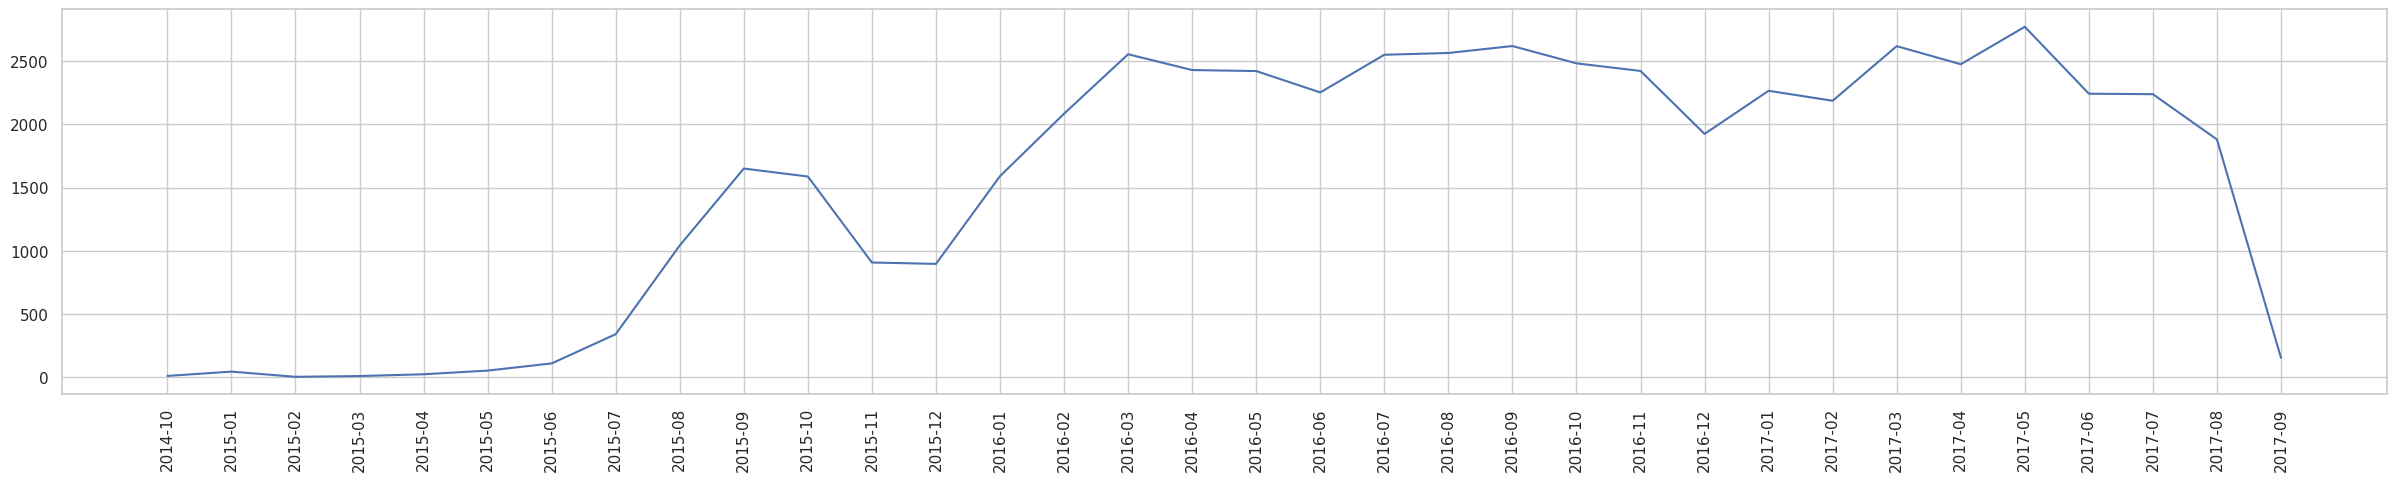

In [ ]:
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(booking_trend['year_month'], booking_trend['is_canceled'])

plt.show()

In [ ]:
#cancel trend
cancel_trend = df_cancel[['reservation_status_date','is_canceled']]
cancel_trend['year_month'] = cancel_trend['reservation_status_date'].dt.strftime('%Y/%m')

cancel_trend = cancel_trend.sort_values('is_canceled')
cancel_trend = cancel_trend.groupby('year_month').sum()
cancel_trend = cancel_trend.reset_index()
cancel_trend.head()

<ipython-input-194-7317fdefdec7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancel_trend['year_month'] = cancel_trend['reservation_status_date'].dt.strftime('%Y/%m')
<ipython-input-194-7317fdefdec7>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cancel_trend = cancel_trend.groupby('year_month').sum()


year_month  is_canceled
0    2014/10           11
1    2015/01           45
2    2015/02            4
3    2015/03           10
4    2015/04           24

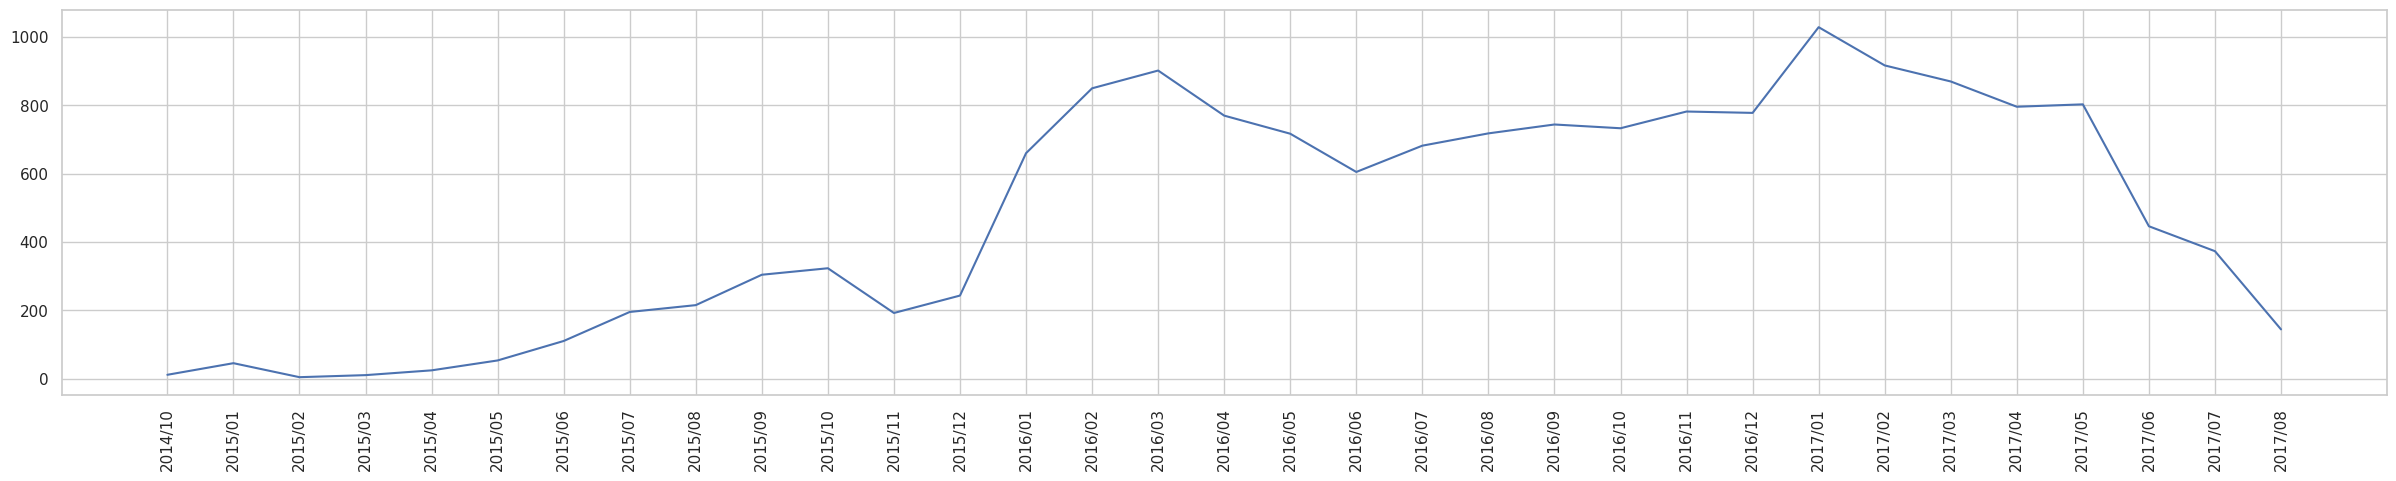

In [ ]:
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(cancel_trend['year_month'], cancel_trend['is_canceled'])

plt.show()

In [ ]:
#ADR trend
adr_trend = df_cancel[['reservation_status_date','adr']]
adr_trend['year_month'] = adr_trend['reservation_status_date'].dt.strftime('%Y/%m')

adr_trend = adr_trend.sort_values('adr')
adr_trend = adr_trend.groupby('year_month').mean()
adr_trend = adr_trend.reset_index()
adr_trend.head()

<ipython-input-196-a2a8d6b7b8a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adr_trend['year_month'] = adr_trend['reservation_status_date'].dt.strftime('%Y/%m')
<ipython-input-196-a2a8d6b7b8a0>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  adr_trend = adr_trend.groupby('year_month').mean()


year_month    adr
0    2014/10 62.800
1    2015/01 62.402
2    2015/02 80.750
3    2015/03 72.559
4    2015/04 77.876

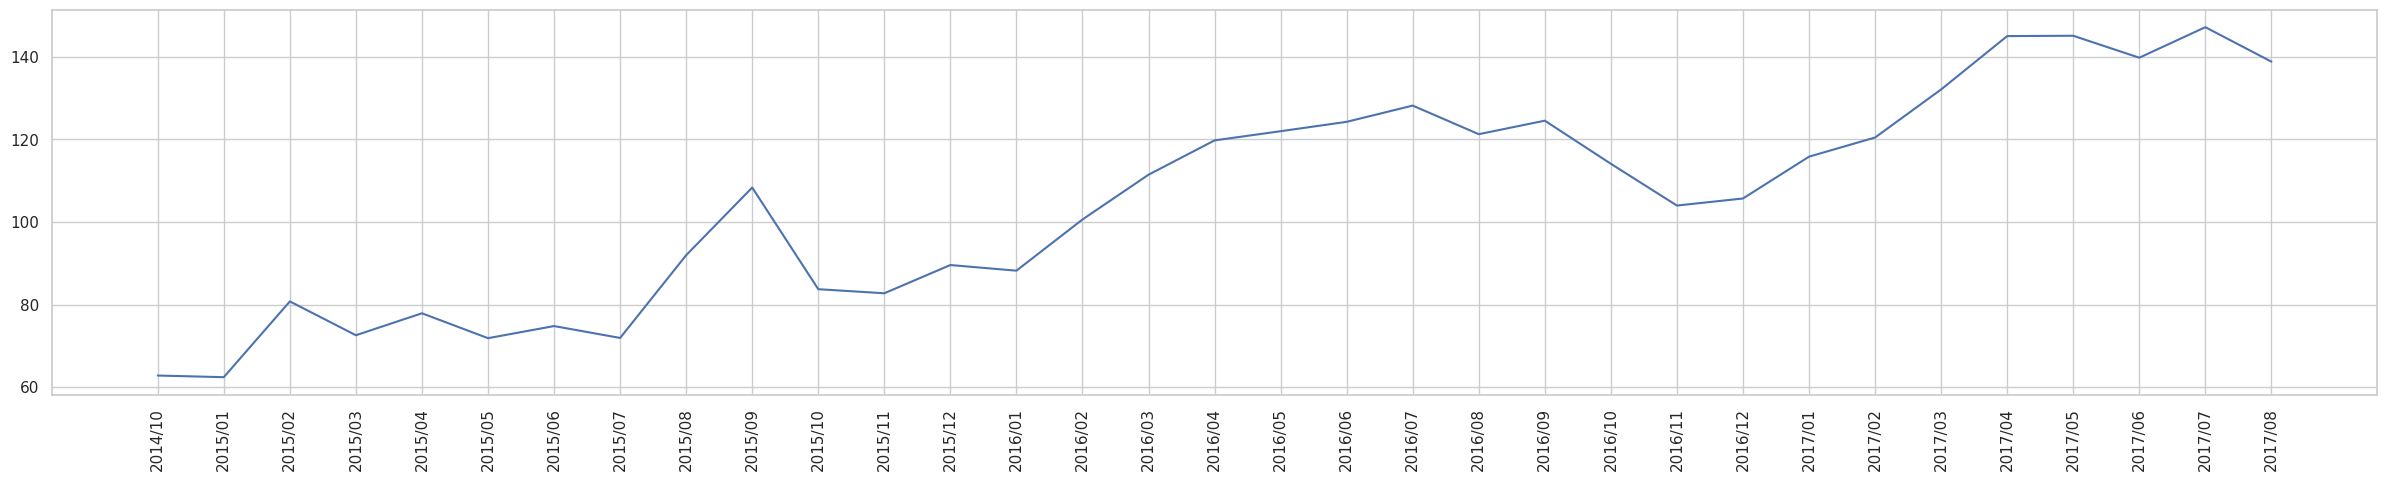

In [ ]:
plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(adr_trend['year_month'], adr_trend['adr'])

plt.show()

#CORRELATION

In [ ]:
df_correl = df_cl.copy()
df_correl

hotel  is_canceled  lead_time  stays_in_weekend_nights  \
40060   City Hotel            0          6                        0   
40061   City Hotel            1         88                        0   
40062   City Hotel            1         65                        0   
40063   City Hotel            1         92                        2   
40064   City Hotel            1        100                        0   
...            ...          ...        ...                      ...   
119385  City Hotel            0         23                        2   
119386  City Hotel            0        102                        2   
119387  City Hotel            0         34                        2   
119388  City Hotel            0        109                        2   
119389  City Hotel            0        205                        2   

        stays_in_week_nights  adults  children  babies meal country  ...  \
40060                      2       1         0       0   HB     PRT  ...   
40061                      4       2         0       0   BB     PRT  ...   
40062                      4       1         0       0   BB     PRT  ...   
40063                      4       2         0       0   BB     PRT  ...   
40064                      2       2         0       0   BB     PRT  ...   
...                      ...     ...       ...     ...  ...     ...  ...   
119385                     5       2         0       0   BB     BEL  ...   
119386                     5       3         0       0   BB     FRA  ...   
119387                     5       2         0       0   BB     DEU  ...   
119388                     5       2         0       0   BB     GBR  ...   
119389                     7       2         0       0   HB     DEU  ...   

       required_car_parking_spaces total_of_special_requests  \
40060                            0                         0   
40061                            0                         1   
40062                            0                         1   
40063                            0                         2   
40064                            0                         1   
...                            ...                       ...   
119385                           0                         0   
119386                           0                         2   
119387                           0                         4   
119388                           0                         0   
119389                           0                         2   

        reservation_status  reservation_status_date  arrival_date  \
40060            Check-Out               2015-07-03    2015-07-01   
40061             Canceled               2015-07-01    2015-07-01   
40062             Canceled               2015-04-30    2015-07-01   
40063             Canceled               2015-06-23    2015-07-01   
40064             Canceled               2015-04-02    2015-07-02   
...                    ...                      ...           ...   
119385           Check-Out               2017-09-06    2017-08-30   
119386           Check-Out               2017-09-07    2017-08-31   
119387           Check-Out               2017-09-07    2017-08-31   
119388           Check-Out               2017-09-07    2017-08-31   
119389           Check-Out               2017-09-07    2017-08-29   

       reservation_year reservation_month  guests_type grp_waiting_list  \
40060              2015                 7       couple           [0, 1)   
40061              2015                 7       couple           [0, 1)   
40062              2015                 4       couple           [0, 1)   
40063              2015                 6       couple           [0, 1)   
40064              2015                 4       couple           [0, 1)   
...                 ...               ...          ...              ...   
119385             2017                 9       couple           [0, 1)   
119386             2017                 9       c

In [ ]:
df_correl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53425 entries, 40060 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           53425 non-null  object        
 1   is_canceled                     53425 non-null  int64         
 2   lead_time                       53425 non-null  int64         
 3   stays_in_weekend_nights         53425 non-null  int64         
 4   stays_in_week_nights            53425 non-null  int64         
 5   adults                          53425 non-null  int64         
 6   children                        53425 non-null  int64         
 7   babies                          53425 non-null  int64         
 8   meal                            53425 non-null  object        
 9   country                         53425 non-null  object        
 10  market_segment                  53425 non-null  object        
 1

<ipython-input-243-86076fd0b8bc>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_correl.corrwith(df_correl['is_canceled']).iloc[:-1].to_frame()


<Axes: >

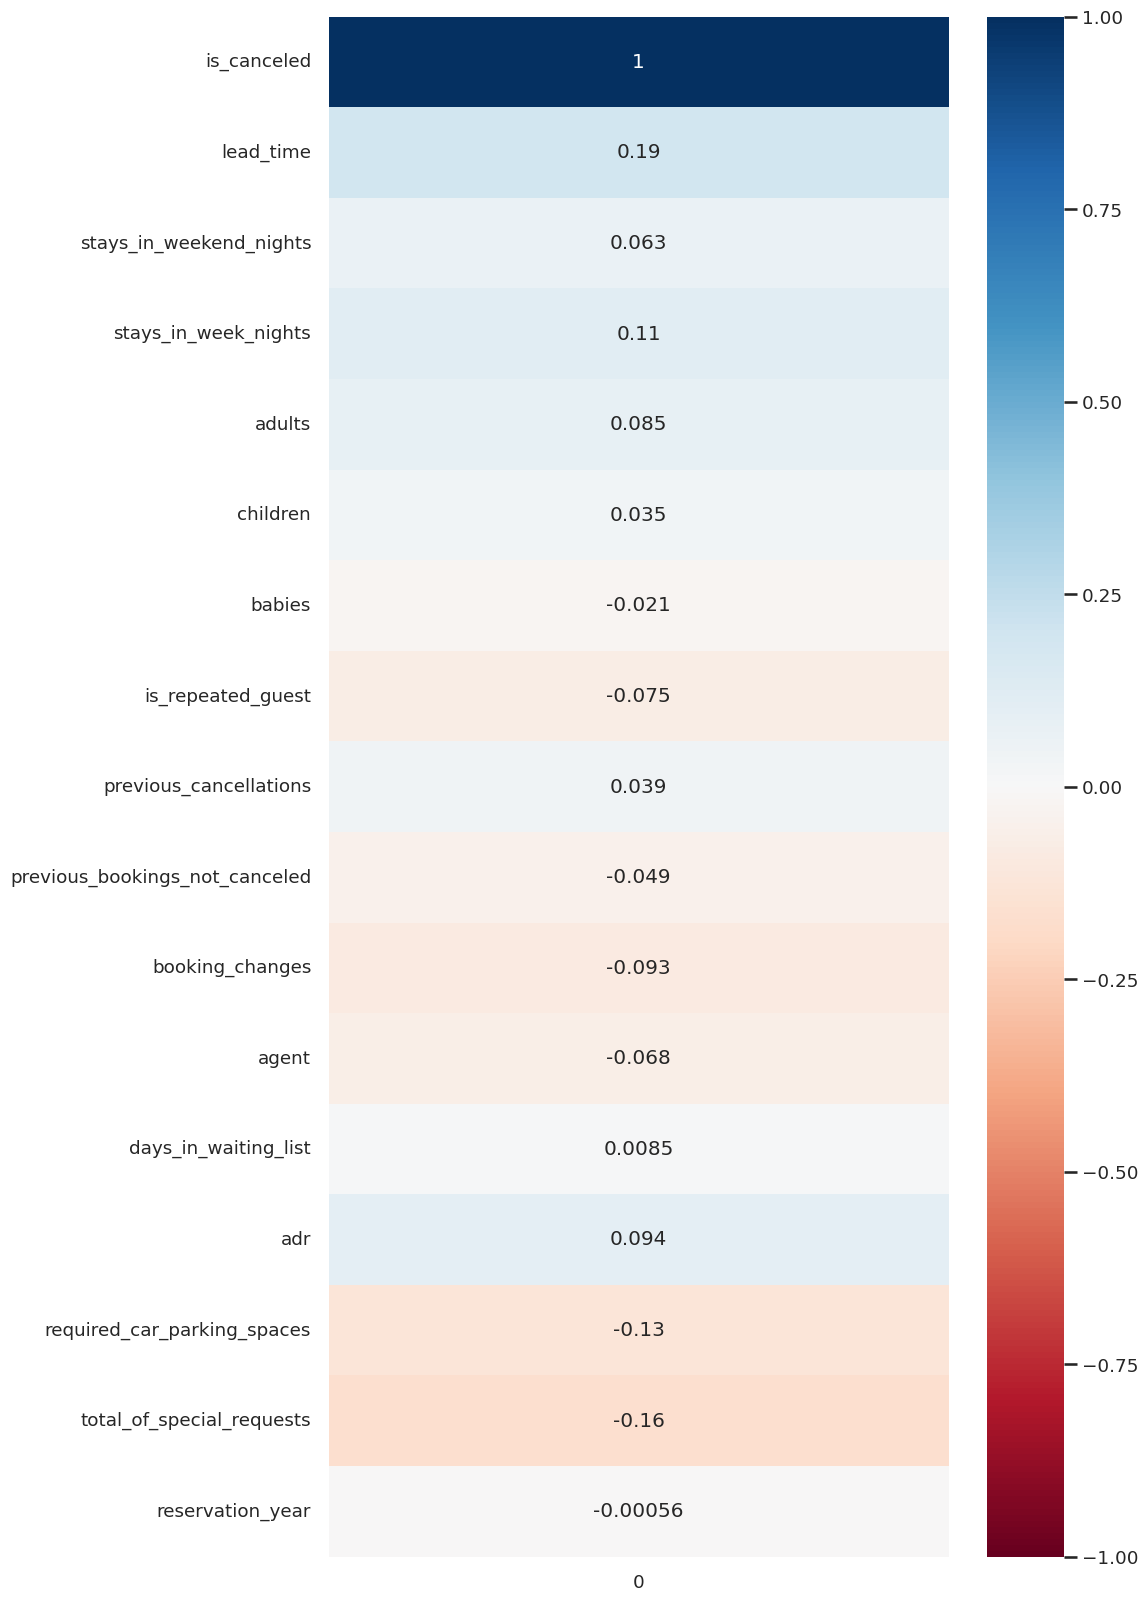

In [ ]:
#to check correlation between all variable
corr = df_correl.corrwith(df_correl['is_canceled']).iloc[:-1].to_frame()
fig,ax = plt.subplots(figsize=(10,20))
sns.heatmap(corr,cmap='RdBu', annot=True, vmin=-1, vmax=1, ax=ax)

##INSIGHTS:
NO SIGNIFICANT CORRELATION BETWEEN ALL VARIANTS TO TARGET (IS CANCELED)

In [ ]:
df_correl = df_correl[['is_canceled','lead_time', 'days_in_waiting_list', 'market_segment','distribution_channel', 'booking_changes', 'deposit_type', 'adr', 'total_of_special_requests']].copy()
df_correl

is_canceled  lead_time  days_in_waiting_list market_segment  \
40060             0          6                     0  Offline TA/TO   
40061             1         88                     0      Online TA   
40062             1         65                     0      Online TA   
40063             1         92                     0      Online TA   
40064             1        100                     0      Online TA   
...             ...        ...                   ...            ...   
119385            0         23                     0  Offline TA/TO   
119386            0        102                     0      Online TA   
119387            0         34                     0      Online TA   
119388            0        109                     0      Online TA   
119389            0        205                     0      Online TA   

       distribution_channel  booking_changes deposit_type     adr  \
40060                 TA/TO                0   No Deposit   0.000   
40061                 TA/TO                0   No Deposit  76.500   
40062                 TA/TO                0   No Deposit  68.000   
40063                 TA/TO                0   No Deposit  76.500   
40064                 TA/TO                0   No Deposit  76.500   
...                     ...              ...          ...     ...   
119385                TA/TO                0   No Deposit  96.140   
119386                TA/TO                0   No Deposit 225.430   
119387                TA/TO                0   No Deposit 157.710   
119388                TA/TO                0   No Deposit 104.400   
119389                TA/TO                0   No Deposit 151.200   

        total_of_special_requests  
40060                           0  
40061                           1  
40062                           1  
40063                           2  
40064                           1  
...                           ...  
119385                          0  
119386                          2  
119387                          4  
119388                          0  
119389                          2  

[53425 rows x 9 columns]

In [ ]:
df_correl['market_segment'].value_counts()

Online TA        34992
Offline TA/TO     7270
Direct            5559
Groups            2635
Corporate         2227
Complementary      513
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
# Replace market segment value into numbers
df_correl['market_segment'].replace(['Online TA', 'Offline TA/TO','Direct','Groups','Corporate','Complementary','Aviation','Undefined'], ['0', '1','2','3','4','5','6','7'], inplace=True)
df_correl

is_canceled  lead_time  days_in_waiting_list market_segment  \
40060             0          6                     0              1   
40061             1         88                     0              0   
40062             1         65                     0              0   
40063             1         92                     0              0   
40064             1        100                     0              0   
...             ...        ...                   ...            ...   
119385            0         23                     0              1   
119386            0        102                     0              0   
119387            0         34                     0              0   
119388            0        109                     0              0   
119389            0        205                     0              0   

       distribution_channel  booking_changes deposit_type     adr  \
40060                 TA/TO                0   No Deposit   0.000   
40061                 TA/TO                0   No Deposit  76.500   
40062                 TA/TO                0   No Deposit  68.000   
40063                 TA/TO                0   No Deposit  76.500   
40064                 TA/TO                0   No Deposit  76.500   
...                     ...              ...          ...     ...   
119385                TA/TO                0   No Deposit  96.140   
119386                TA/TO                0   No Deposit 225.430   
119387                TA/TO                0   No Deposit 157.710   
119388                TA/TO                0   No Deposit 104.400   
119389                TA/TO                0   No Deposit 151.200   

        total_of_special_requests  
40060                           0  
40061                           1  
40062                           1  
40063                           2  
40064                           1  
...                           ...  
119385                          0  
119386                          2  
119387                          4  
119388                          0  
119389                          2  

[53425 rows x 9 columns]

In [ ]:
df_correl['market_segment'].value_counts()

0    34992
1     7270
2     5559
3     2635
4     2227
5      513
6      227
7        2
Name: market_segment, dtype: int64

In [ ]:
df_correl['distribution_channel'].value_counts()

TA/TO        44546
Direct        6087
Corporate     2607
GDS            181
Undefined        4
Name: distribution_channel, dtype: int64

In [ ]:
df_correl['deposit_type'].value_counts()

No Deposit    52566
Non Refund      844
Refundable       15
Name: deposit_type, dtype: int64

In [ ]:
# Replace distribution channel & deposit type value into numbers
df_correl['distribution_channel'].replace(['TA/TO', 'Direct','Corporate','GDS','Undefined'], ['0', '1','2','3','4'], inplace=True)
df_correl['deposit_type'].replace(['No Deposit', 'Non Refund','Refundable'], ['0', '1','2'], inplace=True)
df_correl

is_canceled  lead_time  days_in_waiting_list market_segment  \
40060             0          6                     0              1   
40061             1         88                     0              0   
40062             1         65                     0              0   
40063             1         92                     0              0   
40064             1        100                     0              0   
...             ...        ...                   ...            ...   
119385            0         23                     0              1   
119386            0        102                     0              0   
119387            0         34                     0              0   
119388            0        109                     0              0   
119389            0        205                     0              0   

       distribution_channel  booking_changes deposit_type     adr  \
40060                     0                0            0   0.000   
40061                     0                0            0  76.500   
40062                     0                0            0  68.000   
40063                     0                0            0  76.500   
40064                     0                0            0  76.500   
...                     ...              ...          ...     ...   
119385                    0                0            0  96.140   
119386                    0                0            0 225.430   
119387                    0                0            0 157.710   
119388                    0                0            0 104.400   
119389                    0                0            0 151.200   

        total_of_special_requests  
40060                           0  
40061                           1  
40062                           1  
40063                           2  
40064                           1  
...                           ...  
119385                          0  
119386                          2  
119387                          4  
119388                          0  
119389                          2  

[53425 rows x 9 columns]

In [ ]:
df_correl2 = df_correl.copy()

In [ ]:
#change data type for: market segment, distribution channel & deposit type
df_correl2['market_segment'] = df_correl2['market_segment'].astype('int64')
df_correl2['distribution_channel'] = df_correl2['distribution_channel'].astype('int64')
df_correl2['deposit_type'] = df_correl2['deposit_type'].astype('int64')
df_correl2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53425 entries, 40060 to 119389
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   is_canceled                53425 non-null  int64  
 1   lead_time                  53425 non-null  int64  
 2   days_in_waiting_list       53425 non-null  int64  
 3   market_segment             53425 non-null  int64  
 4   distribution_channel       53425 non-null  int64  
 5   booking_changes            53425 non-null  int64  
 6   deposit_type               53425 non-null  int64  
 7   adr                        53425 non-null  float64
 8   total_of_special_requests  53425 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 6.1 MB


In [ ]:
#summary output for all variable
from scipy.stats import kruskal

# Selecting columns for category_var and numeric_var
selected_categorical_columns = ['is_canceled', 'market_segment', 'distribution_channel', 'deposit_type']
selected_numeric_columns = ['lead_time', 'days_in_waiting_list', 'booking_changes', 'adr', 'total_of_special_requests']

# Create a DataFrame with selected columns
df_correl3 = df_correl2[selected_categorical_columns + selected_numeric_columns]

# Calculate the Kruskal-Wallis test
groups = []
for category, group_data in df_correl3.groupby('is_canceled')['lead_time']:
    groups.append(group_data)

statistic, p_value = kruskal(*groups)

print("Kruskal-Wallis Statistic:", statistic)
print("P-value:", p_value)

Kruskal-Wallis Statistic: 2514.3669124705616
P-value: 0.0


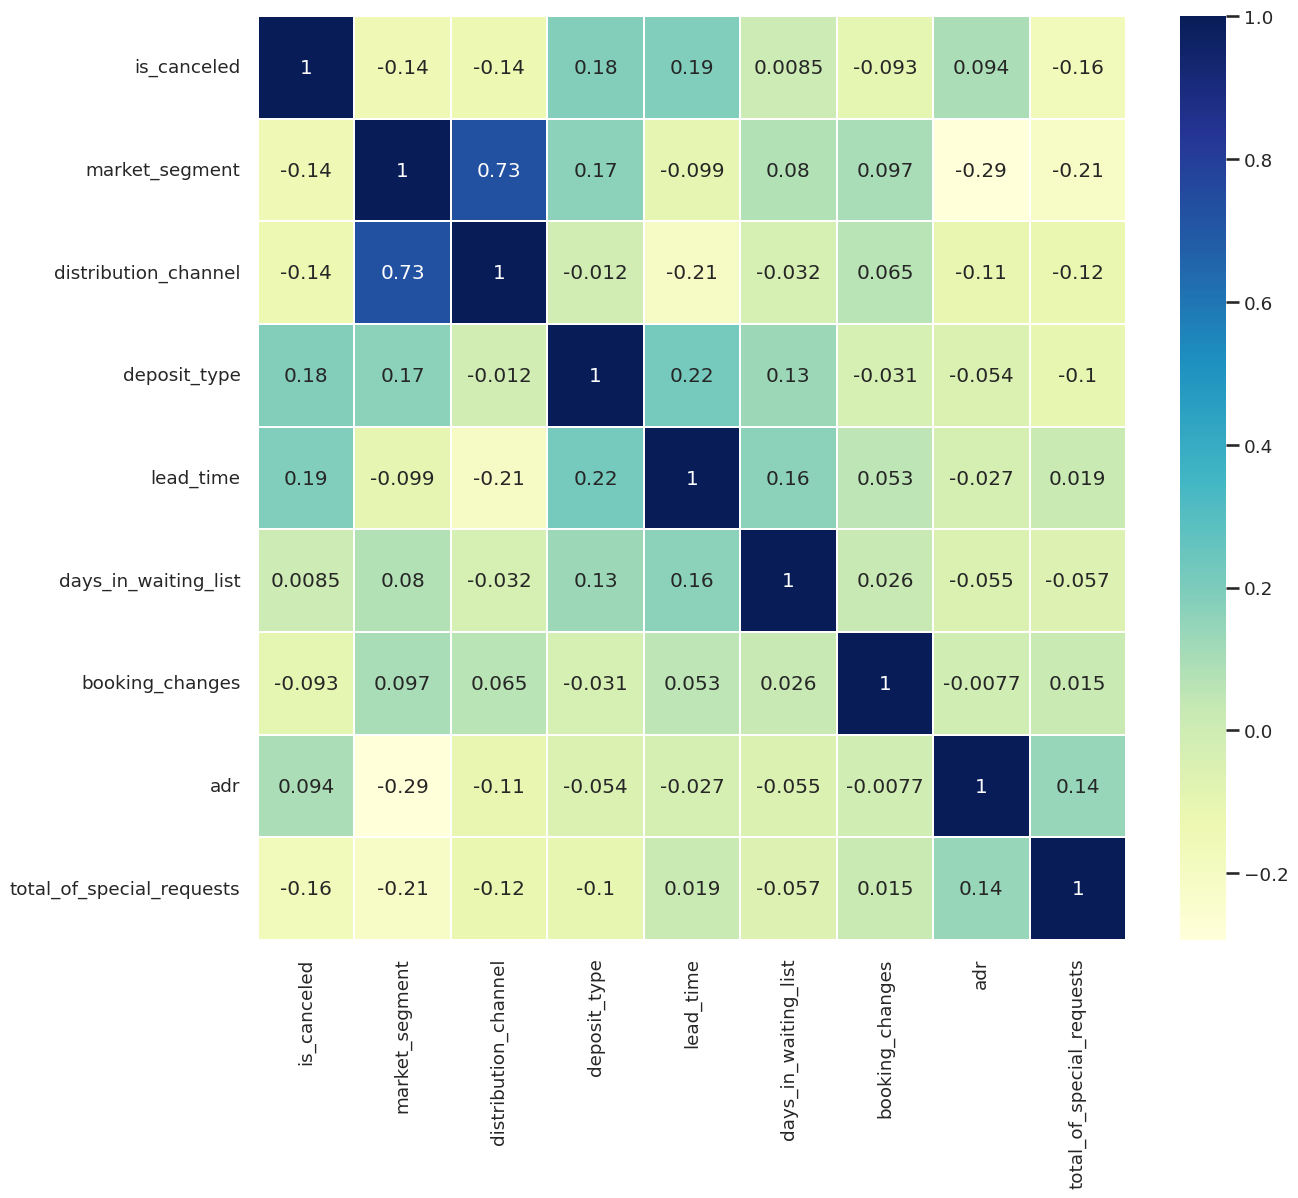

In [ ]:
#correlation heatmap
plt.figure(figsize=(14,12))
sns.heatmap(df_correl3.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [ ]:
#summary output between market segment & distribution channel
import statsmodels.api as sm

# Assuming 'y' is the dependent variable and 'X1', 'X2', etc. are independent variables
X = df_correl3[['market_segment', 'distribution_channel']]  # Select the independent variables
X = sm.add_constant(X)  # Add a constant term for the intercept

model = sm.OLS(df_correl3['is_canceled'], X).fit()  # Fit the linear regression model

# Print the summary of regression statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            is_canceled   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     630.4
Date:                Thu, 17 Aug 2023   Prob (F-statistic):          2.63e-271
Time:                        04:06:57   Log-Likelihood:                -33514.
No. Observations:               53425   AIC:                         6.703e+04
Df Residuals:                   53422   BIC:                         6.706e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3393 

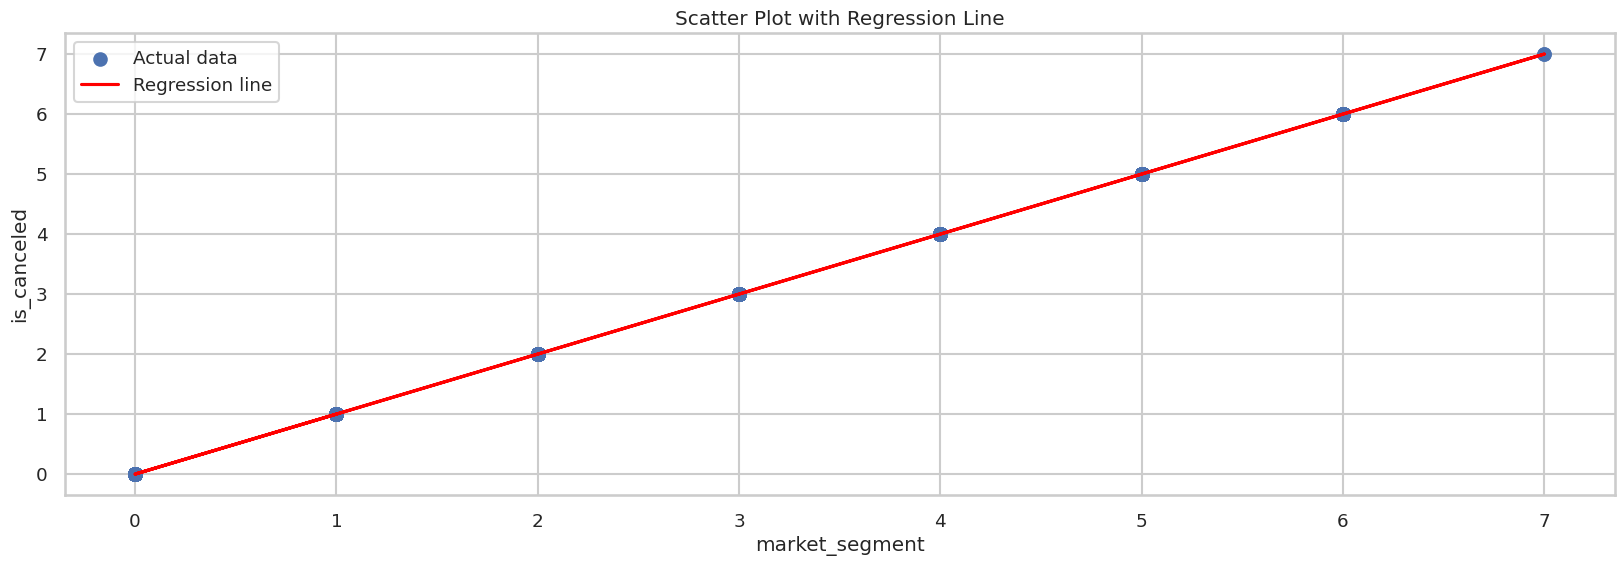

In [ ]:
#Regression Linear between: is canceled and market segment
import matplotlib.pyplot as plt

# Assuming 'y' is the dependent variable and 'X1' is an independent variable
X = df_correl3[['market_segment']]  # Select the independent variable

model = sm.OLS(df_correl3['market_segment'], sm.add_constant(X)).fit()  # Fit the linear regression model

# Create a scatter plot with the regression line
plt.scatter(X, df_correl3['market_segment'], label='Actual data')
plt.plot(X, model.predict(sm.add_constant(X)), color='red', label='Regression line')
plt.xlabel('market_segment')
plt.ylabel('is_canceled')
plt.legend()
plt.title('Scatter Plot with Regression Line')
plt.show()

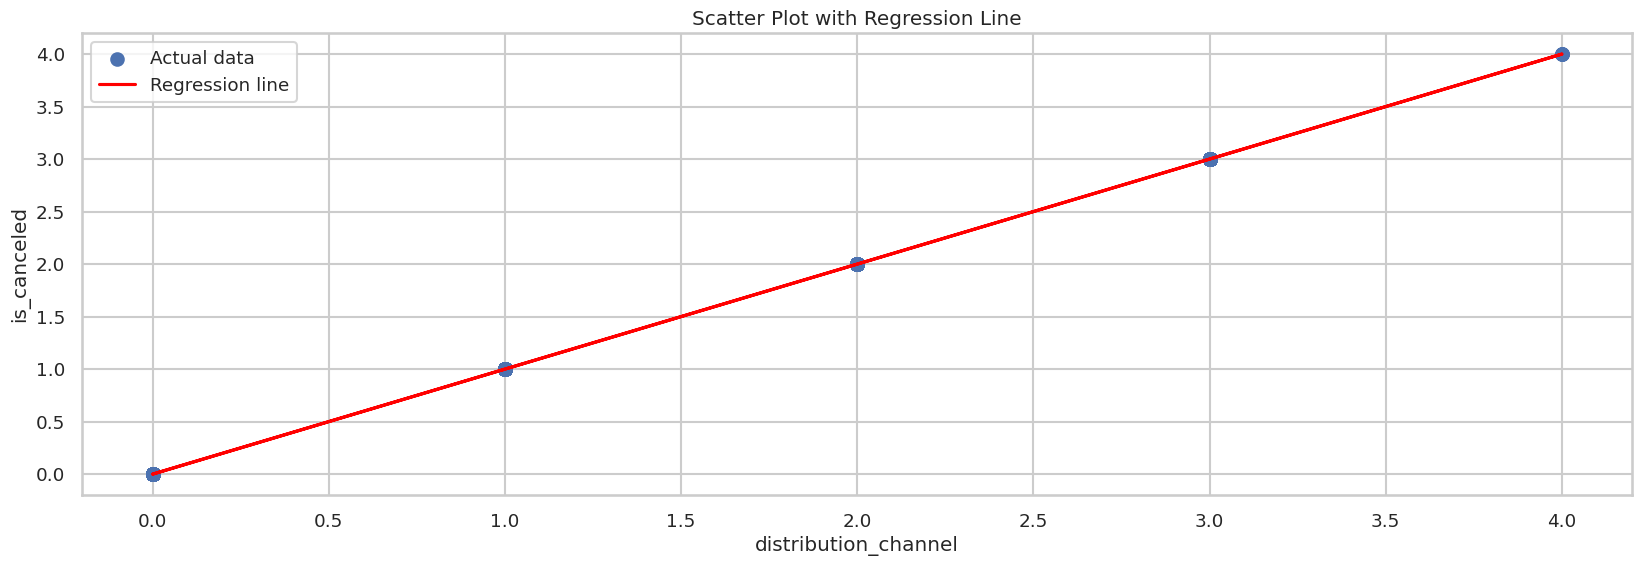

In [ ]:
#Regression Linear between: is canceled and distribution channel

# Assuming 'y' is the dependent variable and 'X1' is an independent variable
X = df_correl3[['distribution_channel']]  # Select the independent variable

model = sm.OLS(df_correl3['distribution_channel'], sm.add_constant(X)).fit()  # Fit the linear regression model

# Create a scatter plot with the regression line
plt.scatter(X, df_correl3['distribution_channel'], label='Actual data')
plt.plot(X, model.predict(sm.add_constant(X)), color='red', label='Regression line')
plt.xlabel('distribution_channel')
plt.ylabel('is_canceled')
plt.legend()
plt.title('Scatter Plot with Regression Line')
plt.show()

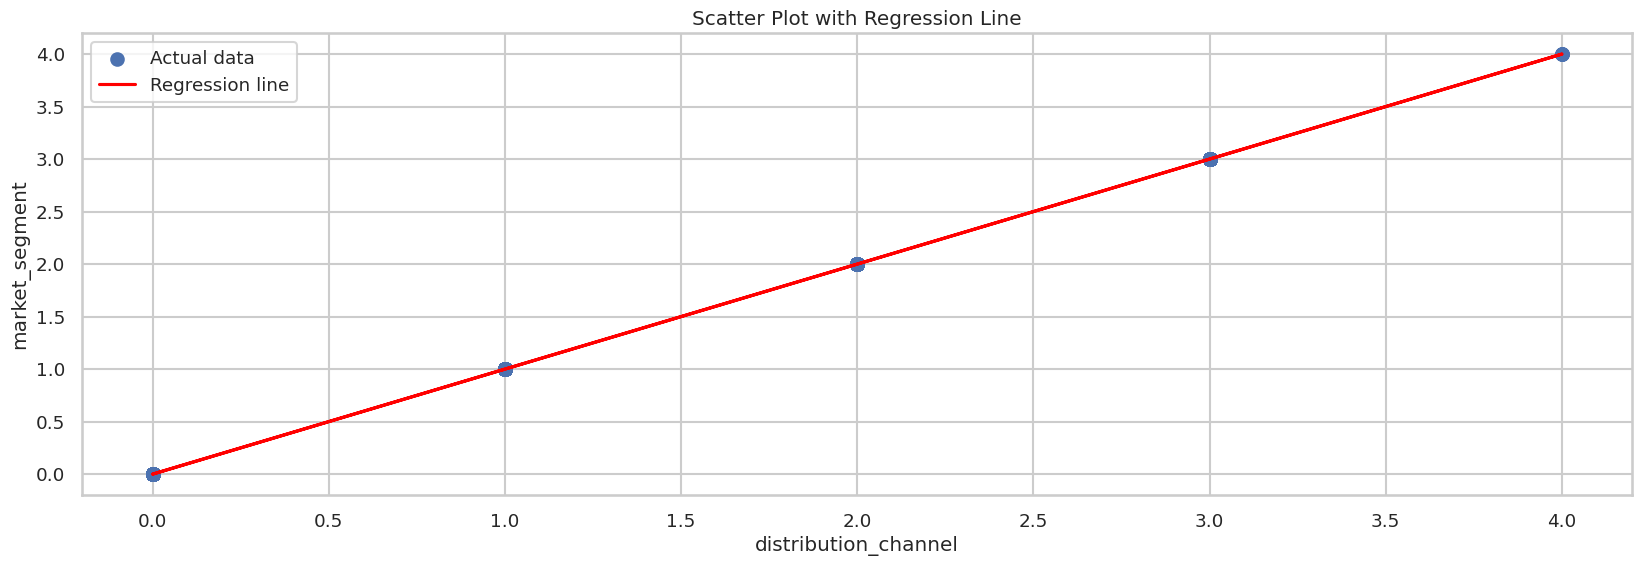

In [ ]:
#Regression Linear between: market segment dan distribution channel

# Assuming 'y' is the dependent variable and 'X1' is an independent variable
X = df_correl3[['distribution_channel']]  # Select the independent variable

model = sm.OLS(df_correl3['distribution_channel'], sm.add_constant(X)).fit()  # Fit the linear regression model

# Create a scatter plot with the regression line
plt.scatter(X, df_correl3['distribution_channel'], label='Actual data')
plt.plot(X, model.predict(sm.add_constant(X)), color='red', label='Regression line')
plt.xlabel('distribution_channel')
plt.ylabel('market_segment')
plt.legend()
plt.title('Scatter Plot with Regression Line')
plt.show()